<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initial-setup" data-toc-modified-id="Initial-setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initial setup</a></span><ul class="toc-item"><li><span><a href="#Load-the-results" data-toc-modified-id="Load-the-results-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load the results</a></span></li><li><span><a href="#Load-population-data" data-toc-modified-id="Load-population-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load population data</a></span></li></ul></li><li><span><a href="#Seting-up-the-indicator-components" data-toc-modified-id="Seting-up-the-indicator-components-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Seting up the indicator components</a></span><ul class="toc-item"><li><span><a href="#Energy-Requirements-($R$)-depending-on-Household-Characteristics" data-toc-modified-id="Energy-Requirements-($R$)-depending-on-Household-Characteristics-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Energy Requirements ($R$) depending on Household Characteristics</a></span></li><li><span><a href="#Load-gas-prices" data-toc-modified-id="Load-gas-prices-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Load gas prices</a></span></li><li><span><a href="#Load-Simulation-Tariffs-($P_t^j$)" data-toc-modified-id="Load-Simulation-Tariffs-($P_t^j$)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Load Simulation Tariffs ($P_t^j$)</a></span></li><li><span><a href="#Compute-Energy-Cost-($C_t^j$)" data-toc-modified-id="Compute-Energy-Cost-($C_t^j$)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Compute Energy Cost ($C_t^j$)</a></span></li><li><span><a href="#Plot-envelope-$C_t^j$" data-toc-modified-id="Plot-envelope-$C_t^j$-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Plot envelope $C_t^j$</a></span></li><li><span><a href="#Load-family-income-data" data-toc-modified-id="Load-family-income-data-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Load family income data</a></span><ul class="toc-item"><li><span><a href="#Missing-data-census-1996-2001" data-toc-modified-id="Missing-data-census-1996-2001-2.6.1"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>Missing data census 1996-2001</a></span><ul class="toc-item"><li><span><a href="#Solution" data-toc-modified-id="Solution-2.6.1.1"><span class="toc-item-num">2.6.1.1&nbsp;&nbsp;</span>Solution</a></span></li></ul></li><li><span><a href="#Forecast-Income-2016---Last-Year-Simulation" data-toc-modified-id="Forecast-Income-2016---Last-Year-Simulation-2.6.2"><span class="toc-item-num">2.6.2&nbsp;&nbsp;</span>Forecast Income 2016 - Last Year Simulation</a></span></li></ul></li></ul></li><li><span><a href="#Compute-Energy-Vulnerability" data-toc-modified-id="Compute-Energy-Vulnerability-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Compute Energy Vulnerability</a></span></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Plot-Percentage-of-Vulnerable-Households" data-toc-modified-id="Plot-Percentage-of-Vulnerable-Households-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Plot Percentage of Vulnerable Households</a></span></li><li><span><a href="#Heatmap-Energy-Vulnerability-per-dwelling-and-household-types" data-toc-modified-id="Heatmap-Energy-Vulnerability-per-dwelling-and-household-types-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Heatmap Energy Vulnerability per dwelling and household types</a></span></li></ul></li></ul></div>

# Initial setup

In [3]:

'''
Created by Angela M. Rojas A. <angelara@student.unimelb.edu.au>


Created on April 2020

'''
import sys
import os

sys.path.append(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments\EMAworkbench')

sys.path.append(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments')

#from ema_workbench.analysis.plotting_util import BOXPLOT, KDE, VIOLIN
from ema_workbench.analysis.plotting import envelopes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import seaborn as sns
from ema_workbench.analysis import prim

from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density 



Conversion rates

In [4]:
kwh_to_mj = 3.6
mj_to_kwh = 1/kwh_to_mj

mj_to_mwh = mj_to_kwh / 1000
mwh_to_mj = 1 / mj_to_mwh

mj_to_pj = 10 ** -9
pj_to_mj = 1/ mj_to_pj

pj_to_mwh = pj_to_mj * mj_to_mwh
pj_to_kwh = pj_to_mj * mj_to_kwh

mwh_to_pj = 1 / pj_to_mwh
kwh_to_pj = 1 / pj_to_kwh

cents_to_dollars = 0.01

## Load the results

In [5]:
from ema_workbench import load_results

#results = load_results(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments\data\gr4sp_2020-Feb-20-years.tar.gz')
#results = load_results(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments\data\gr4sp_2020-Feb-07_EET_allV3.tar.gz')
#results = load_results(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/gr4sp_2020-Aug-22-SOBOL.tar.gz')
results = load_results(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/gr4sp_SOBOL2021-Feb-03.tar.gz')


In [6]:
results_one_scenario = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/VICSimDataYearSummary_140221-BAU-1902-2051.csv', index_col='Time (Year)')

In [4]:
# results is a tuple with one dictionary containing the variables and another dictionary with the outcomes
experiments, outcomes = results
        

NameError: name 'results' is not defined

In [8]:
experiments.head()

annualCpi  annualInflation  consumption  domesticConsumptionPercentage  \
0        2.0              1.0          2.0                           40.0   
1        2.0              1.0          2.0                           40.0   
2        2.0              1.0          2.0                           40.0   
3        2.0              1.0          0.0                           40.0   
4        2.0              1.0          2.0                           29.0   

   energyEfficiency  generationRolloutPeriod  generatorRetirement  \
0               0.0                     10.0                 -5.0   
1               0.0                     10.0                 -5.0   
2               0.0                     10.0                 -5.0   
3               0.0                     10.0                 -5.0   
4               0.0                     10.0                 -5.0   

   importPriceFactor  includePublicallyAnnouncedGen  learningCurve  ...  \
0               40.0                            1.0            1.0  ...   
1               40.0                            1.0            1.0  ...   
2               40.0                            1.0            1.0  ...   
3               40.0                            1.0            1.0  ...   
4               40.0                            1.0            1.0  ...   

   priceChangePercentageWind  rooftopPV  scheduleMinCapMarketGen  \
0                       45.0        6.0                    175.0   
1                       45.0        6.0                    175.0   
2                       45.0        6.0                    175.0   
3                       45.0        6.0                    175.0   
4                       45.0        6.0                    175.0   

   semiScheduleGenSpotMarket  semiScheduleMinCapMarketGen  solarUptake  \
0                       10.0                         13.0          4.0   
1                       10.0                         13.0          4.0   
2                       10.0                         13.0          4.0   
3                       10.0                         13.0          4.0   
4                       10.0                         13.0          4.0   

   wholesaleTariffContribution  scenario  policy  model  
0                         12.0         0    None  Gr4sp  
1                         12.0         1    None  Gr4sp  
2                         12.0         2    None  Gr4sp  
3                         12.0         3    None  Gr4sp  
4                         12.0         4    None  Gr4sp  

[5 rows x 32 columns]

In [9]:
outcomes_to_show = ['consumptionYear', 'tariffsYear', 'wholesalePriceYear']

# 26 levers/uncertainties selected after EET (last test Dec 2020)
uncertainties = experiments.columns[:-3]

#from startYear
startYear = 2000
endYear = 2040
startYearShift = (startYear - 1998)
endYearShift = (endYear - 2050)

simulationYears = outcomes['TIMEYear'][0, startYearShift:endYearShift]
simulationYears_dateTime = pd.to_datetime(simulationYears, format = '%Y')

points_of_interest = [*range(startYear,endYear+1,10)] 
points_of_interest = [ x - startYear for x in points_of_interest]

# Filter outcomes taking into account the startYear, and removing Seed Experiment info. 
# Seed it is useful if I want to retrieve more info from the csv files, or redo the experiments with the
# simulation parameters
outcomes_filtered = {k:v[:, startYearShift:endYearShift] for k,v in outcomes.items() if k != 'seedExperimentCsv'}

If `onlyOneScenario` is true, then __only 1 simulation (BAU/LCT/JT/ST)__ tariffs are going to be used

In [10]:
onlyOneScenario = False

## Load population data

Filter by area code

In [11]:
# region corresponds to VIC (for the whole state), 48 Regional LGAs, and 31 Metropolitan LGAS 
# Product developed by DELWP: "Population, households and dwellings for Victoria in Future Small Areas (VIFSA) and Local Government Areas (LGA) from 2016 to 2036. 
# The spatial units used in these projections are based on the Australian Statistical Geography Standard (ASGS) and Local Government Authority boundaries as at 30 June 2016, as well as Victoria in Future Small Areas (VIFSA). 
# VIFSAs are sub-LGA areas defined by DELWP, based on Statistical Area Level 2 of the ASGS. For more information on the definition of VIFSAs, including illustrations and dowloadable GIS files, see the website listed below.
# http://www.delwp.vic.gov.au/planning/forward-policy-and-research/victoria-in-future-population-and-household-projections/geographic-areas"
region = 'VIC'
# lga_name can contain: Victoria, Metropolitan LGAs, Regional LGAs, or any Lga name.
# For the current analysis, Victoria is used, as well as the overall regional
# and metropolitan scales to one regional LGA and one metropolitan LGA: Indigo (S), and Melbourne (C)
# Indigo Shire is where the Yackandandah community energy project is located.

lga_name = 'Melbourne (C)'

household_type = pd.read_csv('../assesmentData/postgres_public_household_forecast_victoria.csv')
region_household_type = household_type[ household_type['region'] == region]
region_household_type.head()

TIMEYear region lga_code  lga_name vifsa_district  \
1648      2016    VIC      VIC  Victoria            NaN   
1922      2021    VIC      VIC  Victoria            NaN   
2196      2026    VIC      VIC  Victoria            NaN   
2470      2031    VIC      VIC  Victoria            NaN   
2744      2036    VIC      VIC  Victoria            NaN   

      Couple family with children  Couple family without children  \
1648                       779535                          613237   
1922                       862298                          699427   
2196                       942823                          772981   
2470                      1020527                          842595   
2744                      1096540                          916888   

      One parent family  Other family  Group household  Lone person  \
1648             252252         31148           113393       604454   
1922             277734         34522           126597       678186   
2196             305783         36974           133853       750333   
2470             337631         39845           141870       823570   
2744             371304         42673           150257       897620   

      households  
1648     2394020  
1922     2678763  
2196     2942746  
2470     3206037  
2744     3475282

Perform linear interpolation to fill missing years

In [12]:
#Create new years from startYear to max, and Interpolate missing values
years_interpolate = pd.DataFrame({"TIMEYear" : np.arange(region_household_type['TIMEYear'].min(), region_household_type['TIMEYear'].max()+1, 1)})

#Merge both the data frame with the missing years with the data from the household types
merged = pd.merge(years_interpolate, region_household_type, how='left',on='TIMEYear')
# Linearly interpolate the missing numerical values
region_household_type = merged.interpolate(method='linear', limit_direction='forward', axis=0)

# Fill out the corresponding string columns missing
region_household_type = region_household_type.ffill()
region_household_type = region_household_type.set_index(['TIMEYear','region','lga_code','lga_name','vifsa_district'])
region_household_type.head(10)

Couple family with children  \
TIMEYear region lga_code lga_name vifsa_district                                
2016     VIC    VIC      Victoria NaN                                779535.0   
2017     VIC    VIC      Victoria NaN                                796087.6   
2018     VIC    VIC      Victoria NaN                                812640.2   
2019     VIC    VIC      Victoria NaN                                829192.8   
2020     VIC    VIC      Victoria NaN                                845745.4   
2021     VIC    VIC      Victoria NaN                                862298.0   
2022     VIC    VIC      Victoria NaN                                878403.0   
2023     VIC    VIC      Victoria NaN                                894508.0   
2024     VIC    VIC      Victoria NaN                                910613.0   
2025     VIC    VIC      Victoria NaN                                926718.0   

                                                  Couple family without children  \
TIMEYear region lga_code lga_name vifsa_district                                   
2016     VIC    VIC      Victoria NaN                                   613237.0   
2017     VIC    VIC      Victoria NaN                                   630475.0   
2018     VIC    VIC      Victoria NaN                                   647713.0   
2019     VIC    VIC      Victoria NaN                                   664951.0   
2020     VIC    VIC      Victoria NaN                                   682189.0   
2021     VIC    VIC      Victoria NaN                                   699427.0   
2022     VIC    VIC      Victoria NaN                                   714137.8   
2023     VIC    VIC      Victoria NaN                                   728848.6   
2024     VIC    VIC      Victoria NaN                                   743559.4   
2025     VIC    VIC      Victoria NaN                                   758270.2   

                                                  One parent family  \
TIMEYear region lga_code lga_name vifsa_district                      
2016     VIC    VIC      Victoria NaN                      252252.0   
2017     VIC    VIC      Victoria NaN                      257348.4   
2018     VIC    VIC      Victoria NaN                      262444.8   
2019     VIC    VIC      Victoria NaN                      267541.2   
2020     VIC    VIC      Victoria NaN                      272637.6   
2021     VIC    VIC      Victoria NaN                      277734.0   
2022     VIC    VIC      Victoria NaN                      283343.8   
2023     VIC    VIC      Victoria NaN                      288953.6   
2024     VIC    VIC      Victoria NaN                      294563.4   
2025     VIC    VIC      Victoria NaN                      300173.2   

                                                  Other family  \
TIMEYear region lga_code lga_name vifsa_district                 
2016     VIC    VIC      Victoria NaN                  31148.0   
2017     VIC    VIC      Victoria NaN                  31822.8   
2018     VIC    VIC      Victoria NaN                  32497.6   
2019     VIC    VIC      Victoria NaN                  33172.4   
2020     VIC    VIC      Victoria NaN                  33847.2   
2021     VIC    VIC      Victoria NaN                  34522.0   
2022     VIC    VIC      Victoria NaN                  35012.4   
2023     VIC    VIC      Victoria NaN                  35502.8   
2024     VIC    VIC      Victoria NaN                  35993.2   
2025     VIC    VIC      Victoria NaN                  36483.6   

                                                  Group household  \
TIMEYear region lga_code lga_name vifsa_district                    
2016     VIC    VIC      Victoria NaN                    113393.0   
2017     VIC    VIC      Victoria NaN                    116033.8   
2018     VIC    VIC      Victoria NaN                    118674.6   
2019     VIC    VIC      Victoria NaN                    121315.4   
2020    

Show percentage of familiy composition as a function of total number of households

In [13]:
region_household_type_percentage = region_household_type.copy()
for col in region_household_type.columns:
    region_household_type_percentage[col] /= region_household_type_percentage['households']

region_household_type_percentage.head()

Couple family with children  \
TIMEYear region lga_code lga_name vifsa_district                                
2016     VIC    VIC      Victoria NaN                                0.325618   
2017     VIC    VIC      Victoria NaN                                0.324805   
2018     VIC    VIC      Victoria NaN                                0.324030   
2019     VIC    VIC      Victoria NaN                                0.323289   
2020     VIC    VIC      Victoria NaN                                0.322580   

                                                  Couple family without children  \
TIMEYear region lga_code lga_name vifsa_district                                   
2016     VIC    VIC      Victoria NaN                                   0.256154   
2017     VIC    VIC      Victoria NaN                                   0.257235   
2018     VIC    VIC      Victoria NaN                                   0.258267   
2019     VIC    VIC      Victoria NaN                                   0.259254   
2020     VIC    VIC      Victoria NaN                                   0.260197   

                                                  One parent family  \
TIMEYear region lga_code lga_name vifsa_district                      
2016     VIC    VIC      Victoria NaN                      0.105368   
2017     VIC    VIC      Victoria NaN                      0.104999   
2018     VIC    VIC      Victoria NaN                      0.104647   
2019     VIC    VIC      Victoria NaN                      0.104310   
2020     VIC    VIC      Victoria NaN                      0.103988   

                                                  Other family  \
TIMEYear region lga_code lga_name vifsa_district                 
2016     VIC    VIC      Victoria NaN                 0.013011   
2017     VIC    VIC      Victoria NaN                 0.012984   
2018     VIC    VIC      Victoria NaN                 0.012958   
2019     VIC    VIC      Victoria NaN                 0.012933   
2020     VIC    VIC      Victoria NaN                 0.012910   

                                                  Group household  \
TIMEYear region lga_code lga_name vifsa_district                    
2016     VIC    VIC      Victoria NaN                    0.047365   
2017     VIC    VIC      Victoria NaN                    0.047342   
2018     VIC    VIC      Victoria NaN                    0.047320   
2019     VIC    VIC      Victoria NaN                    0.047299   
2020     VIC    VIC      Victoria NaN                    0.047279   

                                                  Lone person  households  
TIMEYear region lga_code lga_name vifsa_district                           
2016     VIC    VIC      Victoria NaN                0.252485         1.0  
2017     VIC    VIC      Victoria NaN                0.252635         1.0  
2018     VIC    VIC      Victoria NaN                0.252778         1.0  
2019     VIC    VIC      Victoria NaN                0.252915         1.0  
2020     VIC    VIC      Victoria NaN                0.253046         1.0

<div class="alert alert-block alert-danger"><b>NB!:</b> The data below is not being used so far, so we may want to delete it or move it to another notebook in case it turns out to be useful later on
</div>    

Load population by dwelling type, and Perform linear interpolation to fill missing years

In [14]:
dwelling_type_by_family = pd.read_csv('../assesmentData/dwellingType_Vic1996_2016.csv')

# for each Dwelling type 'DETACHED', 'SEMI-DETACHED', 'LOW FLAT', 'HIGH FLAT'
for dt in dwelling_type_by_family['DwellingType'].unique():
    
    # filter dwellings by type to do the interpolation
    filtered = dwelling_type_by_family[ dwelling_type_by_family['DwellingType'] == dt]
    
    # Linearly interpolate the missing numerical values    
    dwelling_type_by_family[ dwelling_type_by_family['DwellingType'] == dt] = filtered.interpolate(method='linear', limit_direction='forward', axis=0)

# Set Year as index
dwelling_type_by_family.set_index(['TIMEYear','region','DwellingType'], inplace=True)

# convert to int columns 3 to last
dwelling_type_by_family = dwelling_type_by_family.astype(int)

compute percentages

In [15]:
dwelling_type_by_family_percentage = dwelling_type_by_family.groupby(['TIMEYear','region']).apply(lambda x: x / x['households'].sum())   
    
dwelling_type_by_family_percentage.head()

Couple family with children   \
TIMEYear region DwellingType                                   
1996     Vic    DETACHED                            0.359151   
                SEMI-DETACHED                       0.009860   
                LOW FLAT                            0.010227   
                HIGH FLAT                           0.001573   
1997     Vic    DETACHED                            0.354397   

                                Couple family without children   \
TIMEYear region DwellingType                                      
1996     Vic    DETACHED                               0.202610   
                SEMI-DETACHED                          0.014755   
                LOW FLAT                               0.019085   
                HIGH FLAT                              0.001513   
1997     Vic    DETACHED                               0.203252   

                                One parent family    Other family   \
TIMEYear region DwellingType                                         
1996     Vic    DETACHED                  0.083030        0.009590   
                SEMI-DETACHED             0.006794        0.001465   
                LOW FLAT                  0.009575        0.002628   
                HIGH FLAT                 0.001486        0.000389   
1997     Vic    DETACHED                  0.084056        0.009547   

                                Lone person    Group household   households  
TIMEYear region DwellingType                                                 
1996     Vic    DETACHED            0.134600           0.023657    0.812637  
                SEMI-DETACHED       0.026476           0.006160    0.065511  
                LOW FLAT            0.060502           0.009587    0.111605  
                HIGH FLAT           0.004534           0.000753    0.010247  
1997     Vic    DETACHED            0.135845           0.023181    0.810279

Fill population data from 2016 onwards using the distribution of occupancy and dwelling type from 2016

In [16]:
distribution_dwellings = dwelling_type_by_family_percentage.loc[2016,:]

# for each Dwelling type 'DETACHED', 'SEMI-DETACHED', 'LOW FLAT', 'HIGH FLAT'
for year in np.arange(2016,simulationYears.max()+1,1):
    population_year = region_household_type.loc[year,:].values
    dwelling_type_by_family.loc[year,:] = distribution_dwellings.values * population_year

dwelling_type_by_family = dwelling_type_by_family.astype(int)
dwelling_type_by_family.tail(10)

Couple family with children   \
TIMEYear region DwellingType                                   
2048     Vic    LOW FLAT                               17735   
                HIGH FLAT                               7220   
2049     Vic    DETACHED                              638384   
                SEMI-DETACHED                          73351   
                LOW FLAT                               17735   
                HIGH FLAT                               7220   
2050     Vic    DETACHED                              638384   
                SEMI-DETACHED                          73351   
                LOW FLAT                               17735   
                HIGH FLAT                               7220   

                                Couple family without children   \
TIMEYear region DwellingType                                      
2048     Vic    LOW FLAT                                  36688   
                HIGH FLAT                                 25670   
2049     Vic    DETACHED                                 441867   
                SEMI-DETACHED                             75993   
                LOW FLAT                                  36688   
                HIGH FLAT                                 25670   
2050     Vic    DETACHED                                 441867   
                SEMI-DETACHED                             75993   
                LOW FLAT                                  36688   
                HIGH FLAT                                 25670   

                                One parent family    Other family   \
TIMEYear region DwellingType                                         
2048     Vic    LOW FLAT                     11042            2714   
                HIGH FLAT                     4904            2788   
2049     Vic    DETACHED                    200620           18004   
                SEMI-DETACHED                33417            4577   
                LOW FLAT                     11042            2714   
                HIGH FLAT                     4904            2788   
2050     Vic    DETACHED                    200620           18004   
                SEMI-DETACHED                33417            4577   
                LOW FLAT                     11042            2714   
                HIGH FLAT                     4904            2788   

                                Lone person    Group household   households  
TIMEYear region DwellingType                                                 
2048     Vic    LOW FLAT               28855               5072      102106  
                HIGH FLAT              18272               3212       62066  
2049     Vic    DETACHED              286735              50397     1636007  
                SEMI-DETACHED          55626               9777      252741  
                LOW FLAT               28855               5072      102106  
                HIGH FLAT              18272               3212       62066  
2050     Vic    DETACHED              286735              50397     1636007  
                SEMI-DETACHED          55626               9777      252741  
                LOW FLAT               28855               5072      102106  
                HIGH FLAT              18272               3212       62066

# Seting up the indicator components

![caption](images\LIHC_Modified.png)



## Energy Requirements ($R$) depending on Household Characteristics

$C_t^j = R * P_t^j$ where $R$ is the energy requirement for space conditioning, water heating, lights, appliances and cooking. This energy requirement depends on household characteristics of size, age of property, occupancy level, fuel mix, and family type. 

Note that $R$ is the minimum energy requirement and remains constant across simulations. For any two simulation runs $j$ and $i$, where $j\neq i$, any change in $C_t^j \neq C_t^i$ depends only on the energy prices $P_t^i$ and $P_t^j$.

R is defined using data from the IMAP report. 

In [17]:
# load the IMAP data
R_df = pd.read_excel('../assesmentData/IMAP Typologies E consumption per type with end uses.xlsx')

R_df.head()

DwellingType  DwellingAgeStart  DwellingAgeEnd OccupancyType  \
0      HIGH FLAT              1900            1991  Other family   
1      HIGH FLAT              1900            1991  Other family   
2  SEMI-DETACHED              1900            1991  Other family   
3      HIGH FLAT              1900            1991  Other family   
4      HIGH FLAT              1992            2004  Other family   

   OccupancyScenario   EnergyType  AppliancesElectric/sqm  AppliancesGas/sqm  \
0   EVENING OCCUPIED  ELECTRICITY               35.942249                0.0   
1  HALF DAY OCCUPIED  ELECTRICITY               39.418185                0.0   
2   EVENING OCCUPIED  ELECTRICITY               35.942249                0.0   
3   ALL DAY OCCUPIED  ELECTRICITY               39.418185                0.0   
4   EVENING OCCUPIED  ELECTRICITY               19.599928                0.0   

   Cooling/sqm  HeatingElectric/sqm  HeatingGas/sqm  HotwaterElectric/sqm  \
0     5.703185            16.899397             0.0             26.225847   
1     7.109146            19.785109             0.0             27.409139   
2     4.253557            28.544635             0.0             26.225847   
3     7.346397            22.673484             0.0             27.409139   
4     1.228873            13.300300             0.0             12.776694   

   HotwaterGas/sqm  Lighting/sqm  TotalElectricity/sqm  TotalGas/sqm  \
0              0.0      1.827074             86.597752           0.0   
1              0.0      1.827074             95.548652           0.0   
2              0.0      1.827074             96.793361           0.0   
3              0.0      1.827074             98.674278           0.0   
4              0.0      1.461823             48.367619           0.0   

   TotalEnergy/sqm/kwh  AverageFloorArea  Total Energy kWh/year  PERSONSxHH  
0            86.597752                57            4936.071850           3  
1            95.548652                57            5446.273174           3  
2            96.793361                57            5517.221577           3  
3            98.674278                57            5624.433856           3  
4            48.367619               117            5659.011436           3

The function `create_R_matrix_df( energy_req )` creates a matrix using the energy requirement `energy_req` specified in the agument. The matrix can be used to compute $C$

In [18]:
def create_R_matrix_df( energy_req ):
    
    # Create an array with the total energy of size rowxcol
    size = (experiments.shape[0],simulationYears.shape[0])

    array_total_energy = np.full( size, energy_req )

    # Create a df for the simulation years including the Total Energy required according 
    # to different household characteristics
    R_df_dwelling_type = pd.DataFrame( data=array_total_energy ,columns=simulationYears )
    
    return R_df_dwelling_type

The function `energy_requirement( occupancy_type, dwelling_type, energy_type)` returns the __mean__ energy requirement given the houshold profile: __occupancy_type, dwelling_type, energy_type__

In [19]:
def energy_requirement( occupancy_type, dwelling_type, energy_type):
    occupancy_equivalised = occupancy_type
    
    # equivalences of energy requirements missing in IMAP
    if occupancy_type == 'Lone person':
        occupancy_equivalised = 'Couple family without children'
    if occupancy_type == 'Group household':
        occupancy_equivalised = 'Other family'
    
    # Filtering
    R_df_filetered = R_df[( R_df['DwellingType'] == dwelling_type ) &                       
                      ( R_df['OccupancyType'] == occupancy_equivalised ) &                      
                      ( R_df['EnergyType'] == energy_type )]
    
    # Mean energy requriment of profile ( occupancy_type, dwelling_type, energy_type )
    energy_requirement_mean = R_df_filetered["Total Energy kWh/year"].mean()
    
    # equivalences factor of energy requirements missing in IMAP
    if occupancy_type == 'Lone person':
        return energy_requirement_mean * 0.7
    
    return energy_requirement_mean

def energy_electricity_gas_requirement( occupancy_type, dwelling_type, energy_type ):
    occupancy_equivalised = occupancy_type
    
    # equivalences of energy requirements missing in IMAP
    if occupancy_type == 'Lone person':
        occupancy_equivalised = 'Couple family without children'
    if occupancy_type == 'Group household':
        occupancy_equivalised = 'Other family'
    
    # Filtering
    R_df_filetered = R_df[( R_df['DwellingType'] == dwelling_type ) &                       
                      ( R_df['OccupancyType'] == occupancy_equivalised ) &                      
                      ( R_df['EnergyType'] == energy_type )]
    
    # Mean energy Electricity and Gas requriment of profile ( occupancy_type, dwelling_type, energy_type )
    energy_electricity_requirement_mean = (R_df_filetered["TotalElectricity/sqm"] * R_df_filetered["AverageFloorArea"]).mean()
    energy_gas_requirement_mean = (R_df_filetered["TotalGas/sqm"] * R_df_filetered["AverageFloorArea"]).mean()
    
    # equivalences factor of energy requirements missing in IMAP
    if occupancy_type == 'Lone person':
        return (energy_electricity_requirement_mean * 0.7, energy_gas_requirement_mean * 0.7)
    
    return (energy_electricity_requirement_mean, energy_gas_requirement_mean)

 Mean energy requriment KWh/year

In [20]:
R_df["Total Energy kWh/year"].mean()

13045.177331657502

## Load gas prices

All data is adjusted to 2019 values. Data is given in c/MJ and corresponds only to the variable part of the tariff.
* Tariffs from 2006 back to 2000 is assumed to decrease 3% each year
* Data of gas prices from 2006 to 2017 was obtained from the report https://www.energy.gov.au/sites/default/files/gas_price_trends_review_2017.pdf.
* Data from 2018 onward is obtained from https://www.aemo.com.au/-/media/Files/Electricity/NEM/Planning_and_Forecasting/Inputs-Assumptions-Methodologies/2019/CORE_Delivered-Wholesale-Gas-Price-Outlook_16-January-2019.pdf Forecast scenario used is the "Neutral scneario". This data is for the wholesale component. Taking a similar wholesale contribution to the tariff from the previous two years (2016 ~40%, 2017 ~ 43%), it was assumed a constant 40% of wholesale contribution to the tariff from 2018 to 2040.

In [21]:
gas_tariffs = pd.read_csv ('../assesmentData/2006_2040_data_gasPrices.csv')
gas_tariffs.head()

TIMEYear  tariff
0      2000    1.29
1      2001    1.33
2      2002    1.37
3      2003    1.41
4      2004    1.46

In [22]:
mj_to_kwh = 0.277778
data_gas_kwh = np.array((gas_tariffs ['tariff'] / mj_to_kwh ) * cents_to_dollars )

# Create an array with the total energy of size rowxcol
size = (experiments.shape[0],simulationYears.shape[0])

# Create a df for the simulation years including the Total Energy required according 
# to different household characteristics
P_j_gas_df = pd.DataFrame( data=np.full( size, data_gas_kwh ) ,columns=simulationYears )
P_j_gas_df



2000     2001     2002     2003     2004   2005    2006     2007  \
0       0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
1       0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
2       0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
3       0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
4       0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
5       0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
6       0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
7       0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
8       0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
9       0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
10      0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
11      0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
12      0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
13      0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
14      0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
15      0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
16      0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
17      0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
18      0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
19      0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
20      0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
21      0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
22      0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
23      0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
24      0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
25      0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
26      0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
27      0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
28      0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
29      0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
...         ...      ...      ...      ...      ...    ...     ...      ...   
125970  0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
125971  0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
125972  0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
125973  0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
125974  0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
125975  0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
125976  0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
125977  0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
125978  0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
125979  0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
125980  0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
125981  0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
125982  0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
125983  0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
125984  0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
125985  0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
125986  0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
125987  0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0.0558  0.05652   
125988  0.04644  0.04788  0.04932  0.05076  0.05256  0.054  0

## Load Simulation Tariffs ($P_t^j$)

<div class="alert alert-block alert-danger"><b>NB!:</b> Apply the following

- Adjust to nominal: 1998 - 2018
- Leave 2018 - 2036 as it is currently adjusted for 2018
</div>    

Load CPI historic conversion rates

In [23]:
cpi = pd.read_csv ('../assesmentData/postgres_public_cpi_conversion.csv')
cpi_df = pd.DataFrame(cpi)
cpi_df.set_index(['date'],inplace=True)

currentYear = 2019
cpi_start_currentYear = cpi_df.loc[startYear:currentYear,:].T
cpi_start_currentYear

date                 2000  2001  2002  2003  2004  2005  2006  2007  2008  \
conversion_variable  1.61  1.54   1.5  1.46  1.42  1.39  1.34  1.31  1.25   

date                 2009  2010  2011  2012  2013  2014  2015  2016  2017  \
conversion_variable  1.23   1.2  1.16  1.14  1.11  1.09  1.07  1.06  1.04   

date                 2018  2019  
conversion_variable  1.02   1.0

In [24]:
ooi = 'tariffsYear'

# Select matrix of tariffs (array of arrays)
data_tariffs = outcomes_filtered[ooi][:, :simulationYears.shape[0]]
if onlyOneScenario:
    data_tariff = results_one_scenario['Avg Tariff (c/KWh) per household'][simulationYears].values
# Create a df with the data_tariffs matrix
P_j_df = pd.DataFrame(data_tariffs,columns=simulationYears)

# Convert units of P to $/KWh
P_j_df = P_j_df * cents_to_dollars 

# remove tariffs CPI adjustment from startYear to currentYear (for example, 1998 to 2019)
P_j_df.loc[:,startYear:currentYear] = P_j_df.loc[:,startYear:currentYear].values / cpi_start_currentYear.values


P_j_df.head()

2000      2001      2002      2003      2004      2005      2006  \
0  0.088723  0.101645  0.069253  0.130153  0.145822  0.145474  0.185807   
1  0.088723  0.101645  0.069253  0.130153  0.145822  0.145474  0.185807   
2  0.088723  0.101645  0.069253  0.130153  0.145822  0.145474  0.185807   
3  0.088723  0.101645  0.069253  0.130153  0.145822  0.145474  0.185807   
4  0.088723  0.101645  0.069253  0.130153  0.145822  0.145474  0.185807   

       2007      2008      2009  ...      2031      2032      2033      2034  \
0  0.109821  0.092606  0.172488  ...  0.205885  0.204839  0.206758  0.170430   
1  0.109821  0.092606  0.172489  ...  0.205715  0.204674  0.206598  0.170435   
2  0.109821  0.092606  0.172488  ...  0.184841  0.184429  0.186861  0.170429   
3  0.109821  0.092606  0.172488  ...  0.177136  0.174973  0.173114  0.145388   
4  0.109821  0.092606  0.172488  ...  0.205897  0.204851  0.206771  0.170446   

       2035      2036      2037      2038      2039      2040  
0  0.180340  0.190424  0.204583  0.222554  0.262041  0.281914  
1  0.180389  0.190437  0.204583  0.222638  0.262035  0.281911  
2  0.180391  0.190442  0.204604  0.222630  0.262108  0.281971  
3  0.144647  0.144222  0.145116  0.148249  0.159301  0.174022  
4  0.180345  0.190436  0.204591  0.222613  0.262043  0.281926  

[5 rows x 41 columns]

## Compute Energy Cost ($C_t^j$)

$C_t^j = R * P_t^j$, where $C_t^j$ stands for the energy cost in year $t$ for simulation $j$. 

$R$ is given in _KWh/year_, and $P_t^j$ in _c/KWh_. Energy prices are converted to _$/KWh_.

Load all tariffs $P_t^j$, where $t$ is the year, and $j$ is the jth simulation run. 


Test the result from using the mean energy requirements $C_t^j = mean(R) * P_t^j$

In [25]:
R_matrix_df = create_R_matrix_df( R_df['Total Energy kWh/year'].mean() )

C_j_df = R_matrix_df * P_j_df
C_j_df.head()

2000         2001        2002         2003         2004         2005  \
0  1157.40347  1325.971948  903.419568  1697.875478  1902.273339  1897.737013   
1  1157.40347  1325.971948  903.419568  1697.875478  1902.273339  1897.737013   
2  1157.40347  1325.971948  903.419568  1697.875478  1902.273339  1897.737013   
3  1157.40347  1325.971948  903.419568  1697.875478  1902.273339  1897.737013   
4  1157.40347  1325.971948  903.419568  1697.875478  1902.273339  1897.737013   

          2006        2007         2008         2009  ...         2031  \
0  2423.880998  1432.63327  1208.061231  2250.140433  ...  2685.810195   
1  2423.880998  1432.63327  1208.061430  2250.143468  ...  2683.594728   
2  2423.880998  1432.63327  1208.064416  2250.139624  ...  2411.284663   
3  2423.880998  1432.63327  1208.064117  2250.138208  ...  2310.767816   
4  2423.880998  1432.63327  1208.061231  2250.136792  ...  2685.968691   

          2032         2033         2034         2035         2036  \
0  2672.164074  2697.193573  2223.284750  2352.572308  2484.111163   
1  2670.009568  2695.112716  2223.359395  2353.203557  2484.288569   
2  2405.911211  2437.629657  2223.273304  2353.229683  2484.344056   
3  2282.548234  2258.308232  1896.609412  1886.946852  1881.397611   
4  2672.320580  2697.369984  2223.492014  2352.626550  2484.275631   

          2037         2038         2039         2040  
0  2668.821715  2903.251381  3418.371019  3677.621177  
1  2668.822960  2904.354138  3418.293388  3677.584352  
2  2669.092428  2904.245903  3419.245362  3678.359915  
3  1893.060659  1933.929102  2078.112713  2270.154161  
4  2668.928956  2904.024953  3418.399633  3677.771214  

[5 rows x 41 columns]

## Plot envelope $C_t^j$

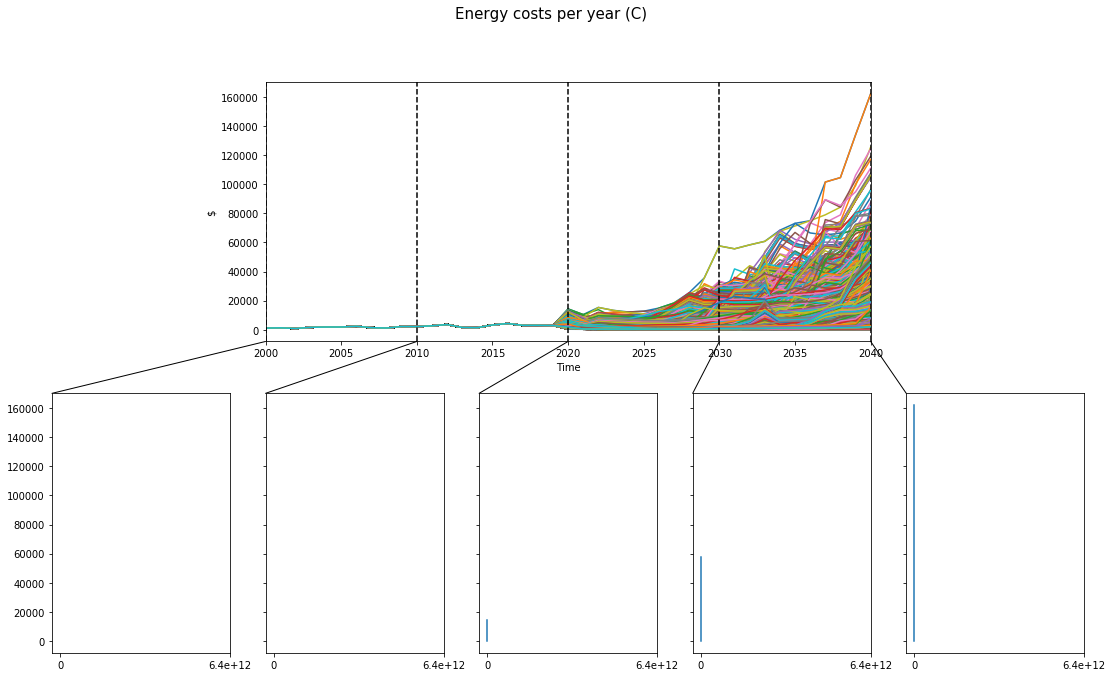

In [26]:
ooi = 'Energy costs per year (C)'
outcomes_filtered[ooi] = C_j_df.values
fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest, 
                                 density = Density.KDE, grouping_specifiers=None , titles={ooi}, ylabels={ooi: "$"}, legend=True,
                                 fill=False, plot_type=PlotType.ENV_LIN)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(simulationYears[range(0,len(simulationYears),5)])

## Show labels
# labels = ax_env['F']['main plot'].get_xticklabels()
# for l in labels:
#     print (l.get_text)


fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)
plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_line_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

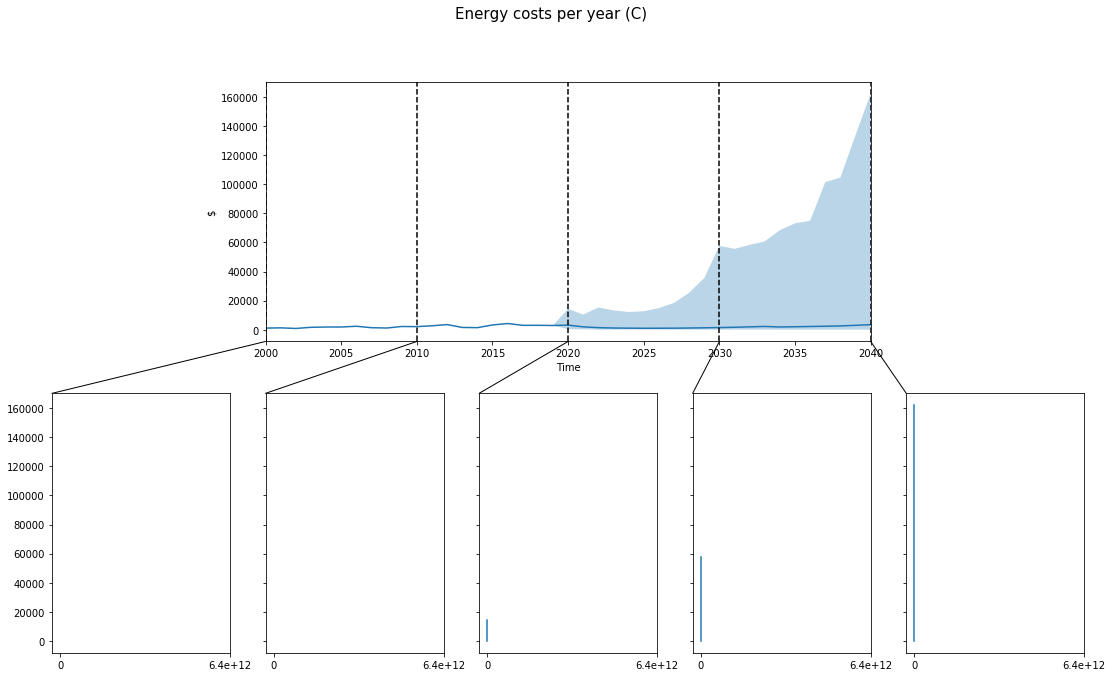

In [27]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density 

ooi = 'Energy costs per year (C)'
outcomes_filtered[ooi] = C_j_df.values
fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest, 
                                 density = Density.KDE, grouping_specifiers=None , titles={ooi}, 
                                 ylabels={ooi: "$"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)


#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(simulationYears[range(0,len(simulationYears),5)])

# ## Show labels
# labels = ax_env[ooi]['main plot'].get_xticklabels()
# for l in labels:
#     print (l.get_text())


fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)


plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')


TODO: plot energy costs per dwelling type and occupancy type. 

## Load family income data

Data obtained from ABS Census. The earliest income data gathered for this analysis is from the 1996 census. Followed by the 2001 census. From 2006, income data was gathered using the TableBuilder from the ABS. Data is available on this tool for the 2006, 2011 and 2016 Census. The data used droped the values on households who only stated their 'partial income' or did not stated their income at all. 

In [28]:
import qgrid


I_df = pd.read_excel('../assesmentData/STRD Dwelling Structure_HIED HouseholdEquivalisedIncome_FMCFFamily Composition_VIC_20061116_IMAPconventionV2.xlsx')
I_df.fillna(method='ffill',inplace=True)
I_df.set_index(['TIMEYear', 'STRD Dwelling Structure', 'HIED Household Equivalised Income (gross weekly)', 
                'yearly median $','weekly median $','lower bound $','upper bound $'], inplace=True)

#qgrid.show_grid(I_df)
I_df = I_df.astype(int)
I_df.head()

Couple family without children  \
TIMEYear STRD Dwelling Structure HIED Household Equivalised Income (gross weekly) yearly median $ weekly median $ lower bound $ upper bound $                                   
1996.0   DETACHED                Negative/nil income                              -52             -1.0            -1            -1                                       3207   
                                 $1-$119                                           3120            60.0            1             119                                     1130   
                                 $120-$299                                         10920           210.0           120           299                                    67704   
                                 $300-$499                                         20800           400.0           300           499                                    78395   
                                 $500-$699                                         31200           600.0           500           699                                    45125   

                                                                                                                                               Couple family with children  \
TIMEYear STRD Dwelling Structure HIED Household Equivalised Income (gross weekly) yearly median $ weekly median $ lower bound $ upper bound $                                
1996.0   DETACHED                Negative/nil income                              -52             -1.0            -1            -1                                    1604   
                                 $1-$119                                           3120            60.0            1             119                                  1058   
                                 $120-$299                                         10920           210.0           120           299                                 14728   
                                 $300-$499                                         20800           400.0           300           499                                 58893   
                                 $500-$699                                         31200           600.0           500           699                                 82441   

                                                                                                                                               One parent family  \
TIMEYear STRD Dwelling Structure HIED Household Equivalised Income (gross weekly) yearly median $ weekly median $ lower bound $ upper bound $                      
1996.0   DETACHED                Negative/nil income                              -52             -1.0            -1            -1                          1094   
                                 $1-$119                                           3120            60.0            1             119                        1471   
                                 $120-$299                                         10920           210.0           120           299                       35067   
                                 $300-$499                                         20800           400.0           300           499                       43755   
                                 $500-$699                                         31200           600.0           500           699                       24845   

                                                                                                                                               Other family  \
TIMEYear STRD Dwelling Structure HIED Household Equivalised Income (gross weekly) yearly median $ weekly median $ lower bound $ upper bound $                 
1996.0   DETACHED                Negative/nil income                              -52             -1.0            -1            -1                      517   
                                 $1-$119                  

### Missing data census 1996-2001

1996 and 2001 Income data does not have the population distributed by dwelling type.
#### Solution
- Compute 2006 total population for each household type across all dwelling types, 
- Compute 2006 distribution of population across dwelling types, for each household types, and 
- Apply 2006 distribution to the income data of 2001 and 1996 that was missing the distributions across dwelling types

In [29]:

# Compute 2006 total population for each household type across all dwelling types
I_totals_2006 = I_df.loc[2006,:].sum()

# Compute 2006 distribution of population across dwelling types, for each household types
I_distribution_dwellings_2006 = I_df.loc[2006,:].groupby(['STRD Dwelling Structure']).apply(lambda x: x.sum() / I_totals_2006 )

# Apply 2006 distribution to the income data of 2001 and 1996 that was missing the distributions across
# dwelling types
I_df.loc[[1996,2001],:] = I_df.loc[[1996,2001],:].groupby(['TIMEYear','STRD Dwelling Structure']).apply(lambda x: x * I_distribution_dwellings_2006 )
I_df = I_df.astype(int)

### Forecast Income 2016 - Last Year Simulation

Use Income distribution from the last census in 2016, and apply the distribution to the population forecast   

In [30]:
# total_households = I_df.loc[2016,I_df.columns[:-1]].sum().sum()
# I_distribution_2016 = I_df.loc[2016,I_df.columns[:-1]] / total_households
I_distribution_2016 = I_df.loc[2016,I_df.columns[:-1]].transform(lambda x: x / x.sum())

# Compute percentage of household in 2016 that didn't declare their income
I_distribution_2016_not_applicable = region_household_type.loc[2016,:] - I_df.loc[2016,:].sum()
I_distribution_2016_not_applicable /= region_household_type.loc[2016,region_household_type.columns[:]]
    
# for each Dwelling type 'DETACHED', 'SEMI-DETACHED', 'LOW FLAT', 'HIGH FLAT'
for year in np.arange(2017,endYear+1,1):
    
    # get population for forecasted year
    population_year = region_household_type.loc[year,region_household_type.columns[:-1]].values 
    
    # remove same proportion of N/A shown in 2016
    population_year *= 1-I_distribution_2016_not_applicable.iloc[:,:-1].values
    
   
    # multiply population X distribution in income categories
    I_df_year = (I_distribution_2016 * population_year).astype(int)
    
    # create Dataframe with new data
    year_index = pd.Series(np.full((I_distribution_2016.shape[0]),year))
    I_df_year = pd.concat([I_df_year], keys=year_index, names=['TIMEYear'])
    
    # compute last column with total number of household for each row
    I_df_year = I_df_year.astype(int)
    I_df_year['households'] = I_df_year.sum(axis=1).values

    # add to the income data
    I_df = I_df.append(I_df_year)

I_df = I_df.astype(int)

In [31]:
import qgrid
qgrid.show_grid(I_df)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

# Compute Energy Vulnerability

Threshold for median income. The percentage of the median income that defines the income poverty threshold (i.e. every income below this threshold falls in the energy vulnerability category)

In [32]:
threshold = 0.6

Function to query the Income data

In [33]:
# def filter_I_by_year( year ):
#     if year <= 2014:
#         return I_df.query('TIMEYear - 2  <= @year and TIMEYear + 2  >= @year ')
#     if year >= 2015:
#         return I_df.query('TIMEYear == 2016 ')
    
    
def filter_I_by_year( year ):
    if year <= 2014:
        return I_df.query('TIMEYear - 2  <= @year and TIMEYear + 2  >= @year ')
    if year == 2015:
        return I_df.query('TIMEYear == 2016 ')
    else:
        return I_df.query('TIMEYear == @year') 
    
# def filter_I_by_year( year ):
#     minYear = I_df.index.get_level_values(0).min()
#     maxYear = I_df.index.get_level_values(0).max()
#     if year < minYear:
#         return I_df.query('TIMEYear == @minYear')     
#     if year > maxYear:
#         return I_df.query('TIMEYear == @maxYear ')
#     else:
#         return I_df.query('TIMEYear - 2  <= @year and TIMEYear + 2  >= @year ')
        

Quantification of energy vulnerability

In [34]:
import itertools

# [income bracket, o, d]
# f = %
# income = %
# d = %
# o = %

size = (experiments.shape[0],simulationYears.shape[0])

# household energy requirements parameteres
occupancy_types = I_df.columns[:-1]
dwelling_types = R_df["DwellingType"].unique()
fuel_mix = R_df["EnergyType"].unique()

# Create all possible profiles: the cross product of all possible energy requirements
profiles = list(itertools.product(*[occupancy_types, dwelling_types, fuel_mix]))

# Create energy vulnerability dataframes
energy_vulnerable_df = {}
total_households = {}
for o,d,f in profiles:
    energy_vulnerable_df[(o,d,f)] = pd.DataFrame(data=np.full(size,0), columns=simulationYears)
    for year in simulationYears:    
        total_households[(o,d,f,year)] = 0

energy_vulnerable_df_total = pd.DataFrame(data=np.full(size,0), columns=simulationYears)

        
for o, d, f in profiles:
    
    # Specify the percentage of population with a given fuel mix
    pop_f = 0.8 if f == "GAS" else 0.2        
    
    # compte energy costs C
    
    if f == "GAS":
        # Retrieves the mean energy requirement for electricity and gas given the household profile
        (en_elec_req, en_gas_req ) = energy_electricity_gas_requirement( o, d, f)

        print("compute for o: {}, d: {}, f: {} - pop_f {}, en_elec_req: {}, en_gas_req: {} ".
              format(o,d,f, pop_f, en_elec_req, en_gas_req))
        
        R_matrix_elec_df = create_R_matrix_df( en_elec_req )
        R_matrix_gas_df = create_R_matrix_df( en_gas_req )
        C_j_df = (R_matrix_elec_df * P_j_df) + (R_matrix_gas_df * P_j_gas_df)
    else:
        # Retrieves the mean energy requirement given the household profile
        en_req = energy_requirement( o, d, f)

        print("compute for o: {}, d: {}, f: {} - pop_f {}, en_req: {} ".format(o,d,f, pop_f, en_req))
        
        R_matrix_df = create_R_matrix_df( en_req )
        C_j_df = R_matrix_df * P_j_df
        
        

    # for each year of the simulation runs
    for year in simulationYears:    
        # filter income information for a given year
        I_df_filtered = filter_I_by_year(year)

        # Compute Median income = sum (income*households by occupancy type) / total households by occup
        I_median = (I_df_filtered.index.get_level_values('yearly median $') * 
                            I_df_filtered[o]).sum() / I_df_filtered[o].sum()
        
        #I_median = (I_df_filtered.index.get_level_values('yearly median $') * 
        #                    I_df_filtered["households"]).sum() / I_df_filtered["households"].sum()

        # Compute threshold defined as 60 or 50% of median income
        I_threshold = I_median * threshold

        # for each income threshold in Dwelling type d
        I_df_filtered_dwelling_type = I_df_filtered[I_df_filtered.index.get_level_values('STRD Dwelling Structure') == d]
        for key, row in I_df_filtered_dwelling_type.iterrows():
            
            # compute the disposable income for each simulation run
            income_after_c = key[ I_df.index.names.index('yearly median $') ] - C_j_df[year]

            # Population needs to depend upon [income bracket, o, d, f]
            households = row[ list(I_df.columns.values).index(o) ] * pop_f
            
            # add to 'total' number of households that do not meet the threshold
            energy_vulnerable_df_total[year] += (income_after_c < I_threshold  ).astype(int) * households
            
            # add to (o,d,f) number of households that do not meet the threshold
            energy_vulnerable_df[(o,d,f)][year] += (income_after_c < I_threshold  ).astype(int) * households
            
            # keep track of total household for (o,d,f)
            total_households[(o,d,f,year)] += households
        
# compute percentage of population    
for o,d,f in profiles:
    for year in simulationYears:    
        energy_vulnerable_df[(o,d,f)][year] /= total_households[(o,d,f,year)]

energy_vulnerable_df_total /= I_df_filtered['households'].sum()
    

compute for o: Couple family without children, d: HIGH FLAT, f: ELECTRICITY - pop_f 0.2, en_req: 7263.678626996666 
compute for o: Couple family without children, d: HIGH FLAT, f: GAS - pop_f 0.8, en_elec_req: 3055.7288144544445, en_gas_req: 9871.568868921111 
compute for o: Couple family without children, d: SEMI-DETACHED, f: ELECTRICITY - pop_f 0.2, en_req: 8549.996066259999 
compute for o: Couple family without children, d: SEMI-DETACHED, f: GAS - pop_f 0.8, en_elec_req: 3105.7429664533333, en_gas_req: 13494.246576655556 
compute for o: Couple family without children, d: LOW FLAT, f: ELECTRICITY - pop_f 0.2, en_req: 8853.889917537777 
compute for o: Couple family without children, d: LOW FLAT, f: GAS - pop_f 0.8, en_elec_req: 3195.0148901199996, en_gas_req: 14132.74668128 
compute for o: Couple family without children, d: DETACHED, f: ELECTRICITY - pop_f 0.2, en_req: 9175.233973674443 
compute for o: Couple family without children, d: DETACHED, f: GAS - pop_f 0.8, en_elec_req: 3564.

# Analysis

<img src="images/classification.png" alt="Drawing" style="width: 600px;"/>


## Plot Percentage of Vulnerable Households

Densities (PDF): {'0.1 to 0.2': '11.000'}
% in Bin: {'-0.3 to -0.2': '0.0%', '-0.2 to -0.1': '0.0%', '-0.1 to -0.0': '0.0%', '-0.0 to 0.0': '0.0%', '0.0 to 0.1': '0.0%', '0.1 to 0.2': '100.0%', '0.2 to 0.3': '0.0%', '0.3 to 0.4': '0.0%', '0.4 to 0.5': '0.0%', '0.5 to 0.6': '0.0%', '0.6 to 0.7': '0.0%'}

Densities (PDF): {'0.2 to 0.2': '11.000'}
% in Bin: {'-0.3 to -0.2': '0.0%', '-0.2 to -0.1': '0.0%', '-0.1 to -0.0': '0.0%', '-0.0 to 0.1': '0.0%', '0.1 to 0.2': '0.0%', '0.2 to 0.2': '100.0%', '0.2 to 0.3': '0.0%', '0.3 to 0.4': '0.0%', '0.4 to 0.5': '0.0%', '0.5 to 0.6': '0.0%', '0.6 to 0.7': '0.0%'}

Densities (PDF): {'0.2 to 0.2': '9.055', '0.2 to 0.3': '42.669', '0.3 to 0.3': '0.165'}
% in Bin: {'0.2 to 0.2': '4.8%', '0.2 to 0.3': '22.7%', '0.3 to 0.3': '0.1%'}

Densities (PDF): {'0.3 to 0.3': '3.043', '0.3 to 0.4': '0.709', '0.4 to 0.4': '0.017'}
% in Bin: {'0.3 to 0.3': '5.8%', '0.3 to 0.4': '1.4%', '0.4 to 0.4': '0.0%', '0.4 to 0.5': '0.0%', '0.5 to 0.5': '0.0%'}

Densities (PDF

Densities (PDF): {'0.4 to 0.5': '11.000'}
% in Bin: {'-0.1 to 0.0': '0.0%', '0.0 to 0.1': '0.0%', '0.1 to 0.2': '0.0%', '0.2 to 0.3': '0.0%', '0.3 to 0.4': '0.0%', '0.4 to 0.5': '100.0%', '0.5 to 0.6': '0.0%', '0.6 to 0.7': '0.0%', '0.7 to 0.8': '0.0%', '0.8 to 0.9': '0.0%', '0.9 to 0.9': '0.0%'}

Densities (PDF): {'0.3 to 0.4': '11.000'}
% in Bin: {'-0.1 to -0.0': '0.0%', '-0.0 to 0.0': '0.0%', '0.0 to 0.1': '0.0%', '0.1 to 0.2': '0.0%', '0.2 to 0.3': '0.0%', '0.3 to 0.4': '100.0%', '0.4 to 0.5': '0.0%', '0.5 to 0.6': '0.0%', '0.6 to 0.7': '0.0%', '0.7 to 0.8': '0.0%', '0.8 to 0.9': '0.0%'}

Densities (PDF): {'0.4 to 0.5': '102.530', '0.5 to 0.6': '0.024'}
% in Bin: {'0.4 to 0.5': '100.0%', '0.5 to 0.5': '0.0%', '0.5 to 0.6': '0.0%'}

Densities (PDF): {'0.4 to 0.5': '35.748', '0.5 to 0.6': '0.199', '0.6 to 0.7': '0.006'}
% in Bin: {'0.4 to 0.5': '99.4%', '0.5 to 0.5': '0.0%', '0.5 to 0.6': '0.6%', '0.6 to 0.6': '0.0%', '0.6 to 0.7': '0.0%', '0.7 to 0.7': '0.0%', '0.7 to 0.8': '0.0%'}


Densities (PDF): {'0.3 to 0.4': '11.000'}
% in Bin: {'-0.1 to -0.0': '0.0%', '-0.0 to 0.1': '0.0%', '0.1 to 0.1': '0.0%', '0.1 to 0.2': '0.0%', '0.2 to 0.3': '0.0%', '0.3 to 0.4': '100.0%', '0.4 to 0.5': '0.0%', '0.5 to 0.6': '0.0%', '0.6 to 0.7': '0.0%', '0.7 to 0.8': '0.0%', '0.8 to 0.9': '0.0%'}

Densities (PDF): {'0.3 to 0.4': '11.000'}
% in Bin: {'-0.1 to -0.0': '0.0%', '-0.0 to 0.1': '0.0%', '0.1 to 0.2': '0.0%', '0.2 to 0.3': '0.0%', '0.3 to 0.3': '0.0%', '0.3 to 0.4': '100.0%', '0.4 to 0.5': '0.0%', '0.5 to 0.6': '0.0%', '0.6 to 0.7': '0.0%', '0.7 to 0.8': '0.0%', '0.8 to 0.9': '0.0%'}

Densities (PDF): {'0.3 to 0.4': '15.820', '0.4 to 0.4': '32.499', '0.5 to 0.6': '0.010'}
% in Bin: {'0.3 to 0.4': '32.7%', '0.4 to 0.4': '67.2%', '0.4 to 0.5': '0.0%', '0.5 to 0.5': '0.0%', '0.5 to 0.6': '0.0%'}

Densities (PDF): {'0.3 to 0.4': '18.728', '0.4 to 0.5': '5.635', '0.5 to 0.6': '0.122', '0.7 to 0.7': '0.009'}
% in Bin: {'0.3 to 0.4': '76.5%', '0.4 to 0.4': '0.0%', '0.4 to 0.5': '23.

Densities (PDF): {'0.3 to 0.3': '11.000'}
% in Bin: {'-0.2 to -0.1': '0.0%', '-0.1 to -0.0': '0.0%', '-0.0 to 0.1': '0.0%', '0.1 to 0.2': '0.0%', '0.2 to 0.3': '0.0%', '0.3 to 0.3': '100.0%', '0.3 to 0.4': '0.0%', '0.4 to 0.5': '0.0%', '0.5 to 0.6': '0.0%', '0.6 to 0.7': '0.0%', '0.7 to 0.8': '0.0%'}

Densities (PDF): {'0.3 to 0.4': '11.000'}
% in Bin: {'-0.2 to -0.1': '0.0%', '-0.1 to 0.0': '0.0%', '0.0 to 0.1': '0.0%', '0.1 to 0.2': '0.0%', '0.2 to 0.3': '0.0%', '0.3 to 0.4': '100.0%', '0.4 to 0.5': '0.0%', '0.5 to 0.6': '0.0%', '0.6 to 0.6': '0.0%', '0.6 to 0.7': '0.0%', '0.7 to 0.8': '0.0%'}

Densities (PDF): {'0.4 to 0.4': '75.132', '0.5 to 0.5': '1.879'}
% in Bin: {'0.4 to 0.4': '0.0%', '0.4 to 0.5': '0.0%', '0.5 to 0.5': '2.4%'}

Densities (PDF): {'0.4 to 0.4': '22.150', '0.5 to 0.5': '0.276', '0.6 to 0.6': '0.045'}
% in Bin: {'0.4 to 0.4': '0.0%', '0.4 to 0.5': '0.0%', '0.5 to 0.5': '1.2%', '0.5 to 0.6': '0.0%', '0.6 to 0.6': '0.2%', '0.6 to 0.7': '0.0%', '0.7 to 0.7': '0.0%', 

C:\Users\angel\Documents\GitHub\gr4sp\experiments\EMAworkbench\ema_workbench\analysis\plotting.py:750: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Densities (PDF): {'0.3 to 0.3': '11.000'}
% in Bin: {'-0.2 to -0.1': '0.0%', '-0.1 to -0.0': '0.0%', '-0.0 to 0.1': '0.0%', '0.1 to 0.2': '0.0%', '0.2 to 0.3': '0.0%', '0.3 to 0.3': '100.0%', '0.3 to 0.4': '0.0%', '0.4 to 0.5': '0.0%', '0.5 to 0.6': '0.0%', '0.6 to 0.7': '0.0%', '0.7 to 0.8': '0.0%'}

Densities (PDF): {'0.3 to 0.4': '11.000'}
% in Bin: {'-0.2 to -0.1': '0.0%', '-0.1 to 0.0': '0.0%', '0.0 to 0.1': '0.0%', '0.1 to 0.2': '0.0%', '0.2 to 0.3': '0.0%', '0.3 to 0.4': '100.0%', '0.4 to 0.5': '0.0%', '0.5 to 0.6': '0.0%', '0.6 to 0.6': '0.0%', '0.6 to 0.7': '0.0%', '0.7 to 0.8': '0.0%'}

Densities (PDF): {'0.3 to 0.4': '11.000'}
% in Bin: {'-0.1 to -0.1': '0.0%', '-0.1 to 0.0': '0.0%', '0.0 to 0.1': '0.0%', '0.1 to 0.2': '0.0%', '0.2 to 0.3': '0.0%', '0.3 to 0.4': '100.0%', '0.4 to 0.5': '0.0%', '0.5 to 0.6': '0.0%', '0.6 to 0.7': '0.0%', '0.7 to 0.8': '0.0%', '0.8 to 0.9': '0.0%'}

Densities (PDF): {'0.4 to 0.4': '41.641', '0.5 to 0.5': '0.084'}
% in Bin: {'0.4 to 0.4': '0.0%

Densities (PDF): {'0.3 to 0.4': '11.000'}
% in Bin: {'-0.1 to -0.0': '0.0%', '-0.0 to 0.0': '0.0%', '0.0 to 0.1': '0.0%', '0.1 to 0.2': '0.0%', '0.2 to 0.3': '0.0%', '0.3 to 0.4': '100.0%', '0.4 to 0.5': '0.0%', '0.5 to 0.6': '0.0%', '0.6 to 0.7': '0.0%', '0.7 to 0.8': '0.0%', '0.8 to 0.9': '0.0%'}

Densities (PDF): {'0.5 to 0.6': '11.000'}
% in Bin: {'0.0 to 0.1': '0.0%', '0.1 to 0.2': '0.0%', '0.2 to 0.3': '0.0%', '0.3 to 0.4': '0.0%', '0.4 to 0.5': '0.0%', '0.5 to 0.6': '100.0%', '0.6 to 0.7': '0.0%', '0.7 to 0.8': '0.0%', '0.8 to 0.9': '0.0%', '0.9 to 0.9': '0.0%', '0.9 to 1.0': '0.0%'}

Densities (PDF): {'0.4 to 0.4': '1.501', '0.5 to 0.5': '118.404'}
% in Bin: {'0.4 to 0.4': '1.3%', '0.4 to 0.5': '0.0%', '0.5 to 0.5': '98.7%'}

Densities (PDF): {'0.4 to 0.5': '1.235', '0.5 to 0.5': '62.402'}
% in Bin: {'0.4 to 0.5': '1.9%', '0.5 to 0.5': '0.0%', '0.5 to 0.6': '0.0%', '0.6 to 0.6': '0.0%'}

Densities (PDF): {'0.5 to 0.6': '44.838', '0.6 to 0.6': '0.196', '0.7 to 0.7': '0.009'}
% i

Densities (PDF): {'0.3 to 0.4': '11.000'}
% in Bin: {'-0.1 to -0.0': '0.0%', '-0.0 to 0.0': '0.0%', '0.0 to 0.1': '0.0%', '0.1 to 0.2': '0.0%', '0.2 to 0.3': '0.0%', '0.3 to 0.4': '100.0%', '0.4 to 0.5': '0.0%', '0.5 to 0.6': '0.0%', '0.6 to 0.7': '0.0%', '0.7 to 0.8': '0.0%', '0.8 to 0.9': '0.0%'}

Densities (PDF): {'0.3 to 0.4': '11.000'}
% in Bin: {'-0.1 to -0.0': '0.0%', '-0.0 to 0.1': '0.0%', '0.1 to 0.1': '0.0%', '0.1 to 0.2': '0.0%', '0.2 to 0.3': '0.0%', '0.3 to 0.4': '100.0%', '0.4 to 0.5': '0.0%', '0.5 to 0.6': '0.0%', '0.6 to 0.7': '0.0%', '0.7 to 0.8': '0.0%', '0.8 to 0.9': '0.0%'}

Densities (PDF): {'0.3 to 0.4': '11.000'}
% in Bin: {'-0.1 to -0.0': '0.0%', '-0.0 to 0.1': '0.0%', '0.1 to 0.2': '0.0%', '0.2 to 0.2': '0.0%', '0.2 to 0.3': '0.0%', '0.3 to 0.4': '100.0%', '0.4 to 0.5': '0.0%', '0.5 to 0.6': '0.0%', '0.6 to 0.7': '0.0%', '0.7 to 0.8': '0.0%', '0.8 to 0.9': '0.0%'}

Densities (PDF): {'0.4 to 0.4': '85.519', '0.5 to 0.5': '0.003'}
% in Bin: {'0.4 to 0.4': '0.0%',

Densities (PDF): {'0.3 to 0.4': '11.000'}
% in Bin: {'-0.2 to -0.1': '0.0%', '-0.1 to -0.0': '0.0%', '-0.0 to 0.1': '0.0%', '0.1 to 0.2': '0.0%', '0.2 to 0.3': '0.0%', '0.3 to 0.4': '100.0%', '0.4 to 0.4': '0.0%', '0.4 to 0.5': '0.0%', '0.5 to 0.6': '0.0%', '0.6 to 0.7': '0.0%', '0.7 to 0.8': '0.0%'}

Densities (PDF): {'0.5 to 0.6': '11.000'}
% in Bin: {'0.0 to 0.1': '0.0%', '0.1 to 0.2': '0.0%', '0.2 to 0.3': '0.0%', '0.3 to 0.4': '0.0%', '0.4 to 0.5': '0.0%', '0.5 to 0.6': '100.0%', '0.6 to 0.7': '0.0%', '0.7 to 0.8': '0.0%', '0.8 to 0.9': '0.0%', '0.9 to 1.0': '0.0%', '1.0 to 1.0': '0.0%'}

Densities (PDF): {'0.4 to 0.4': '4.202', '0.5 to 0.5': '100.175'}
% in Bin: {'0.4 to 0.4': '0.0%', '0.4 to 0.5': '0.0%', '0.5 to 0.5': '96.0%'}

Densities (PDF): {'0.4 to 0.4': '17.256', '0.5 to 0.5': '20.524', '0.6 to 0.6': '0.106'}
% in Bin: {'0.4 to 0.4': '45.5%', '0.4 to 0.5': '0.0%', '0.5 to 0.5': '54.2%', '0.5 to 0.6': '0.0%', '0.6 to 0.6': '0.3%', '0.6 to 0.7': '0.0%', '0.7 to 0.7': '0.0%'

Densities (PDF): {'0.3 to 0.4': '11.000'}
% in Bin: {'-0.2 to -0.1': '0.0%', '-0.1 to -0.0': '0.0%', '-0.0 to 0.1': '0.0%', '0.1 to 0.2': '0.0%', '0.2 to 0.3': '0.0%', '0.3 to 0.4': '100.0%', '0.4 to 0.4': '0.0%', '0.4 to 0.5': '0.0%', '0.5 to 0.6': '0.0%', '0.6 to 0.7': '0.0%', '0.7 to 0.8': '0.0%'}

Densities (PDF): {'0.6 to 0.7': '11.000'}
% in Bin: {'0.2 to 0.3': '0.0%', '0.3 to 0.4': '0.0%', '0.4 to 0.5': '0.0%', '0.5 to 0.6': '0.0%', '0.6 to 0.6': '0.0%', '0.6 to 0.7': '100.0%', '0.7 to 0.8': '0.0%', '0.8 to 0.9': '0.0%', '0.9 to 1.0': '0.0%', '1.0 to 1.1': '0.0%', '1.1 to 1.2': '0.0%'}

Densities (PDF): {'0.5 to 0.5': '89.776', '0.6 to 0.6': '20.679'}
% in Bin: {'0.5 to 0.5': '0.0%', '0.5 to 0.6': '0.0%', '0.6 to 0.6': '18.7%'}

Densities (PDF): {'0.5 to 0.5': '59.392', '0.6 to 0.6': '3.535'}
% in Bin: {'0.5 to 0.5': '94.4%', '0.5 to 0.6': '0.0%', '0.6 to 0.6': '5.6%', '0.6 to 0.7': '0.0%', '0.7 to 0.7': '0.0%'}

Densities (PDF): {'0.5 to 0.6': '26.051', '0.6 to 0.6': '7.445', '

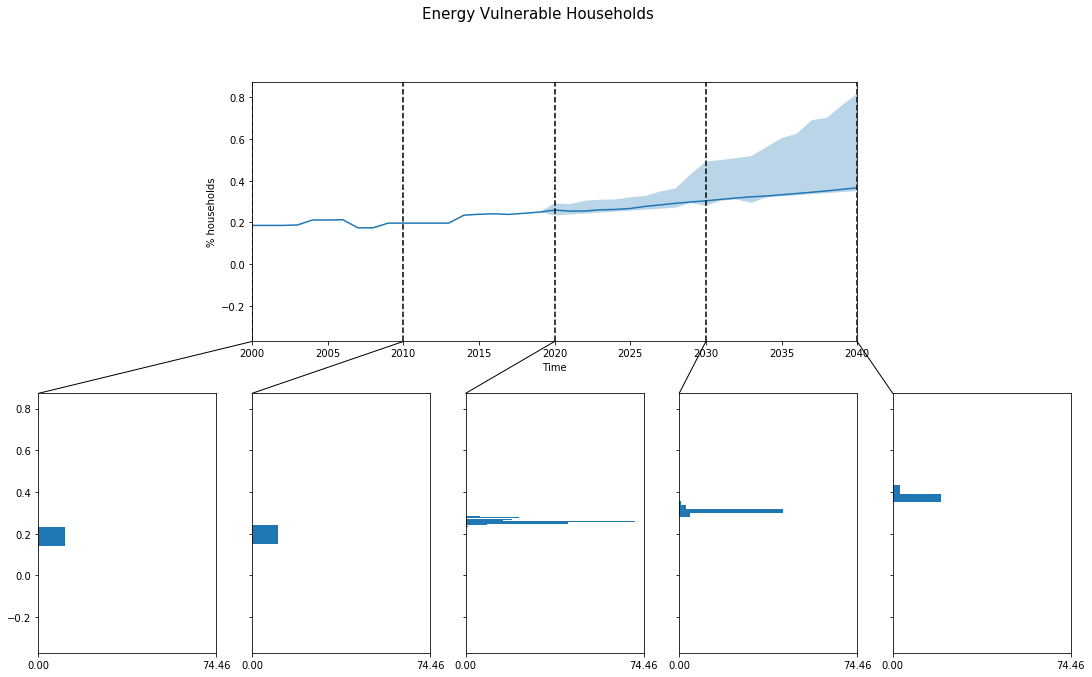

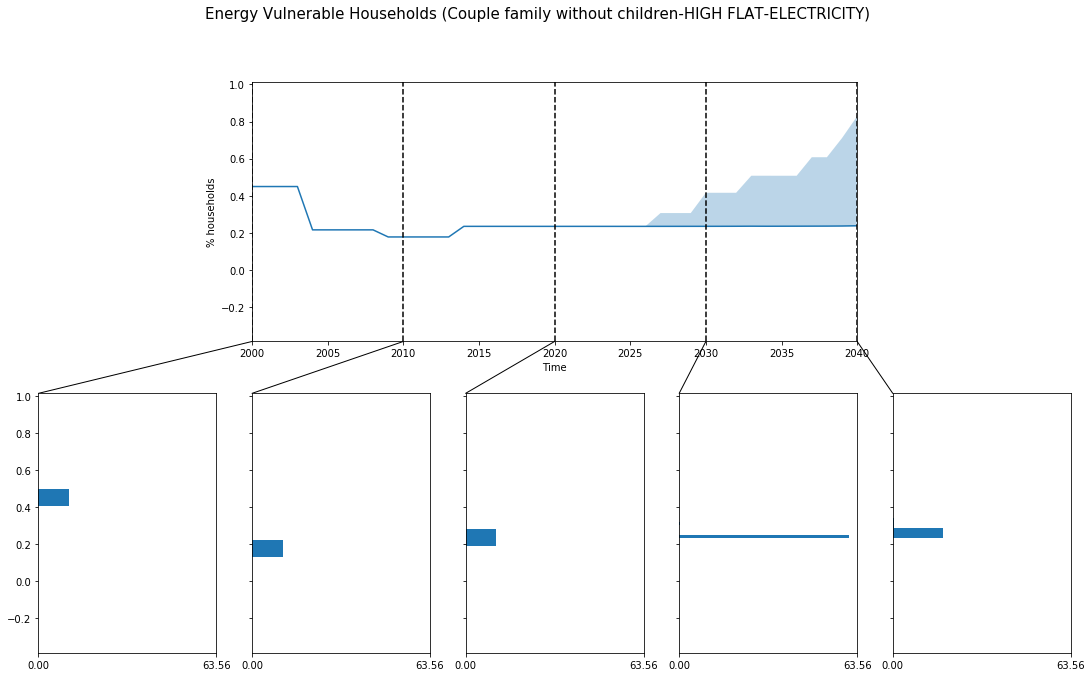

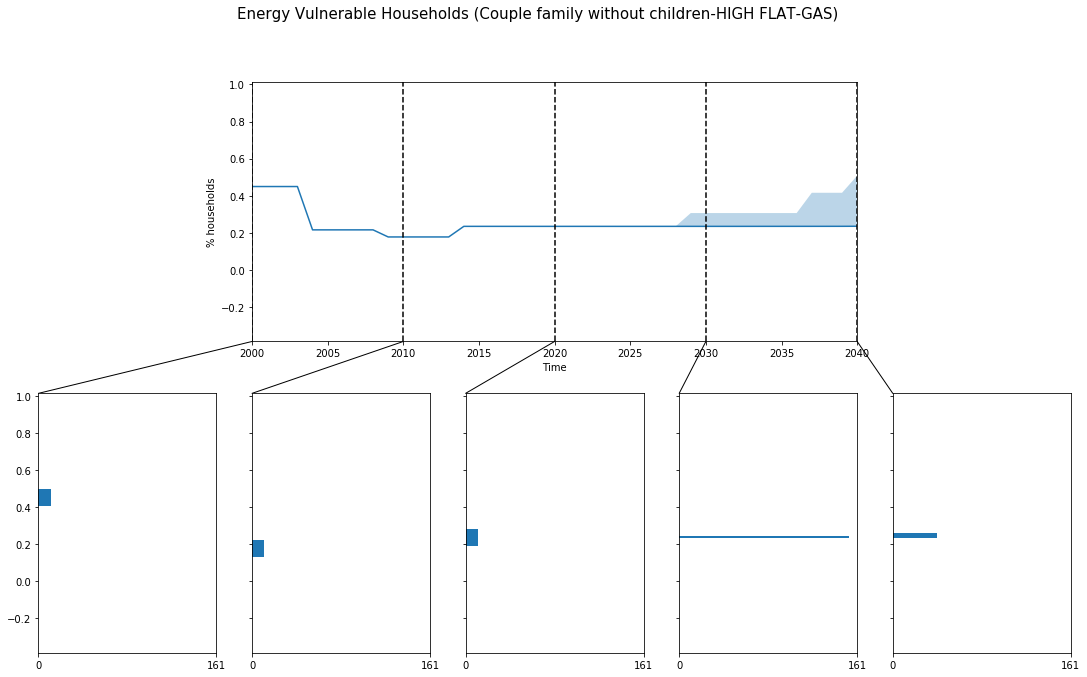

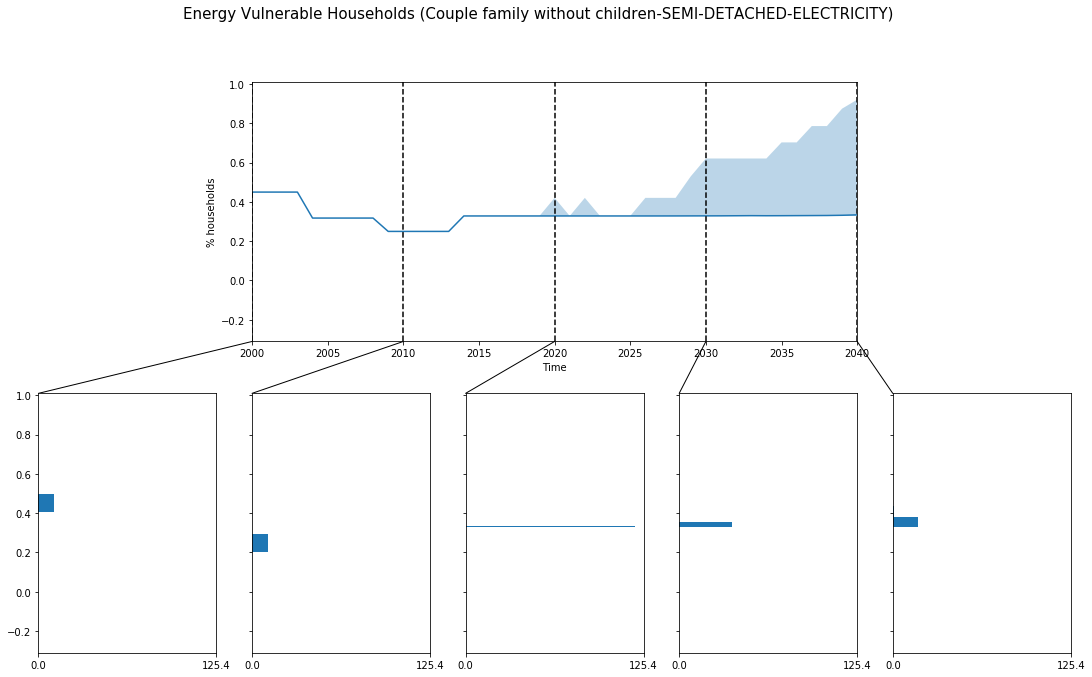

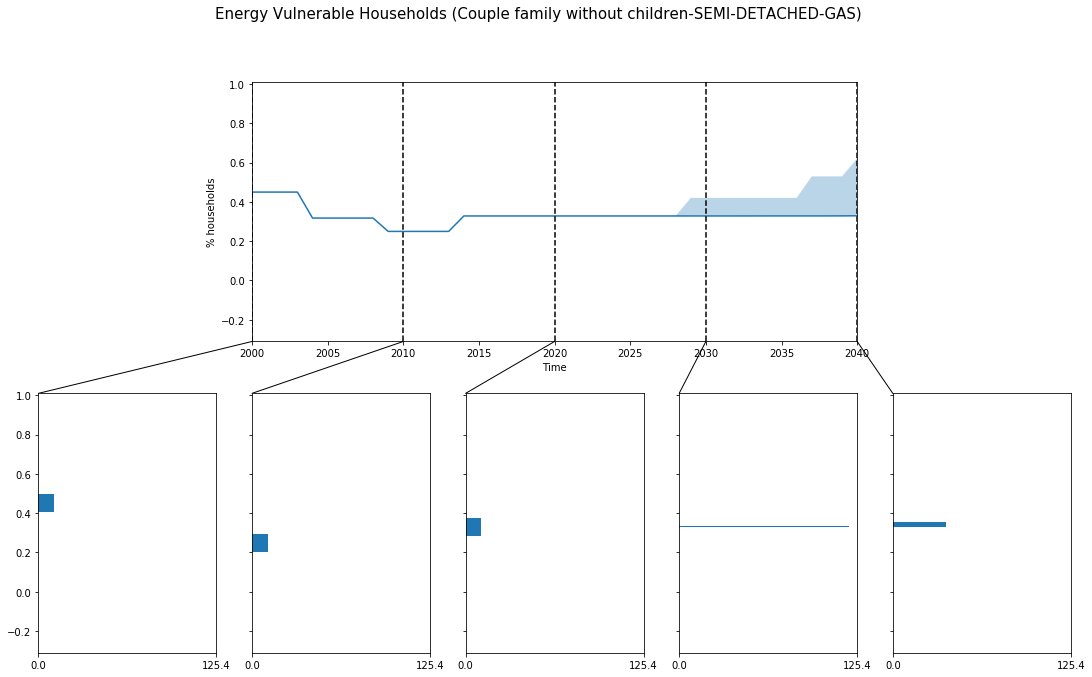

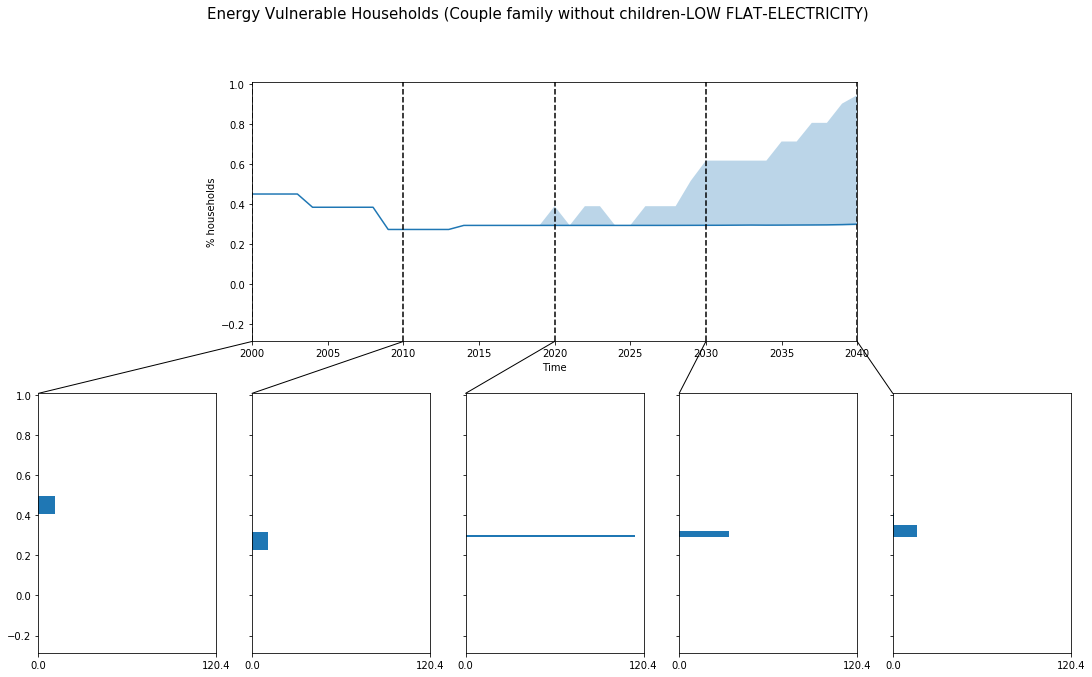

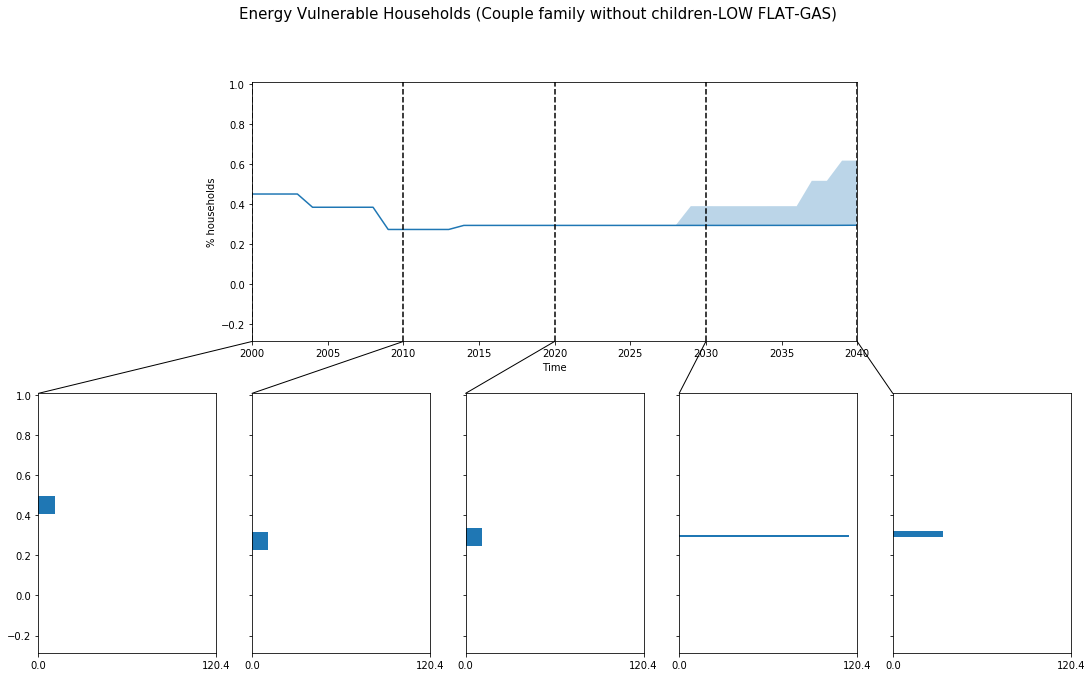

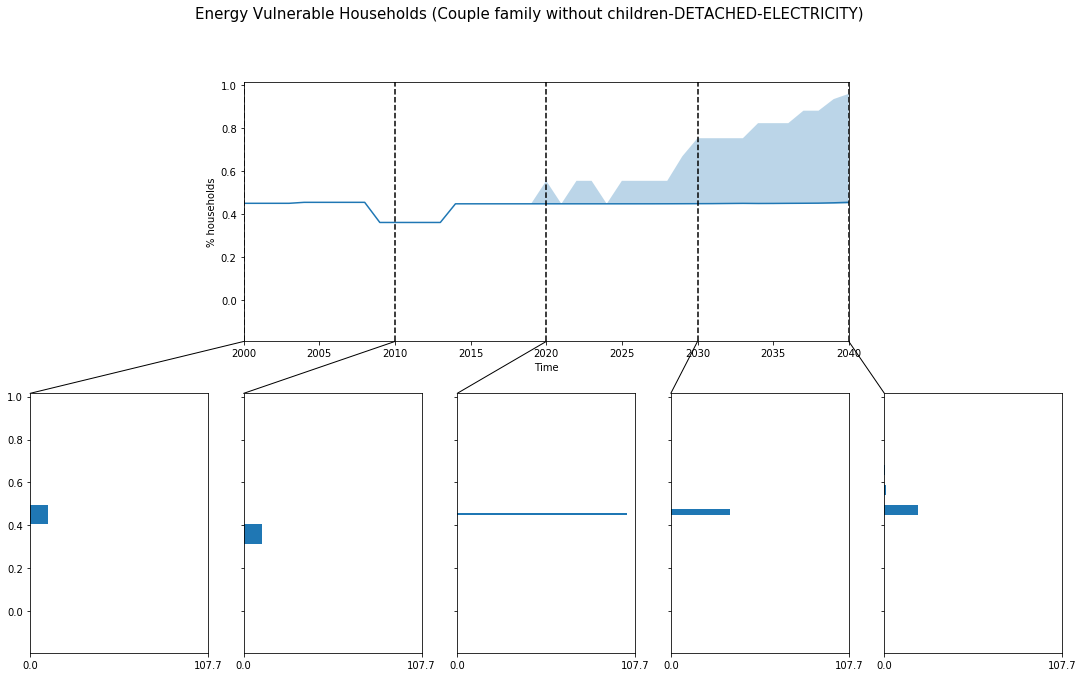

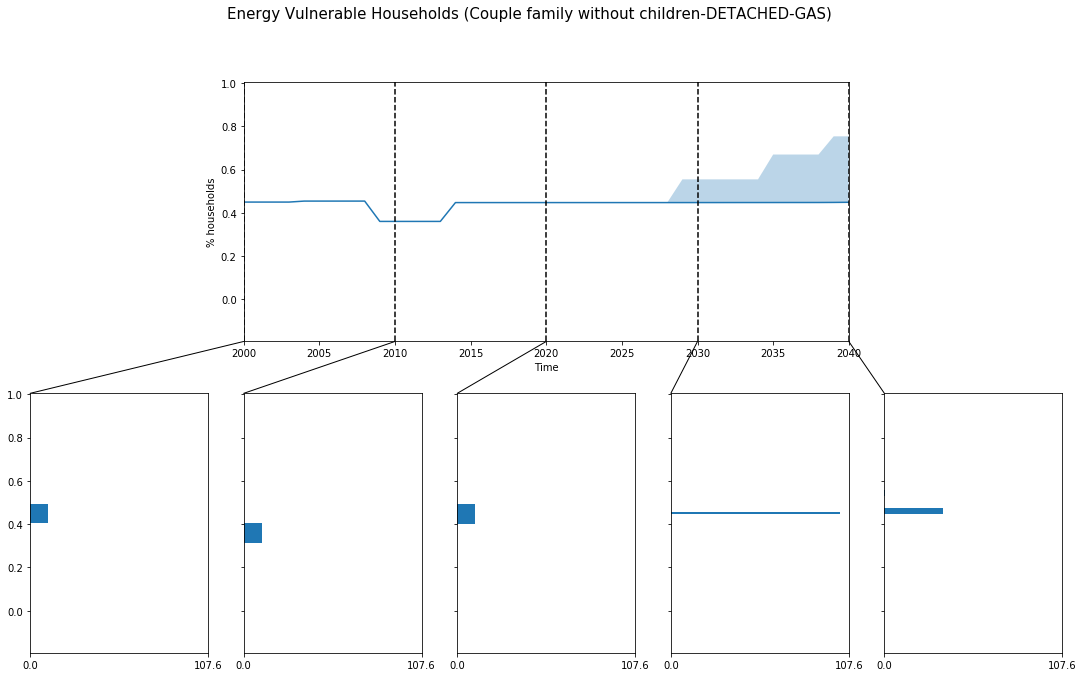

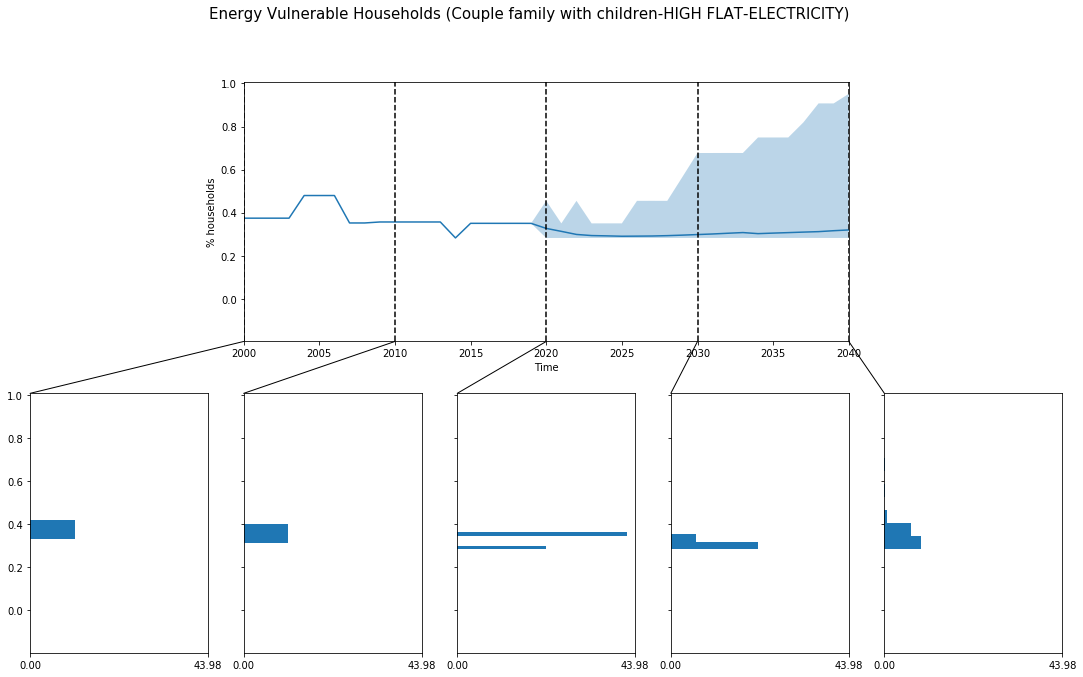

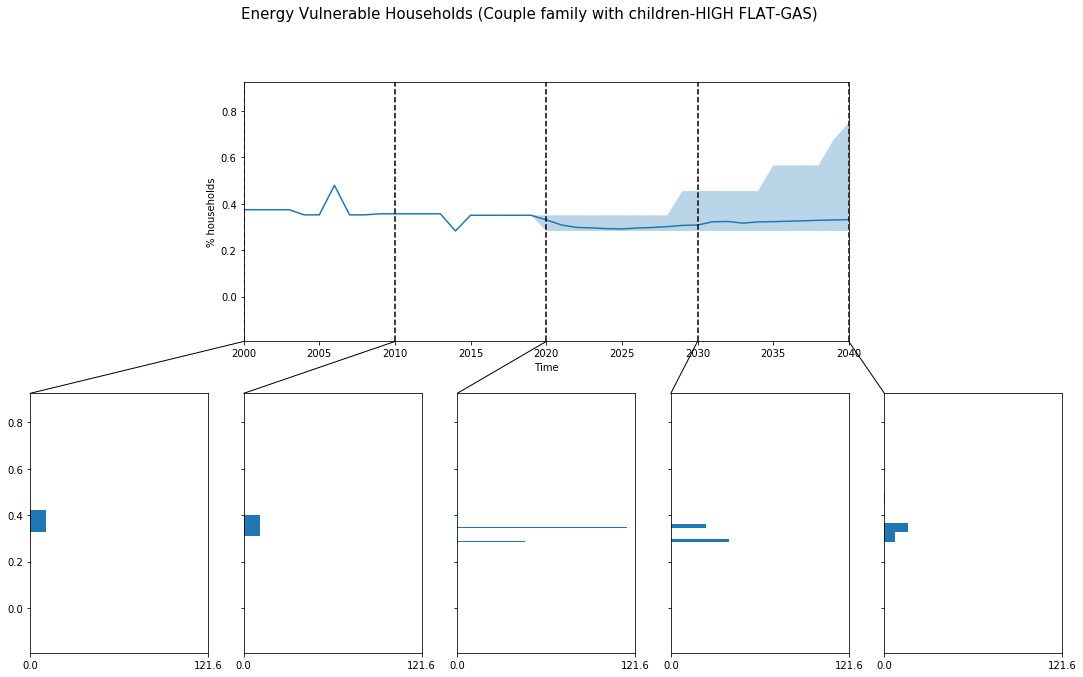

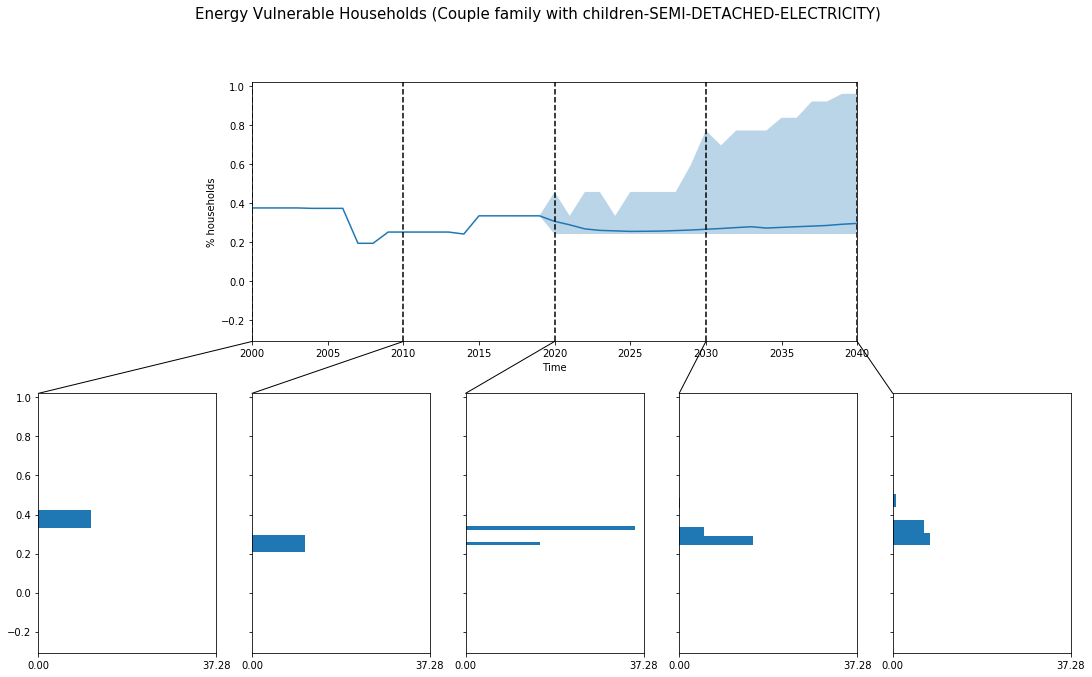

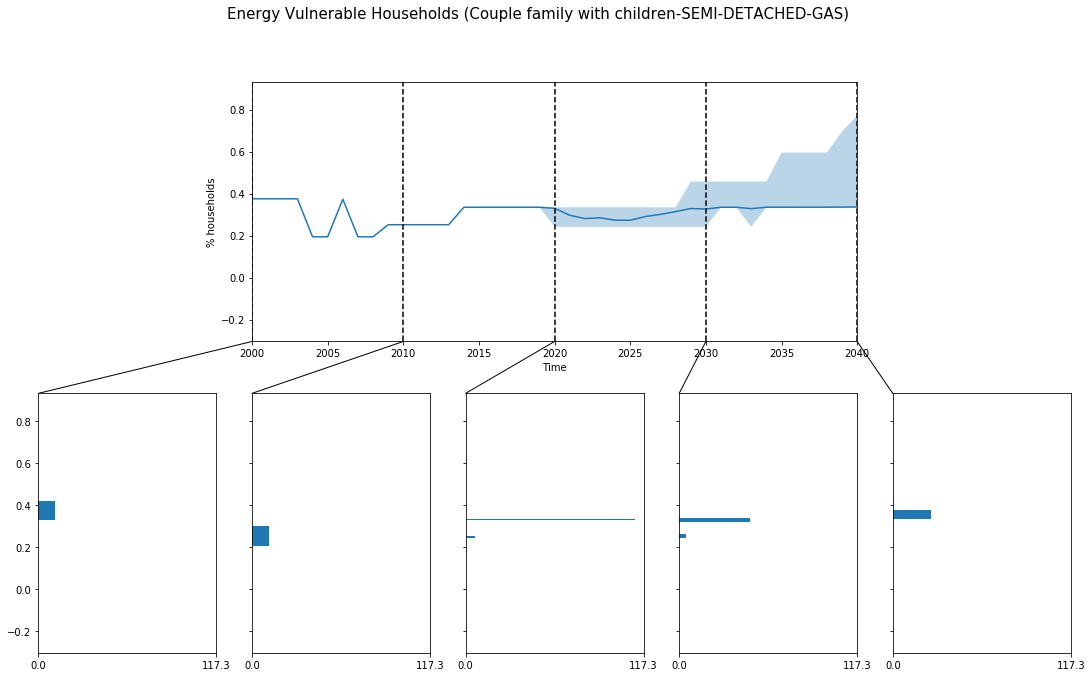

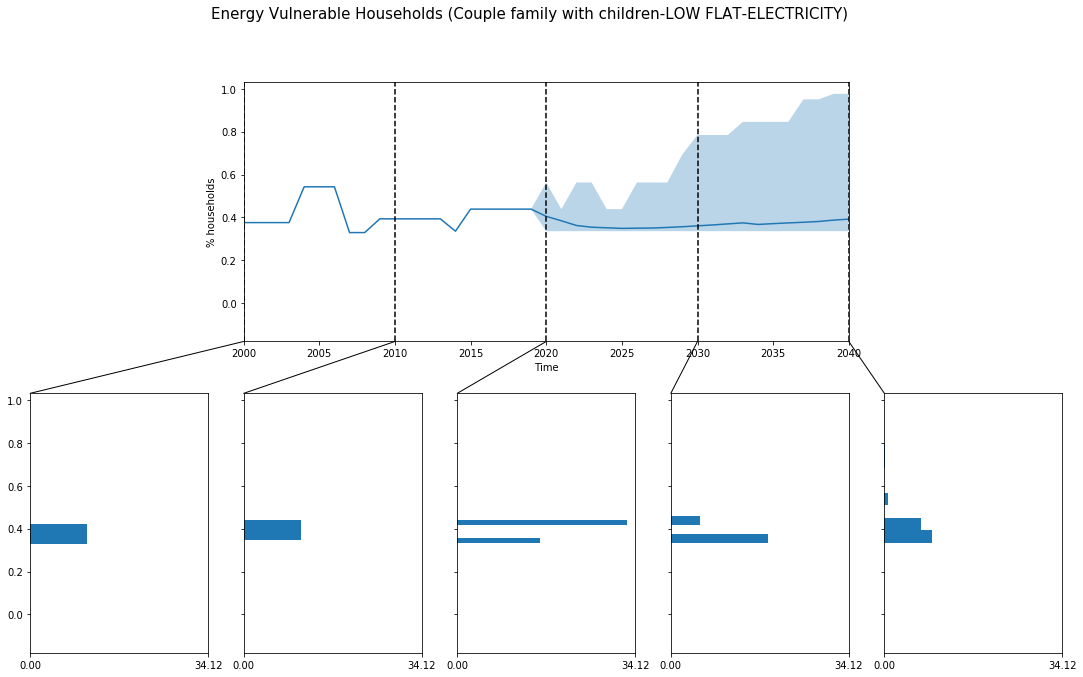

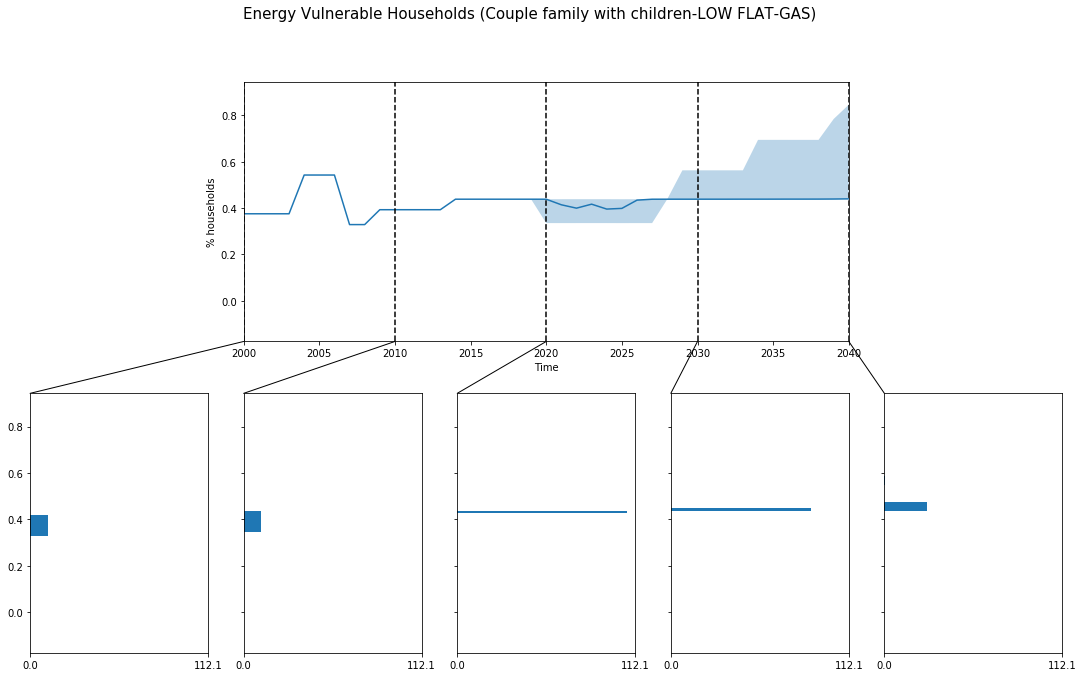

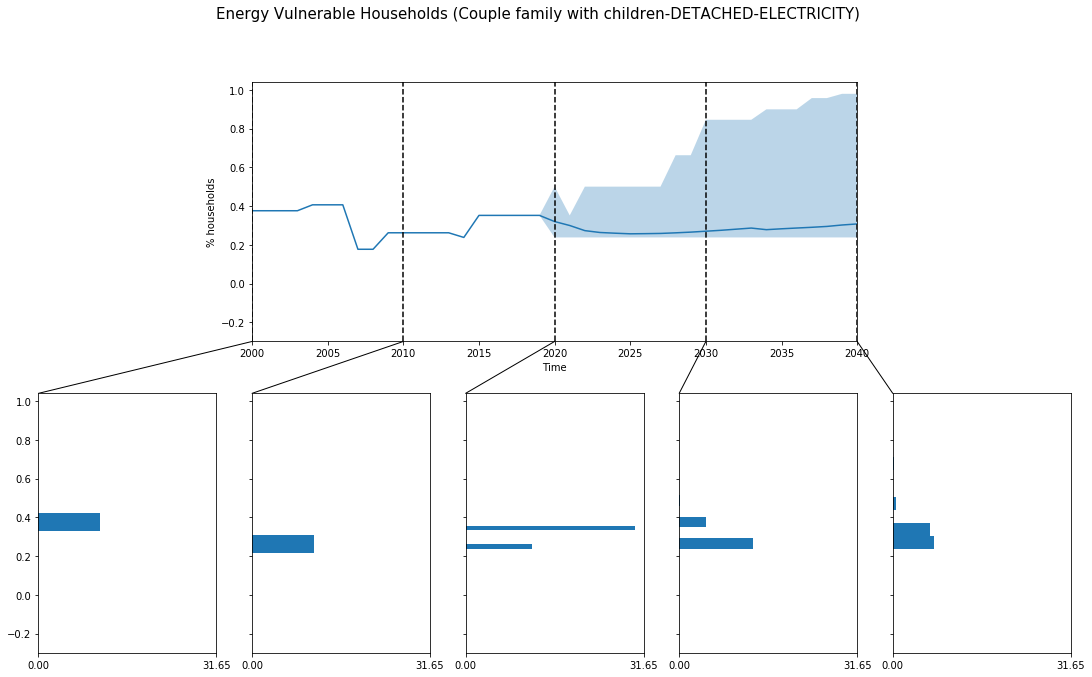

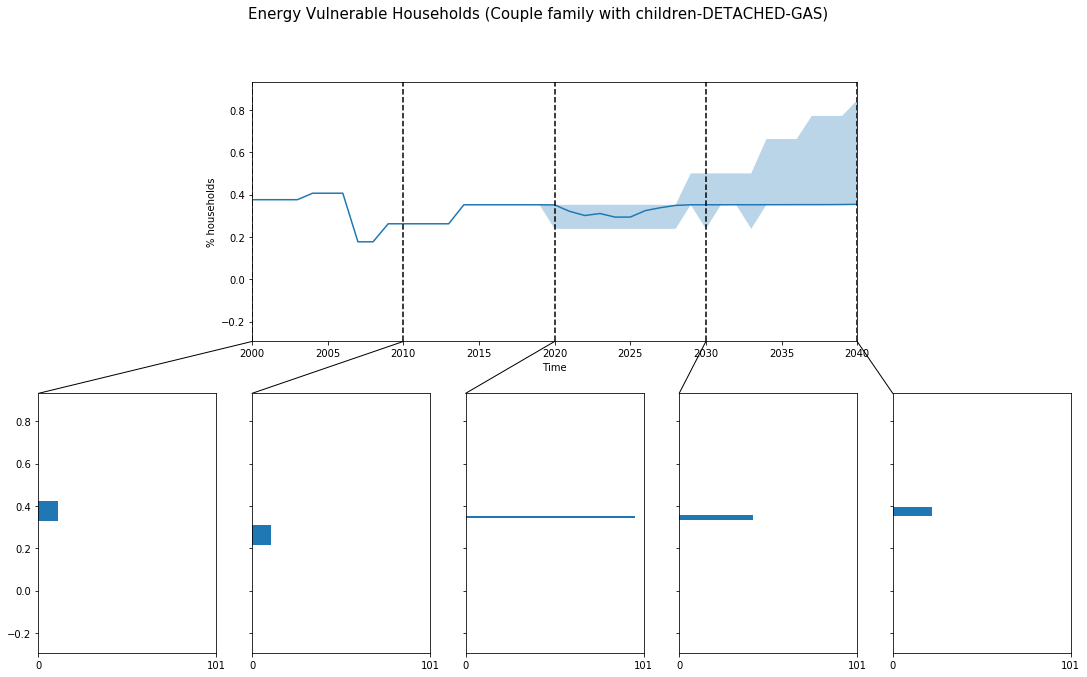

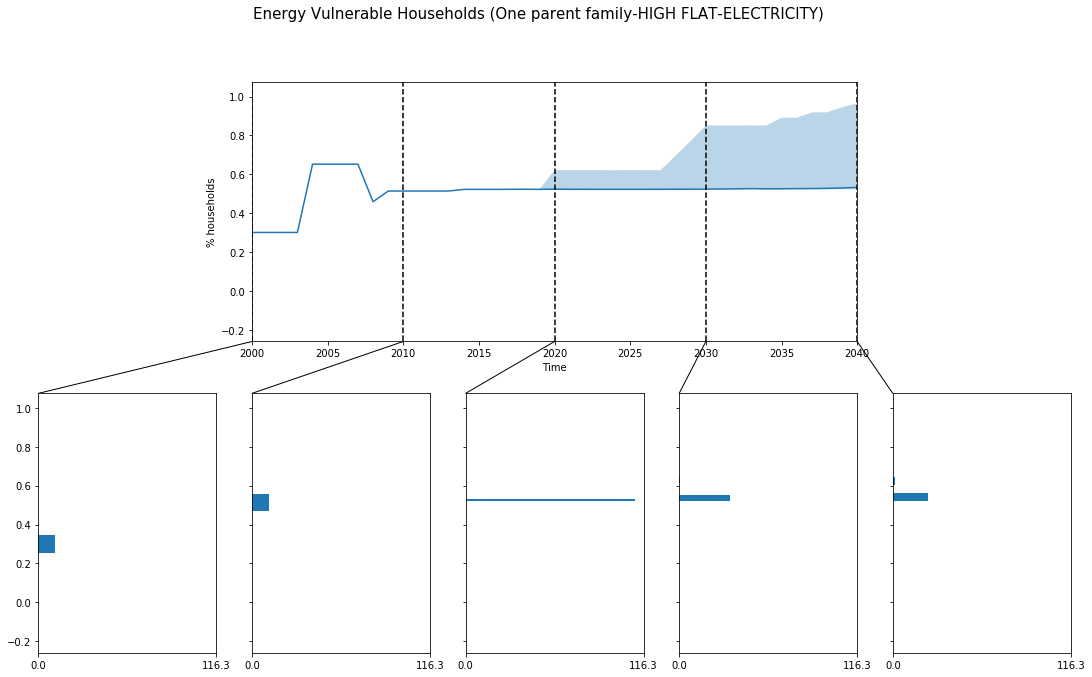

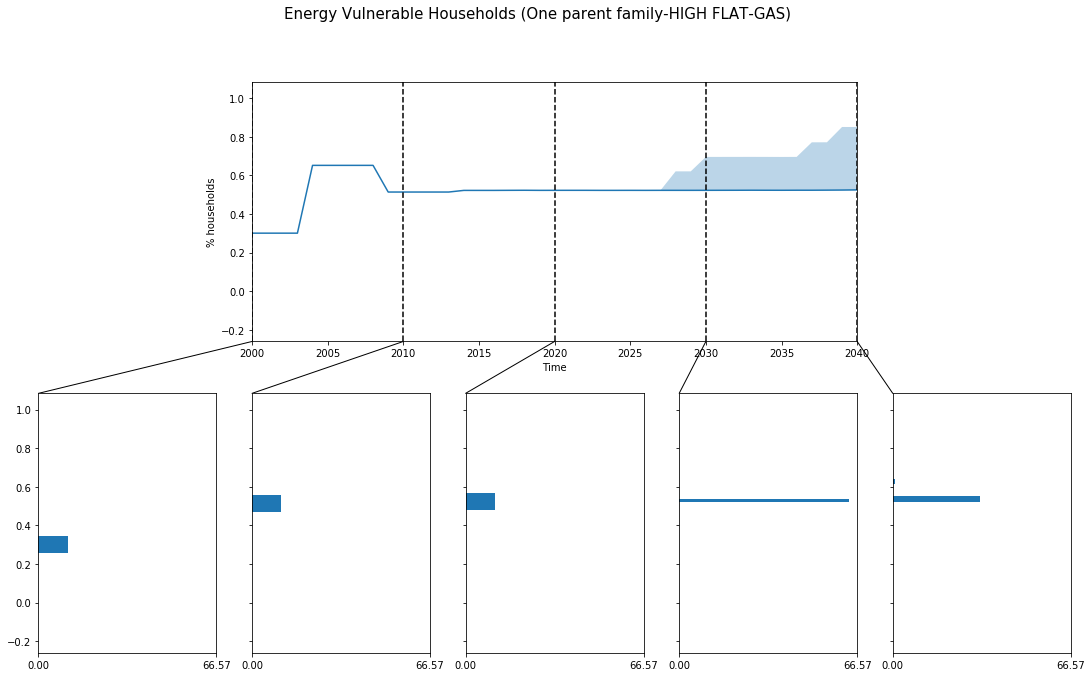

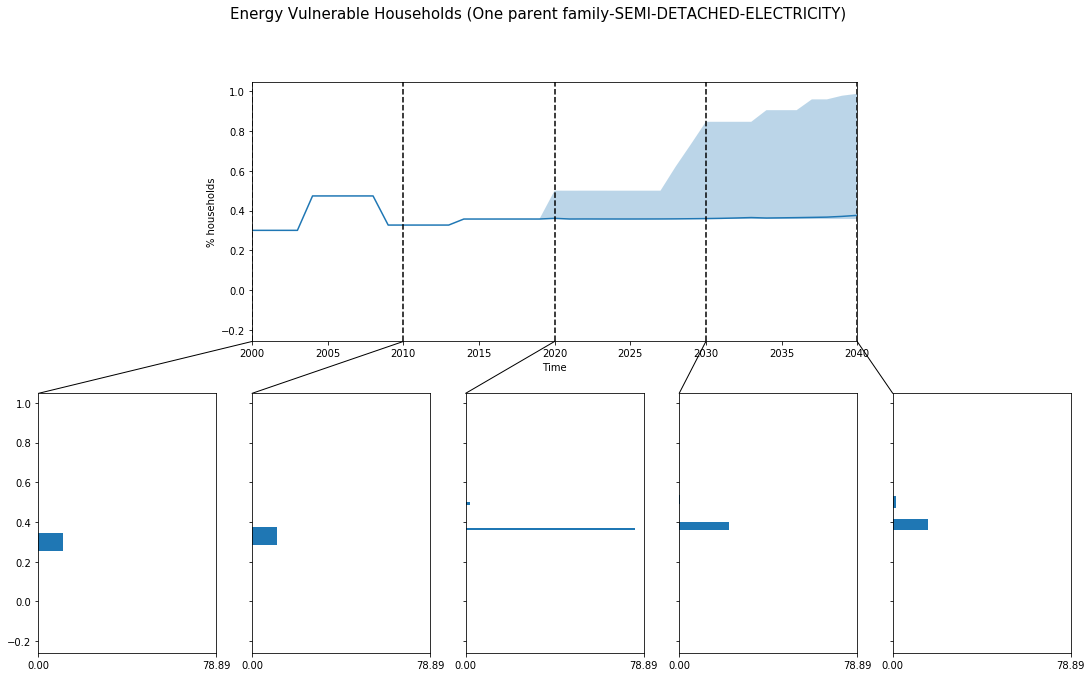

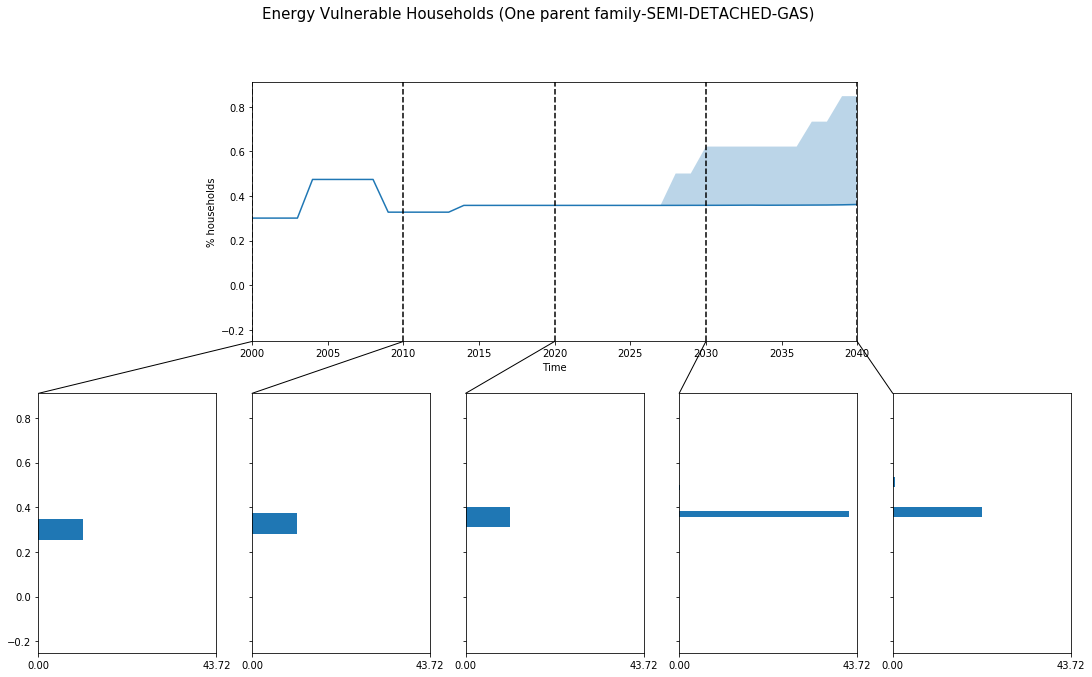

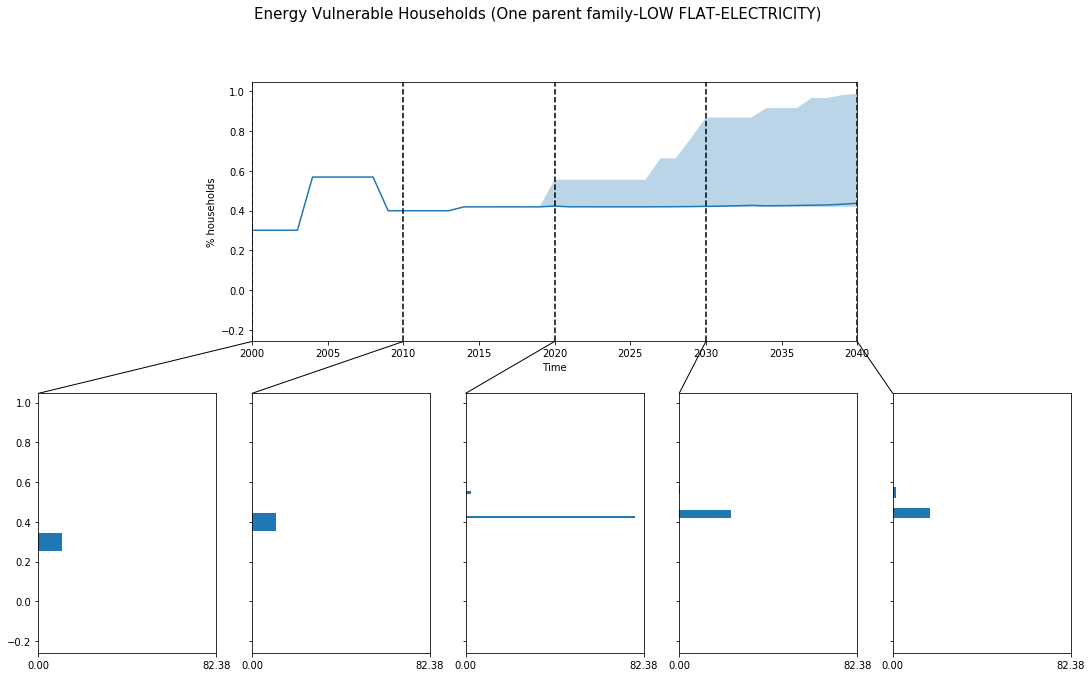

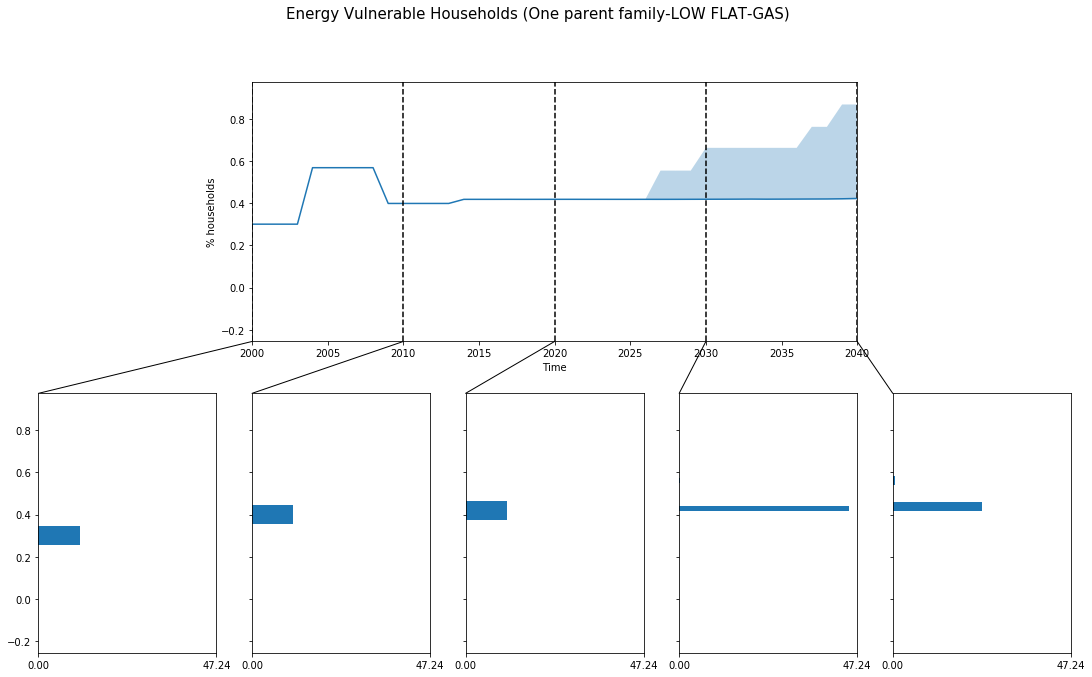

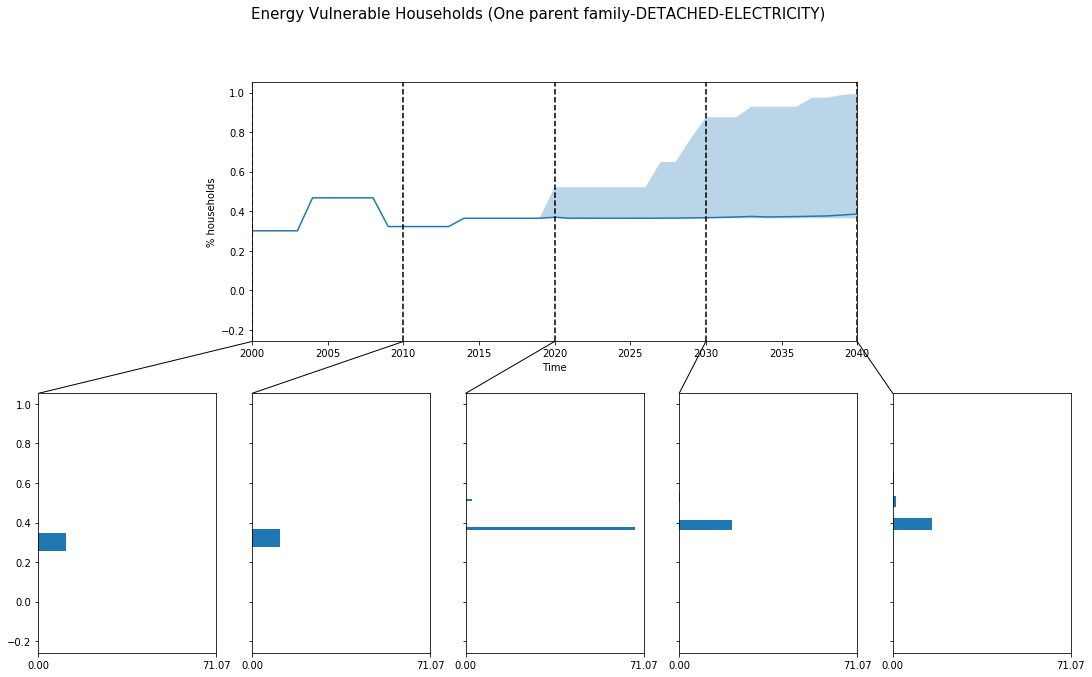

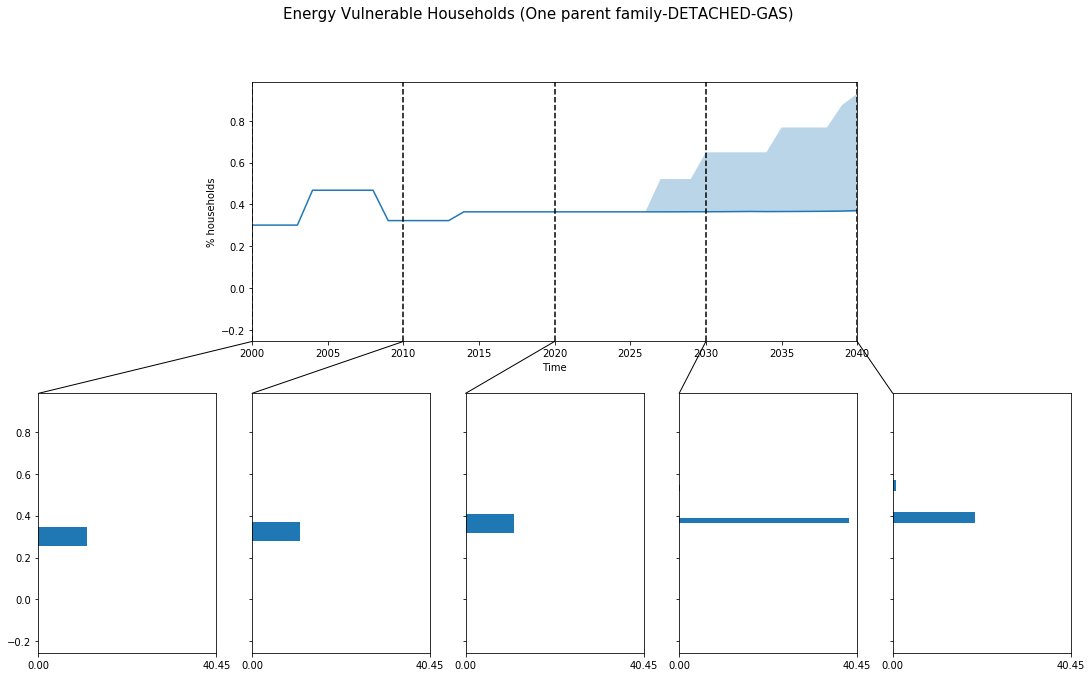

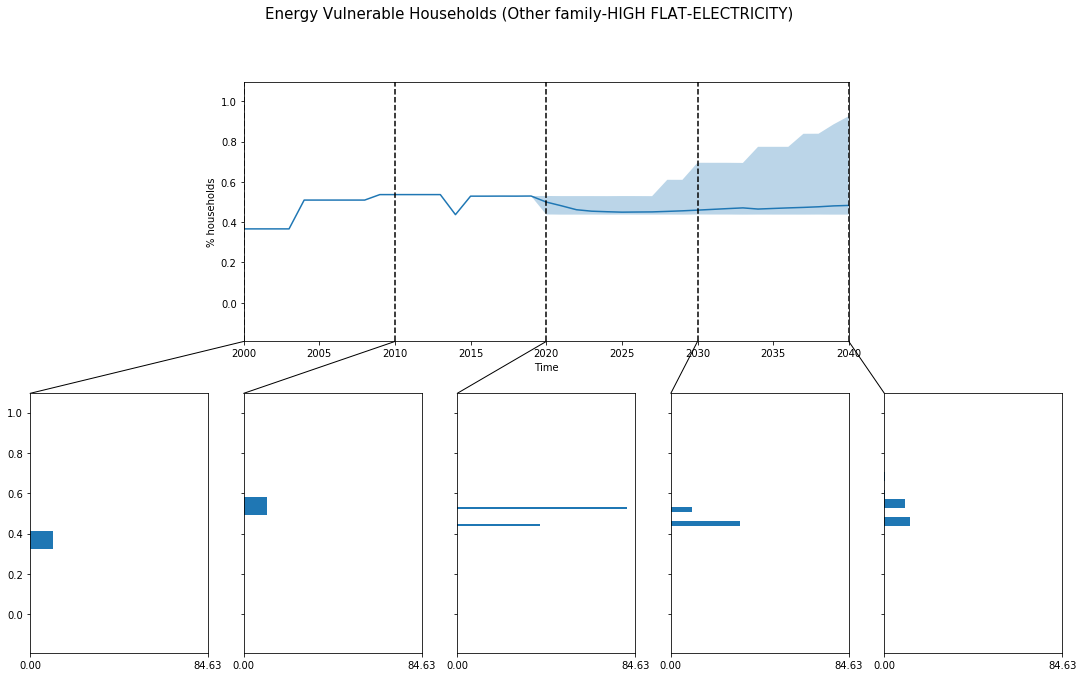

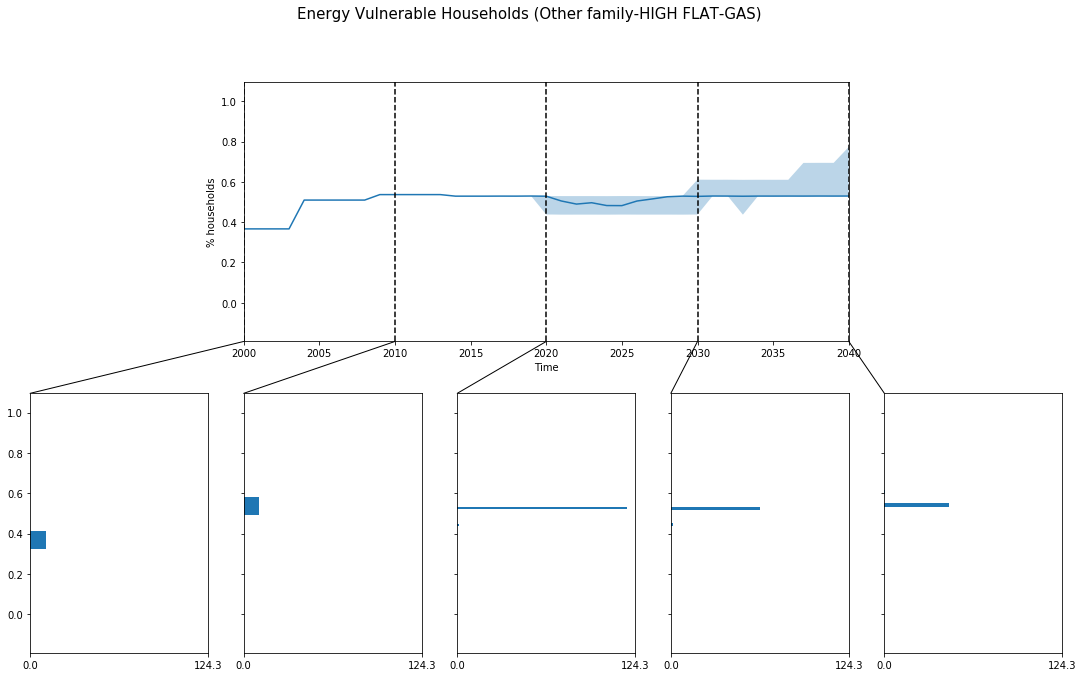

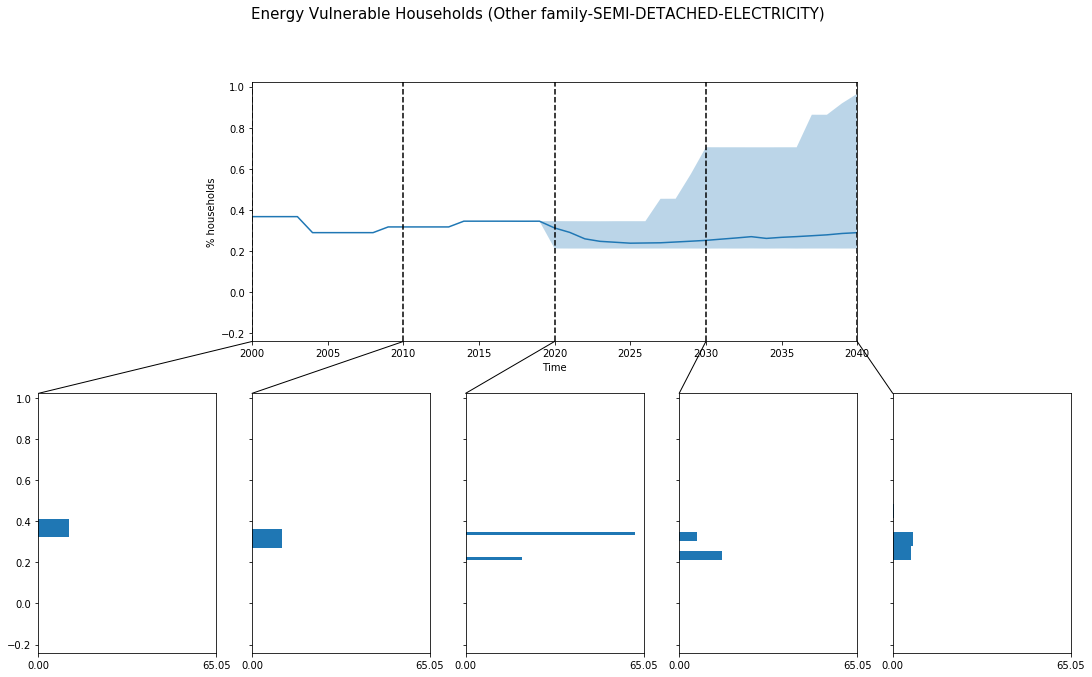

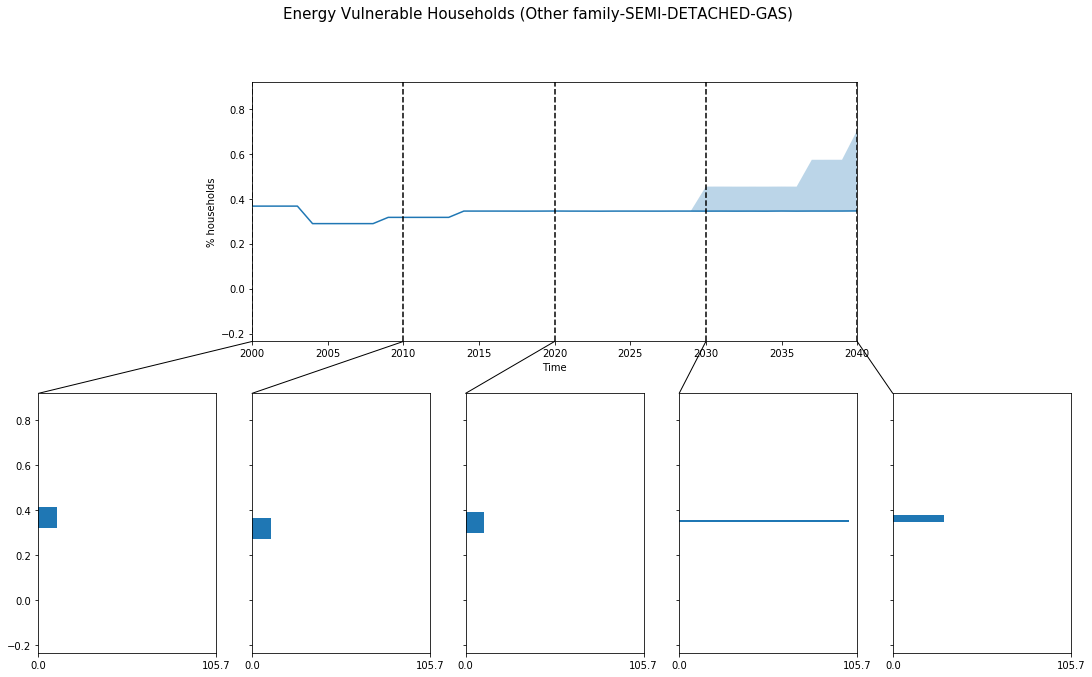

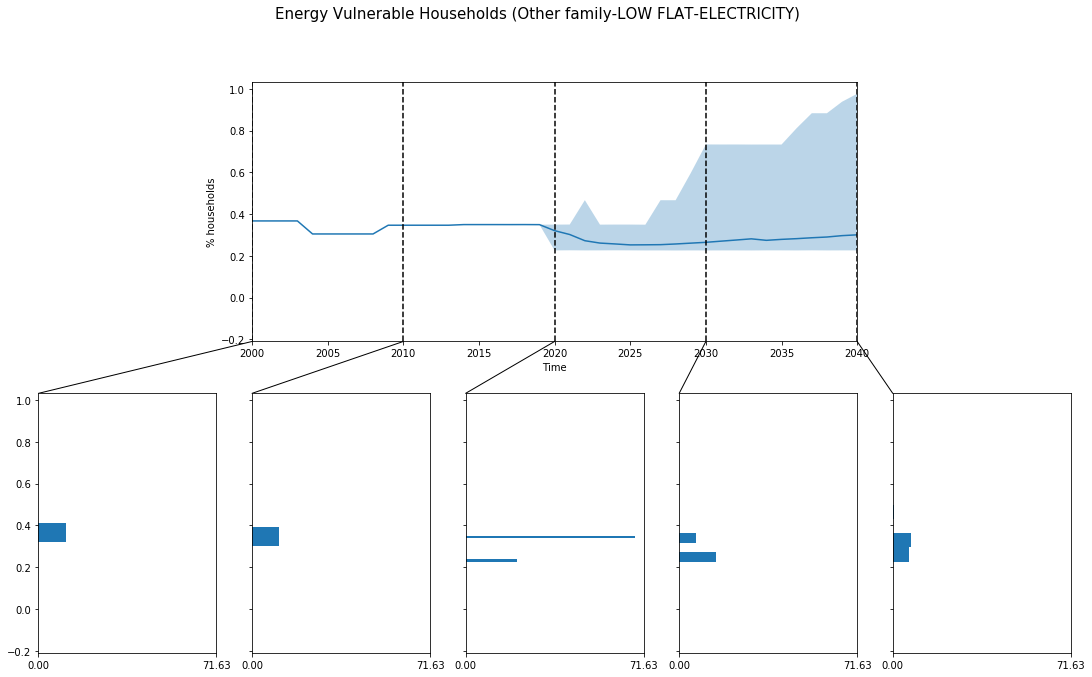

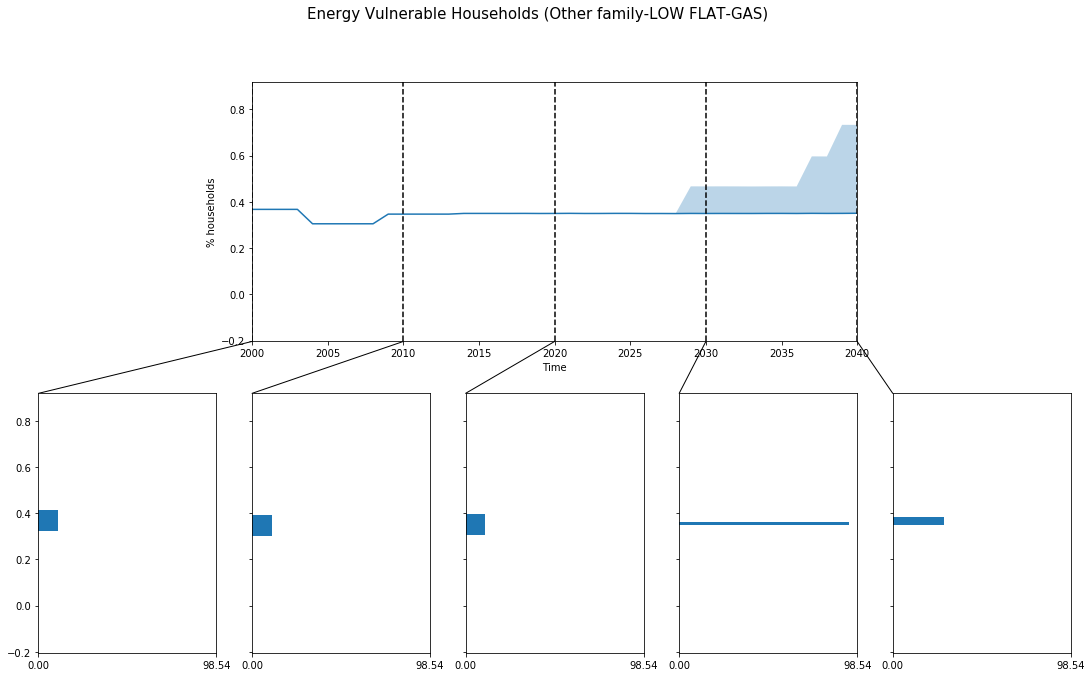

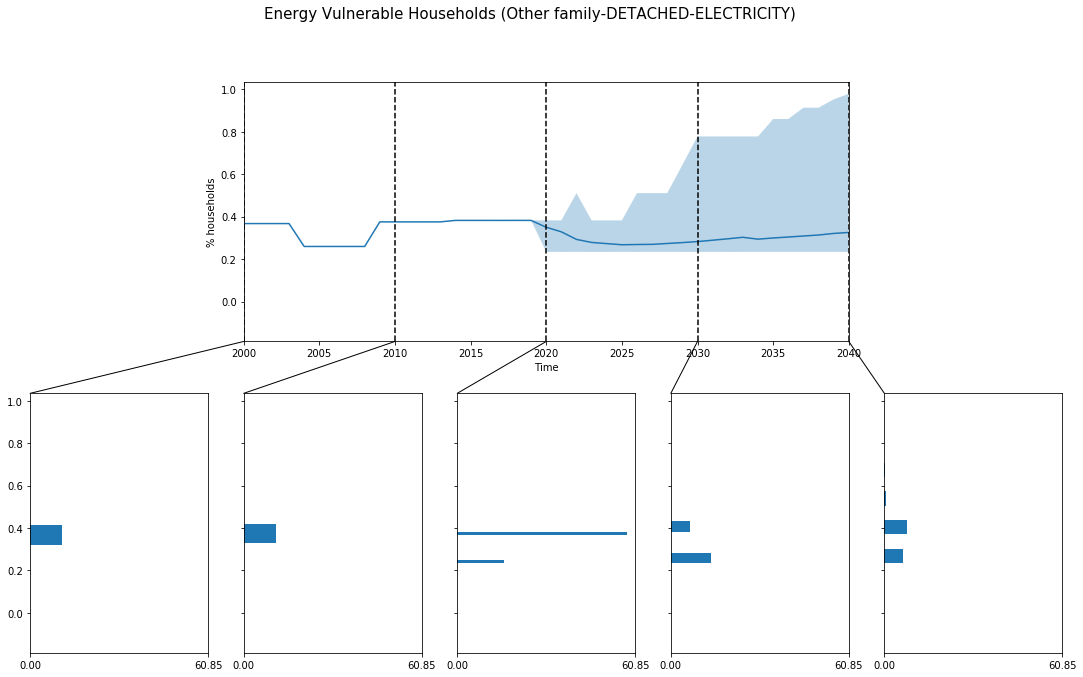

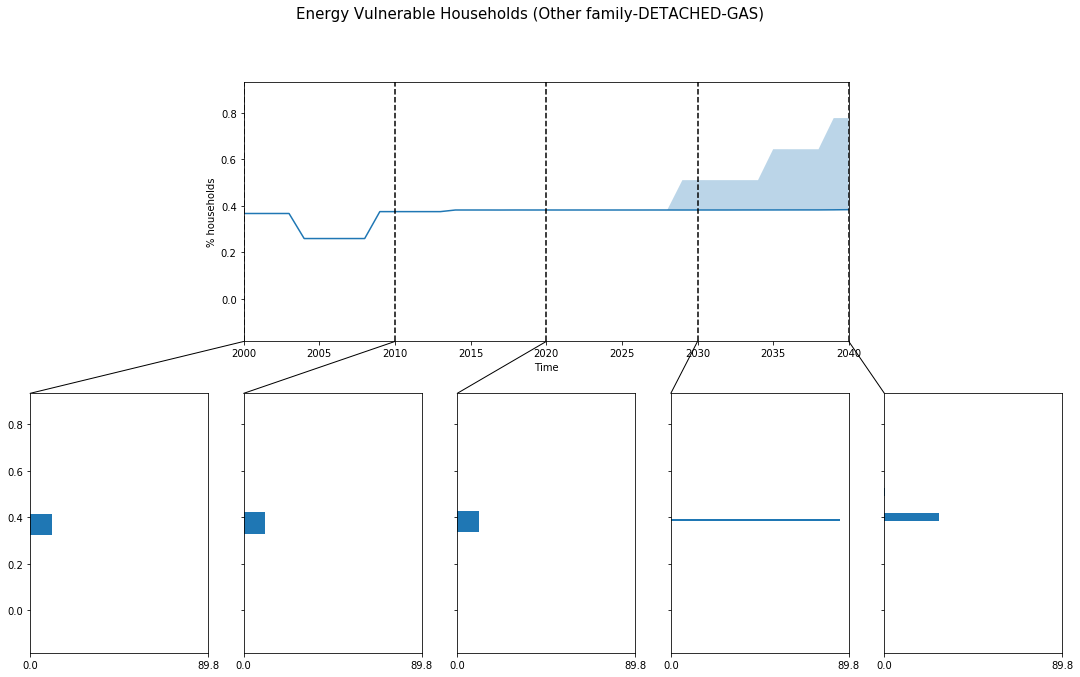

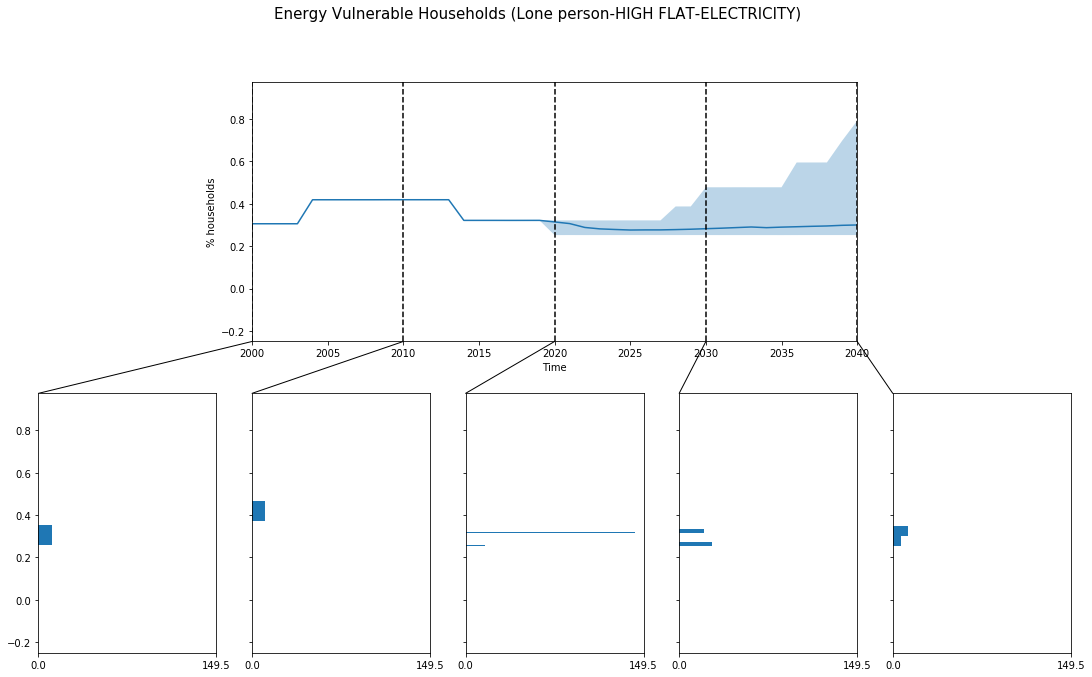

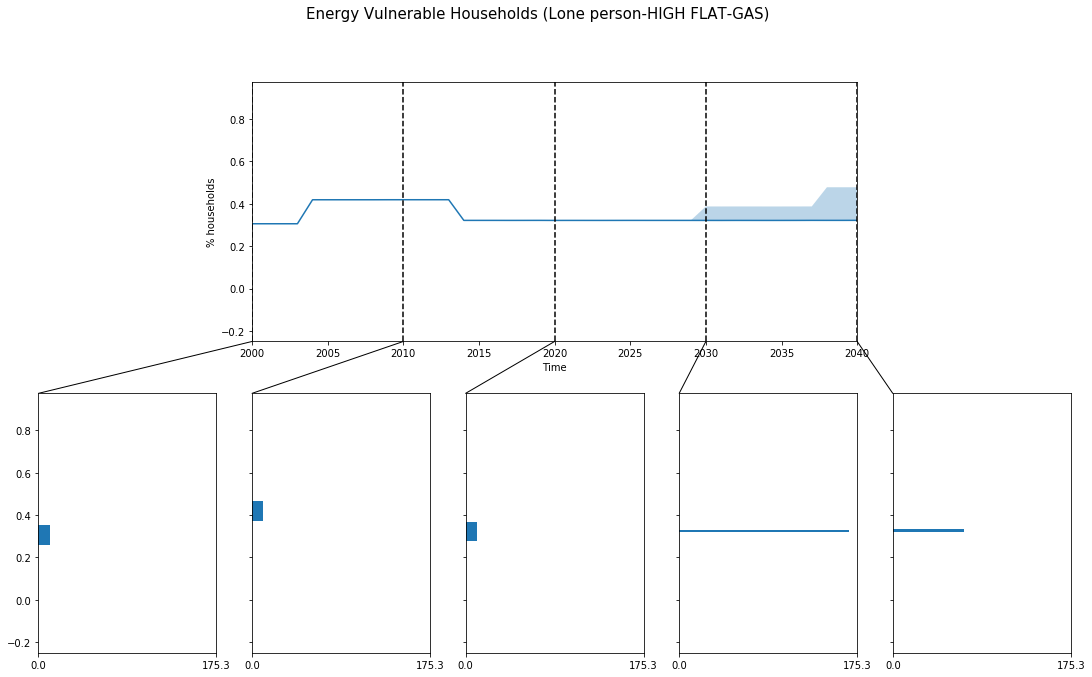

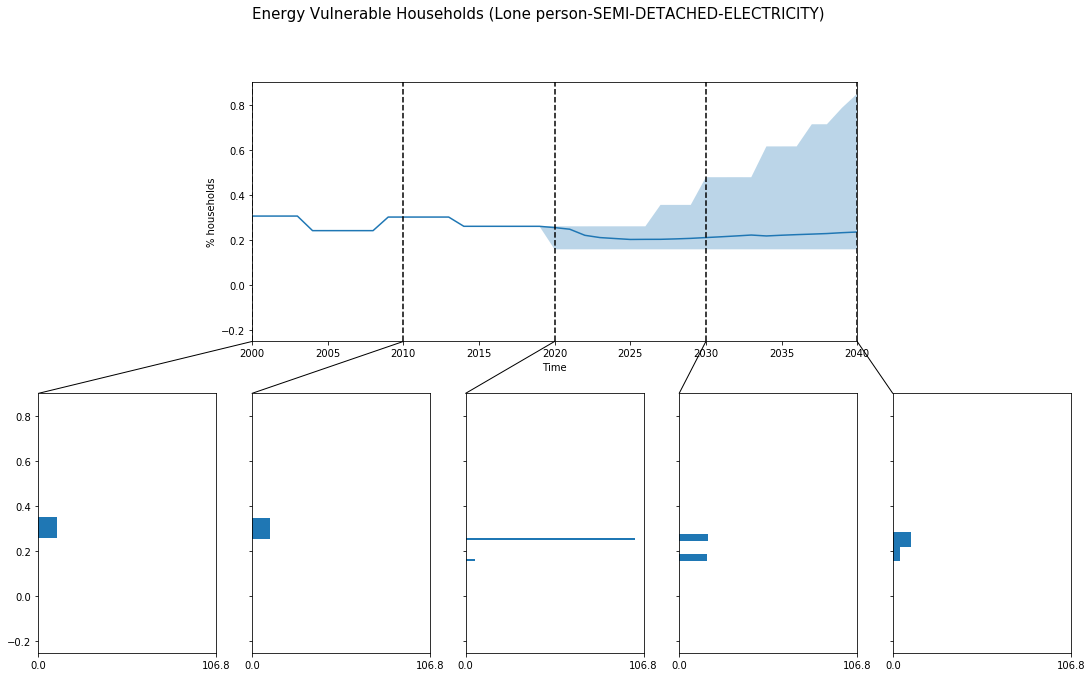

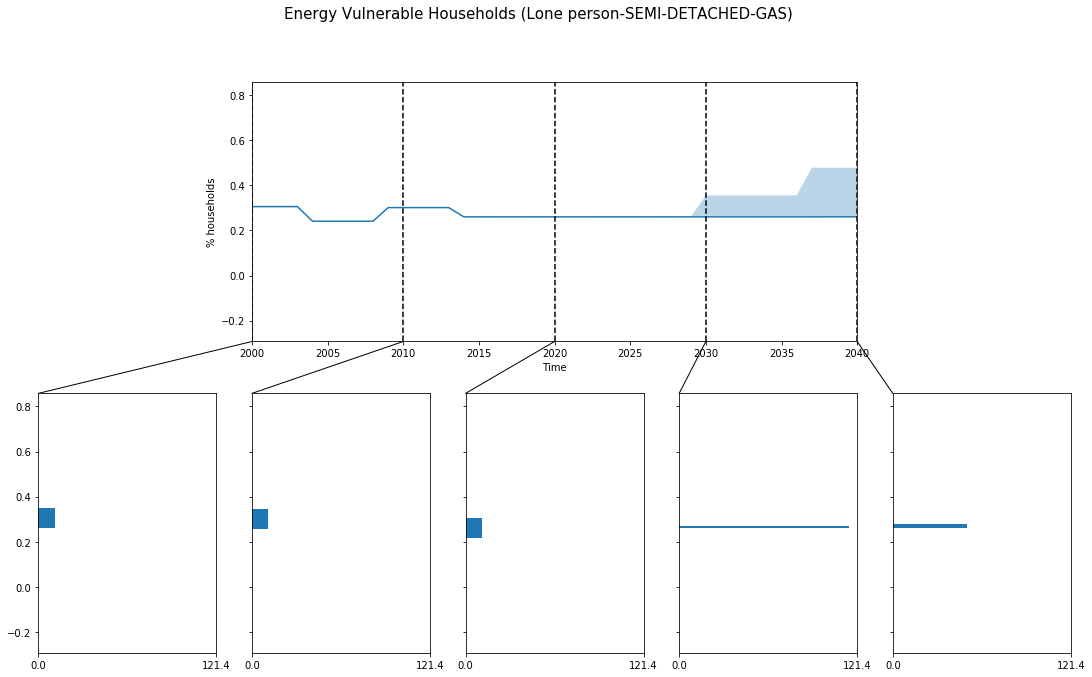

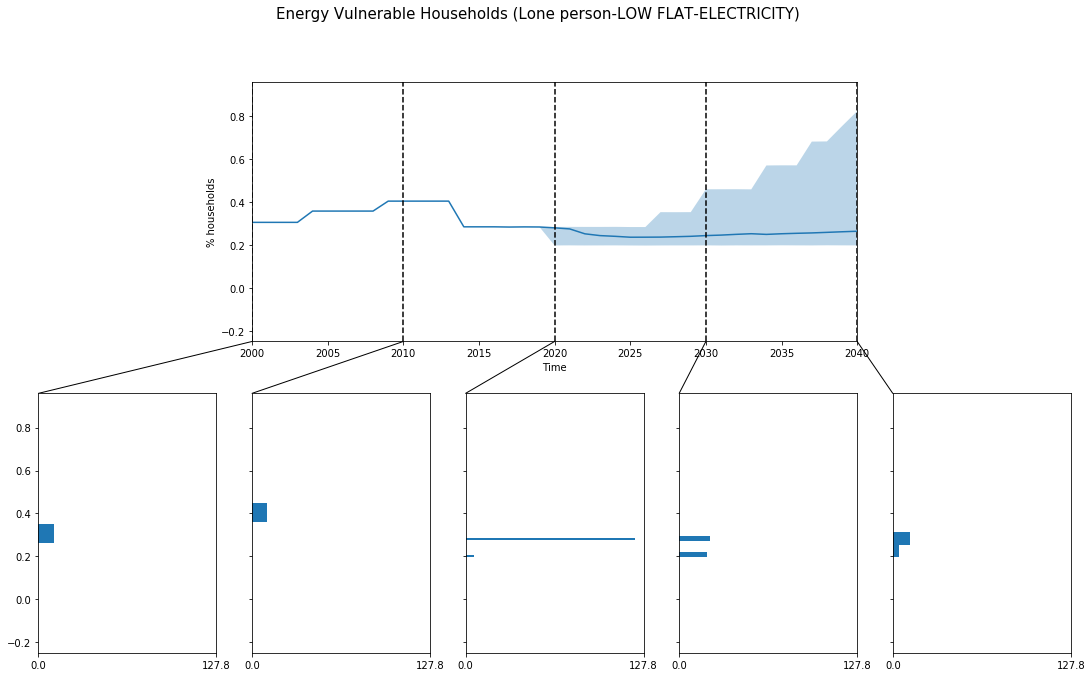

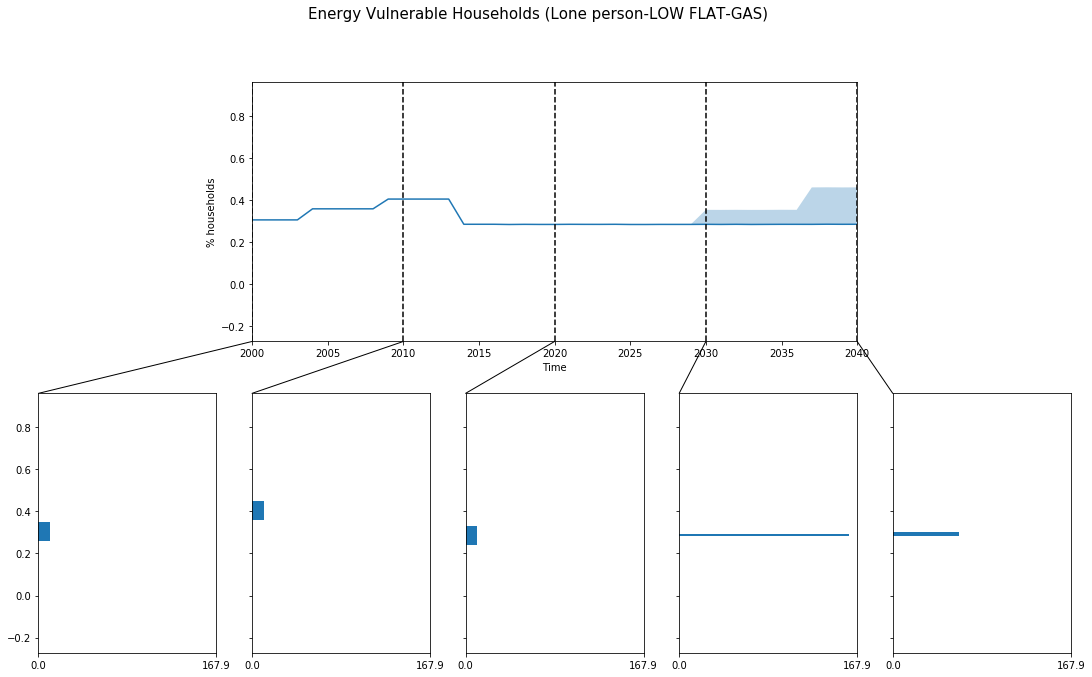

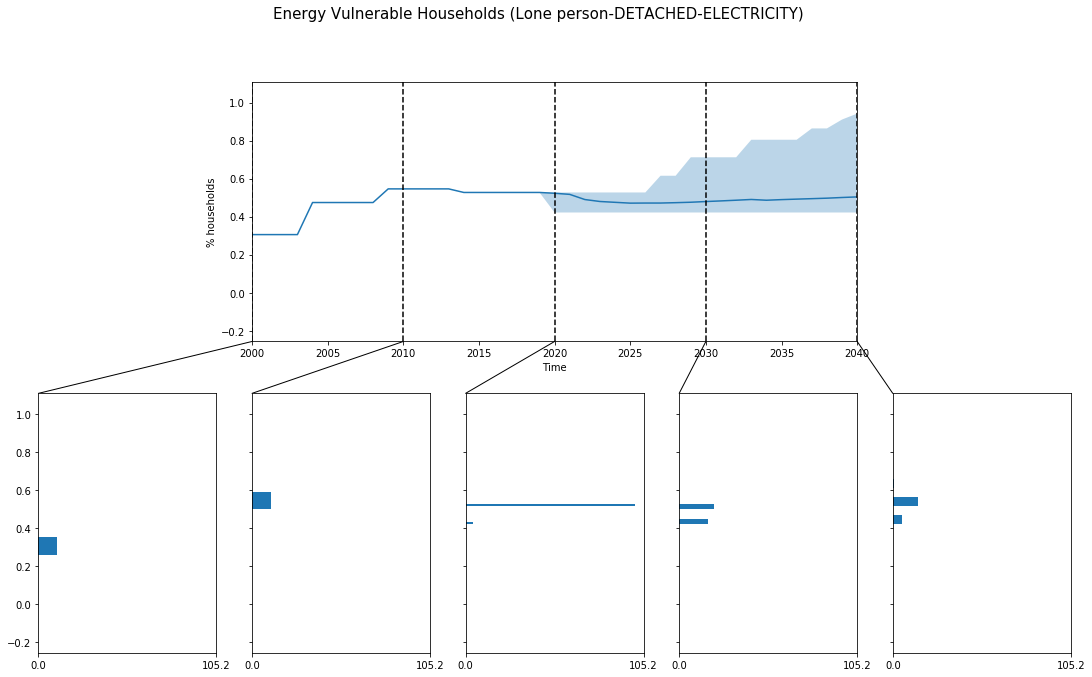

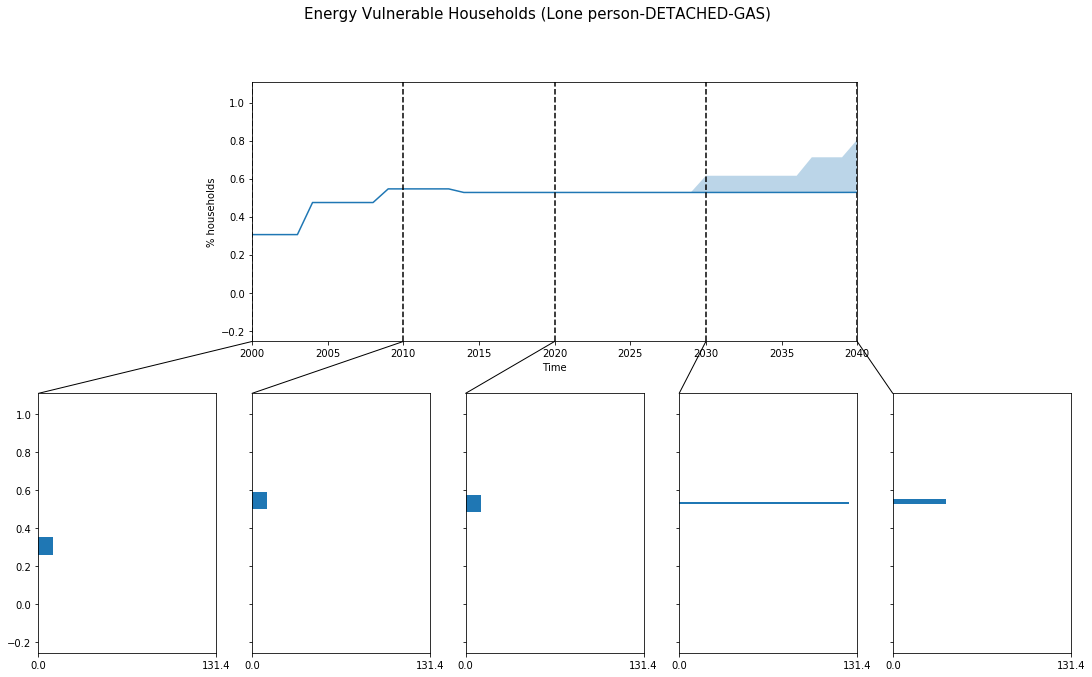

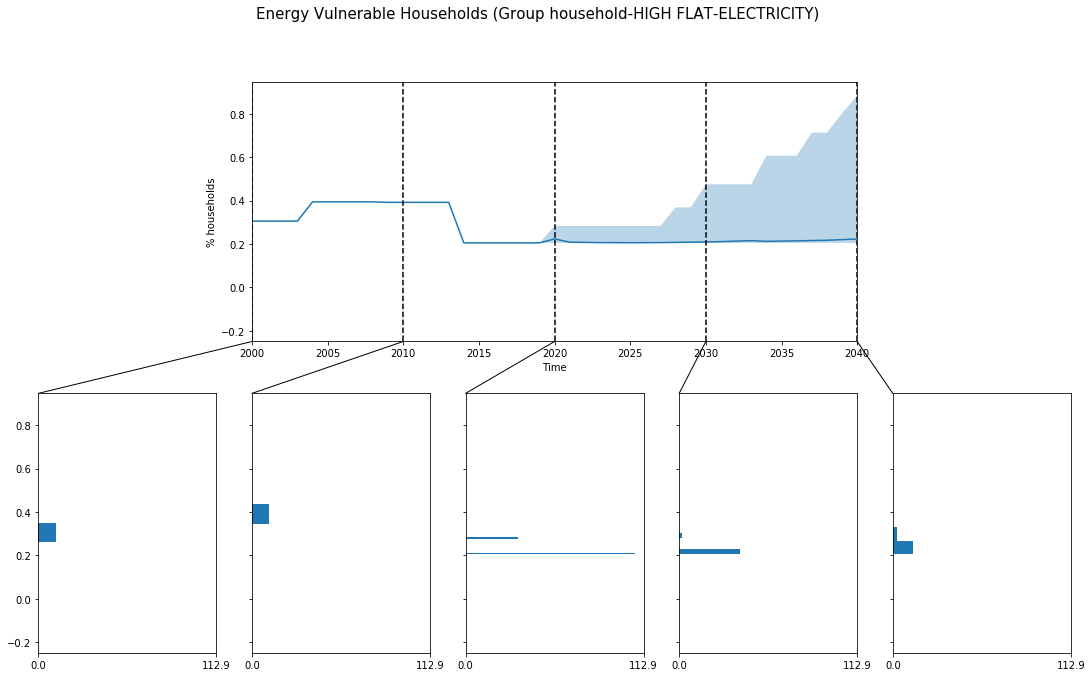

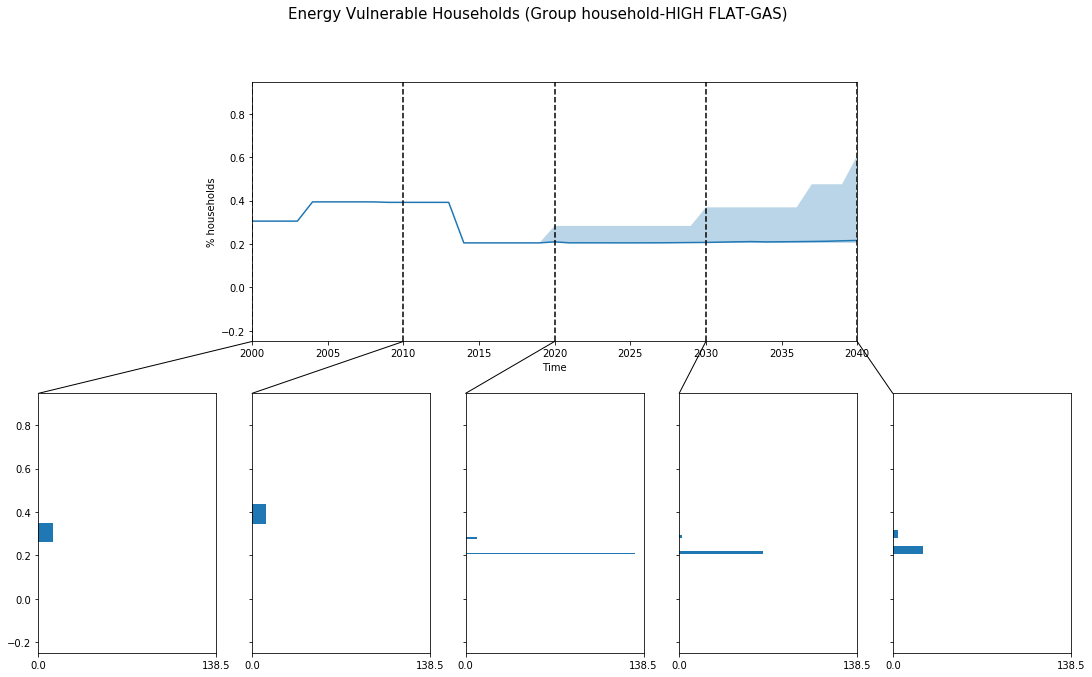

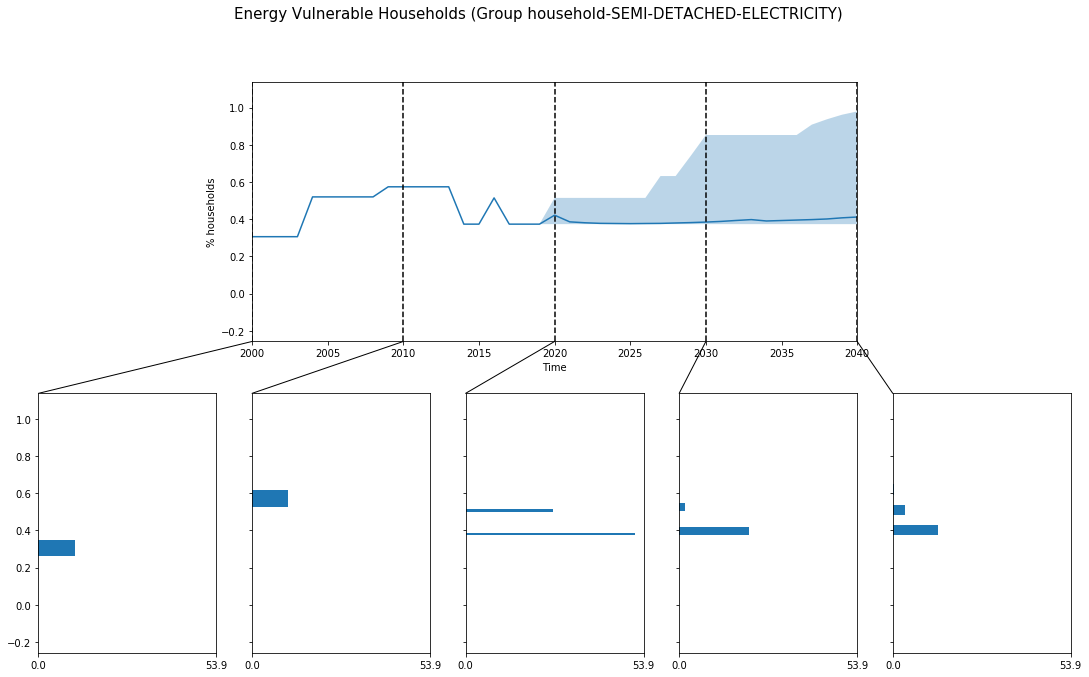

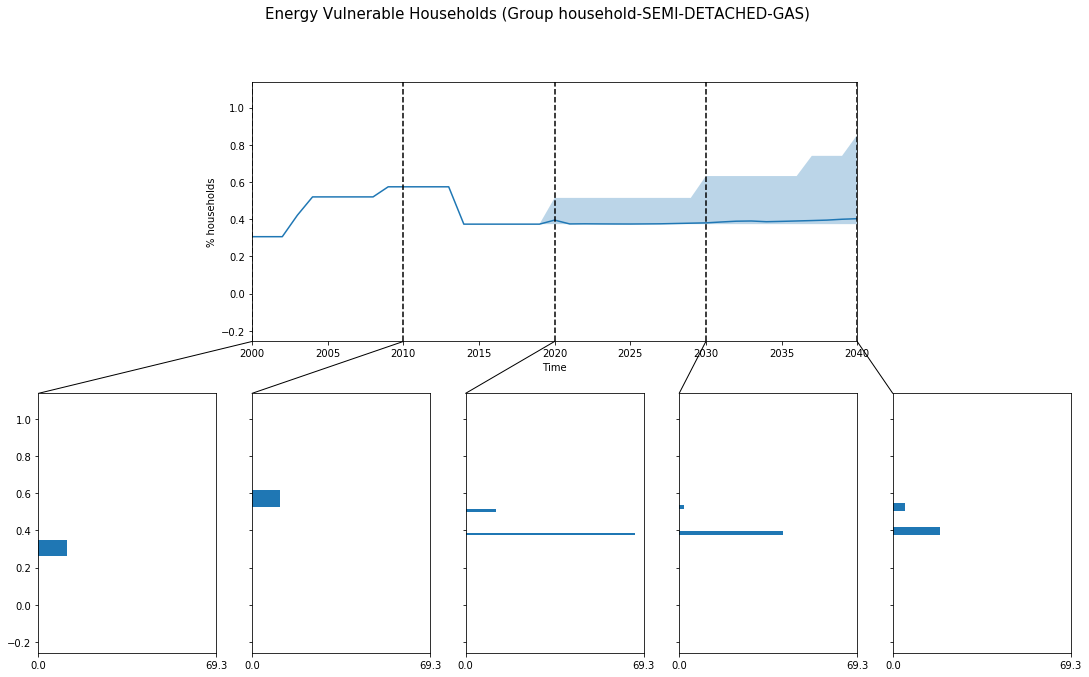

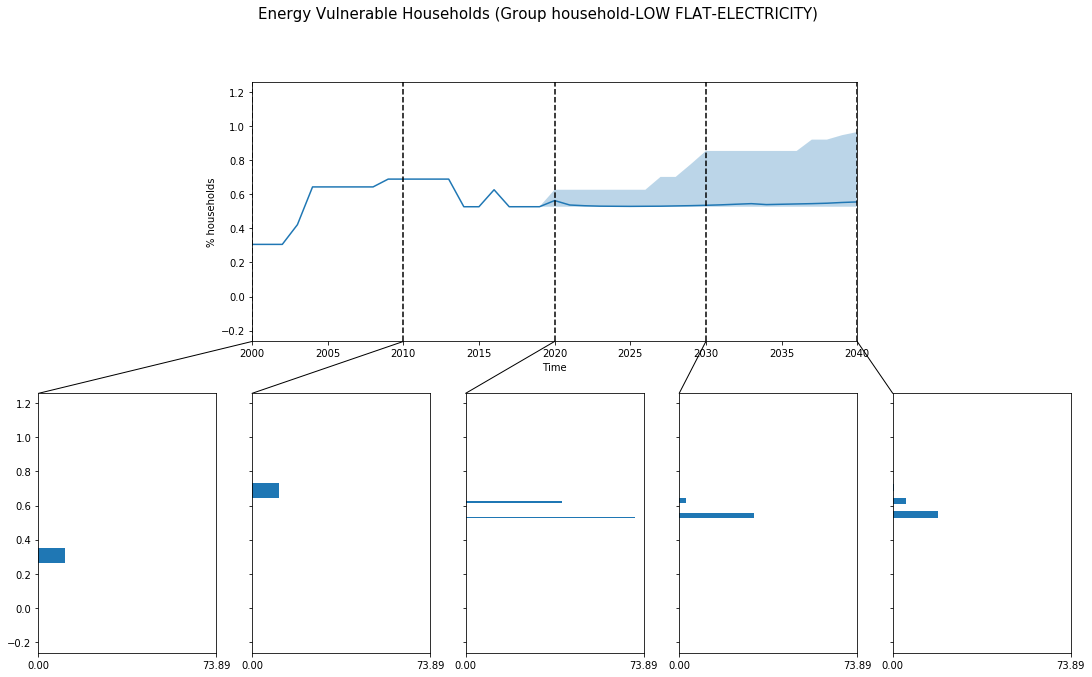

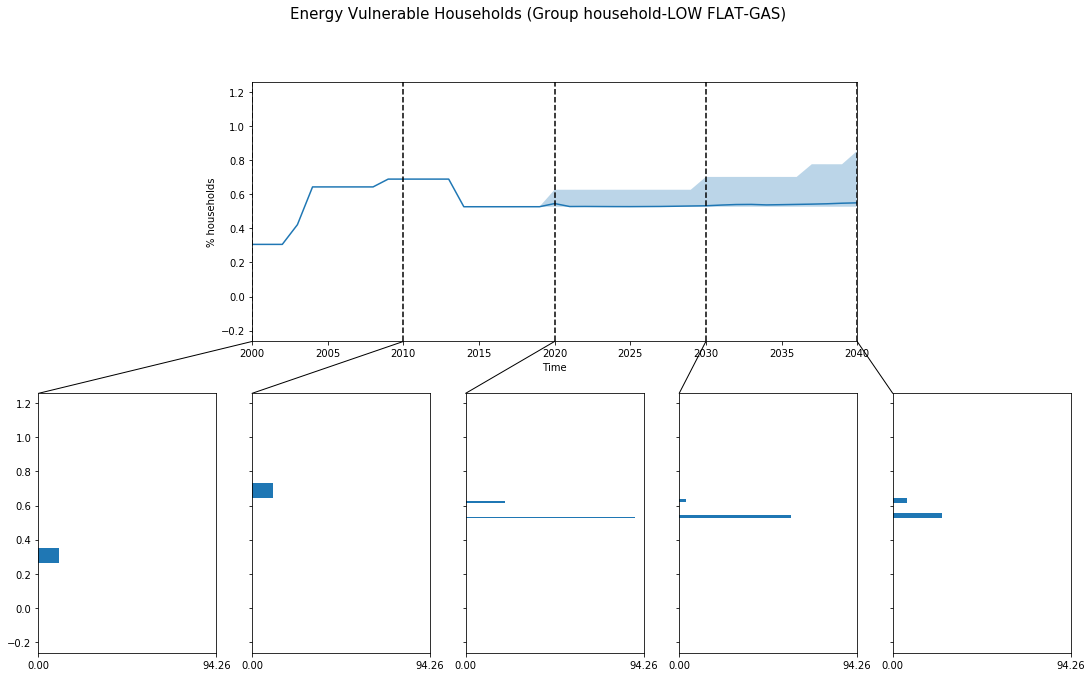

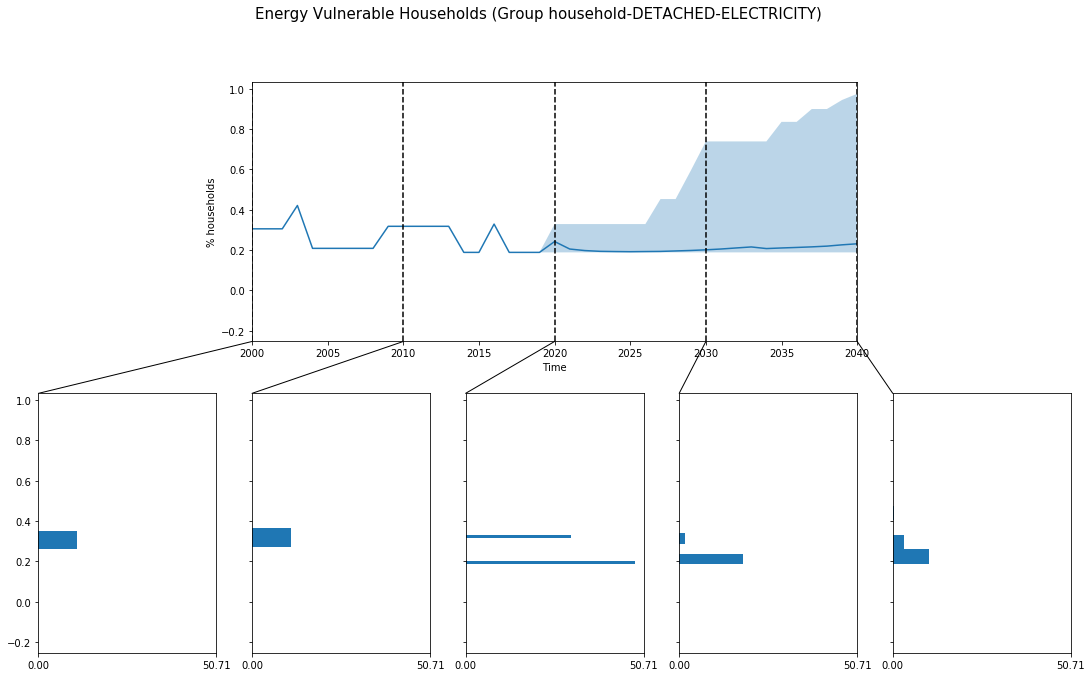

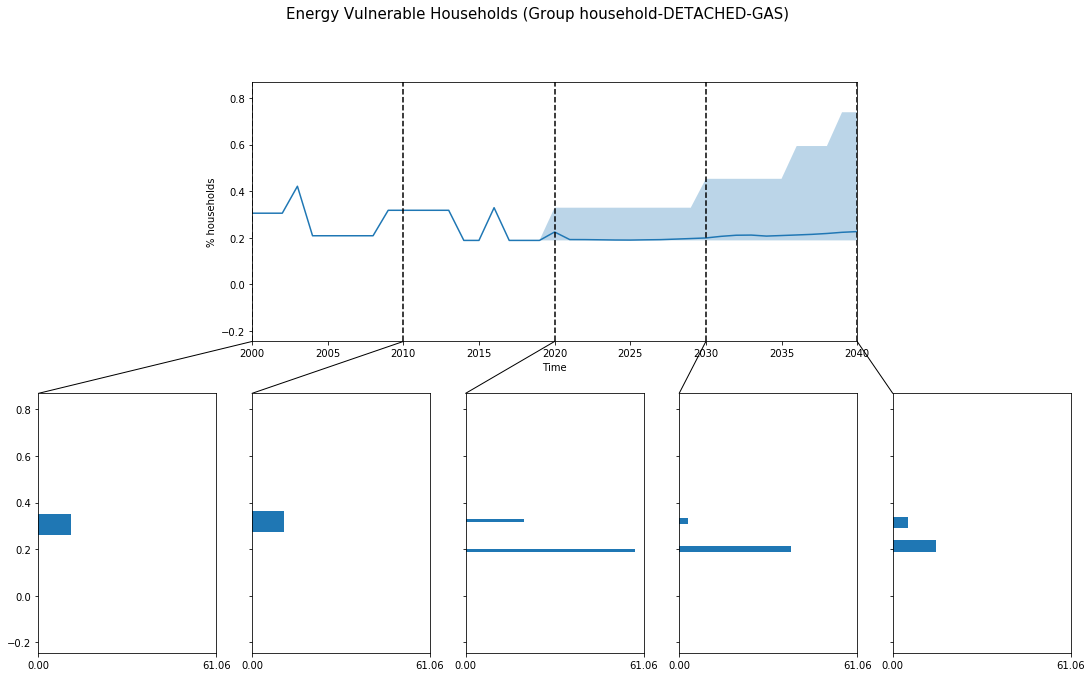

In [35]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density 
ooi = 'Energy Vulnerable Households'

outcomes_filtered[ooi] = energy_vulnerable_df_total.values

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest, 
                                 density = Density.HIST, grouping_specifiers=None , 
                                 titles={ooi}, ylabels={ooi: "% households"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(simulationYears[range(0,len(simulationYears),5)])

## Show labels
# labels = ax_env['F']['main plot'].get_xticklabels()
# for l in labels:
#     print (l.get_text)


fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

for o,d,f in profiles:
    ooi = 'Energy Vulnerable Households ({}-{}-{})'.format(o,d,f)
    outcomes_filtered[ooi] = energy_vulnerable_df[(o,d,f)].values
    #print("('{}','{}','{}')".format(o,d,f))
    
    fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                     points_in_time=points_of_interest, 
                                     density = Density.HIST, grouping_specifiers=None , 
                                     titles={ooi}, ylabels={ooi: "% households"}, legend=True,
                                     fill=True, plot_type=PlotType.ENVELOPE)

    #Change x labels to years
    ax_env[ooi]['main plot'].set_xticklabels(simulationYears[range(0,len(simulationYears),5)])

    ## Show labels
    # labels = ax_env['F']['main plot'].get_xticklabels()
    # for l in labels:
    #     print (l.get_text)
    

    fig[0].suptitle("{}".format(ooi), fontsize=15)
    fig[0].set_size_inches(18.5, 10.5)
    

## Heatmap Energy Vulnerability per dwelling and household types

In [36]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
#%matplotlib inline

def plot_heatmap( data, title ):
    fig_dims = (9, 6)
    fig, ax = plt.subplots(figsize=fig_dims)
    ax.set_title(title)
    
    Index= occupancy_types
    Cols = dwelling_types
    df = DataFrame(data, index=Index, columns=Cols)

    sns.heatmap(df, annot=True, ax =ax)

    # https://github.com/matplotlib/matplotlib/issues/14751
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!


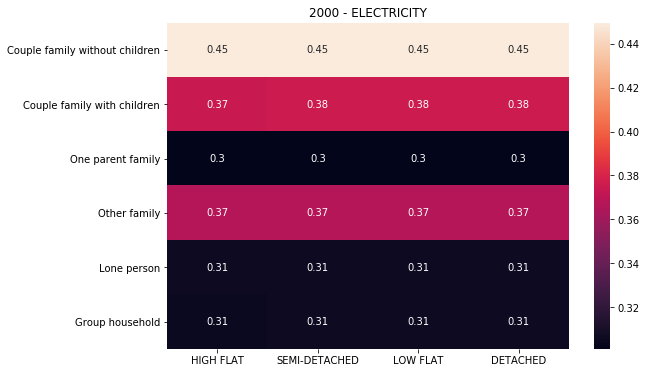

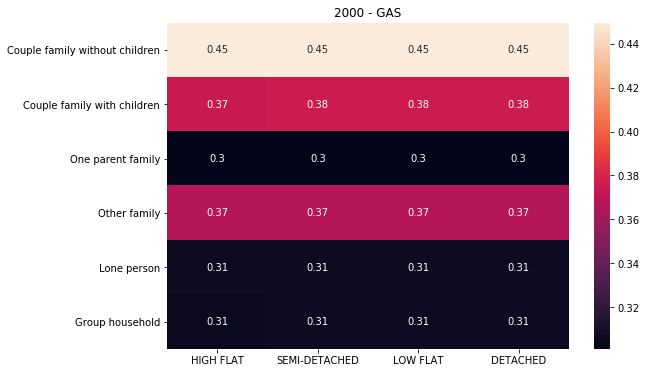

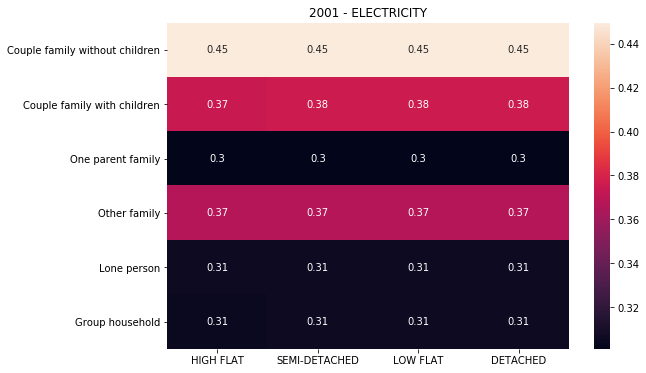

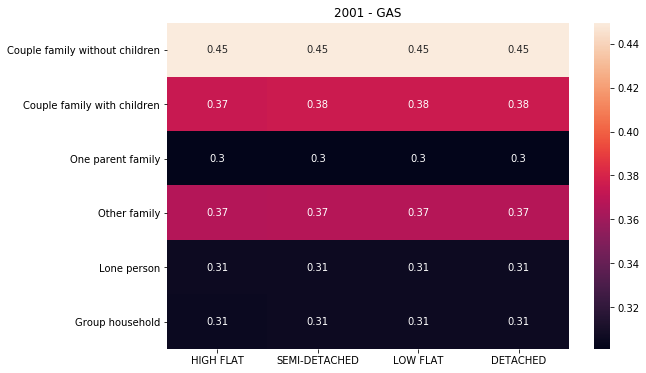

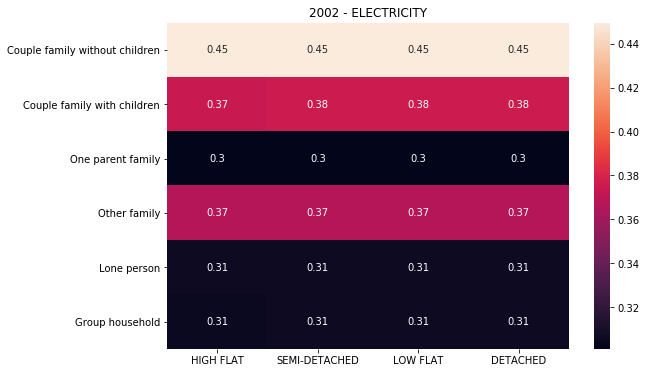

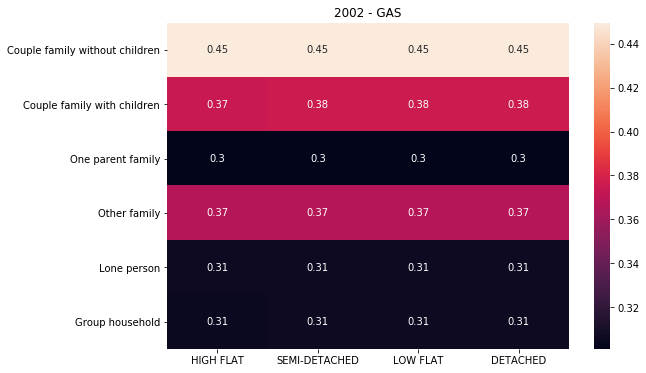

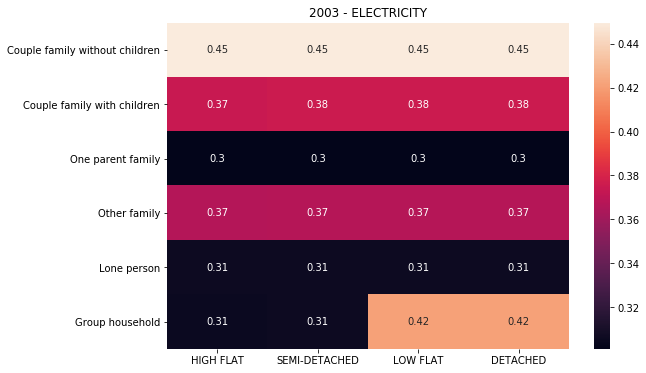

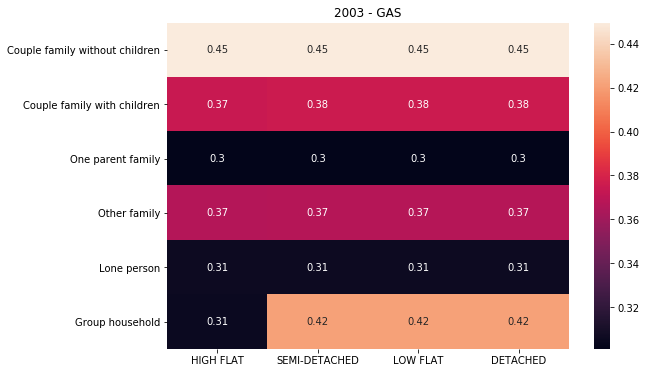

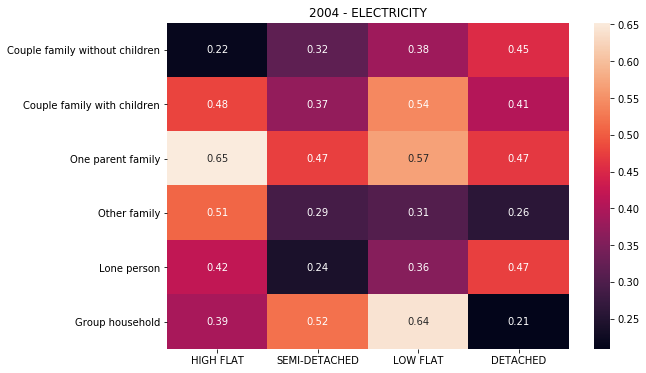

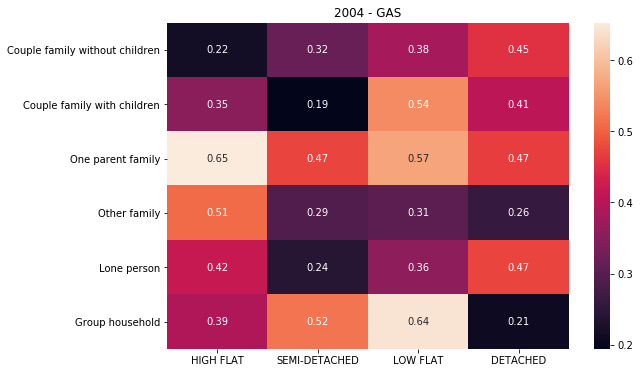

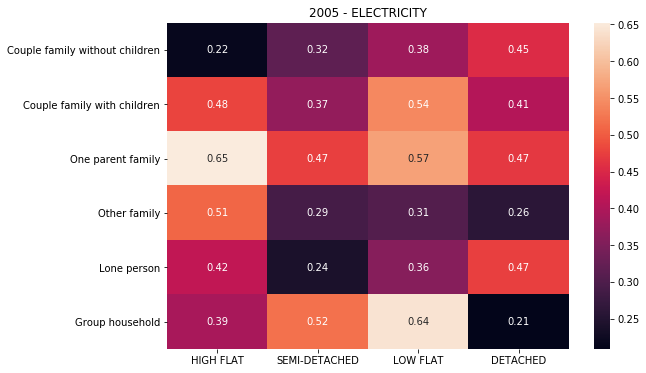

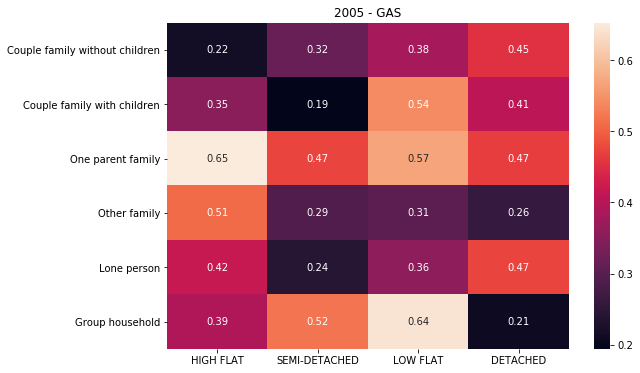

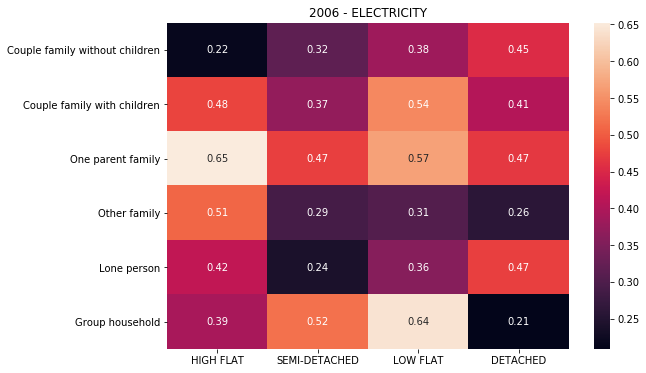

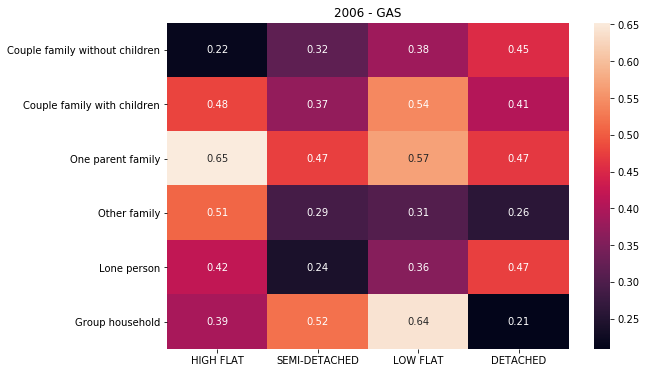

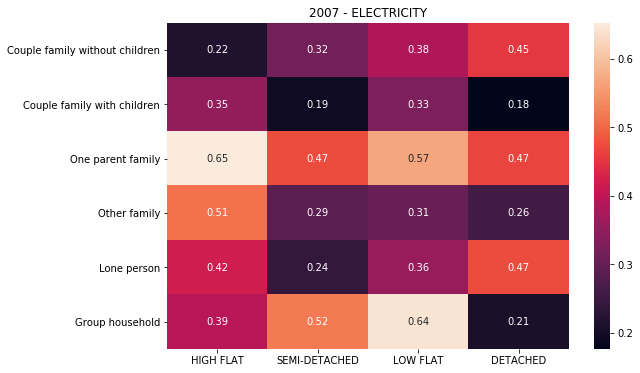

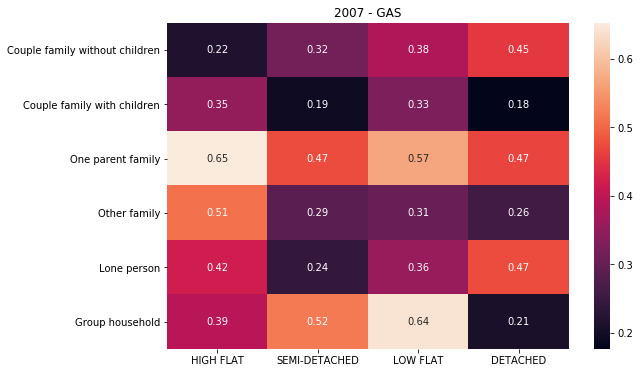

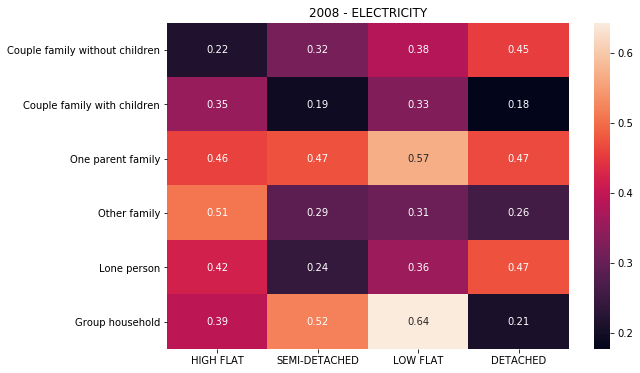

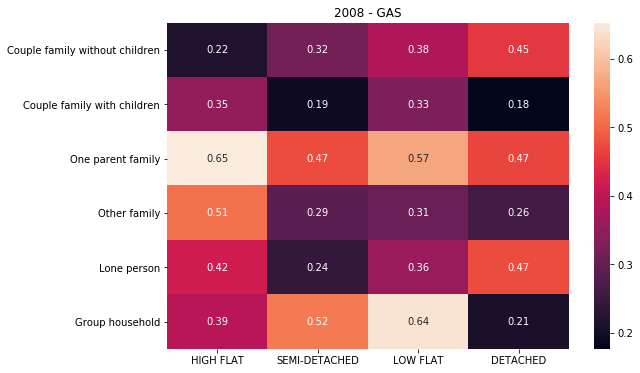

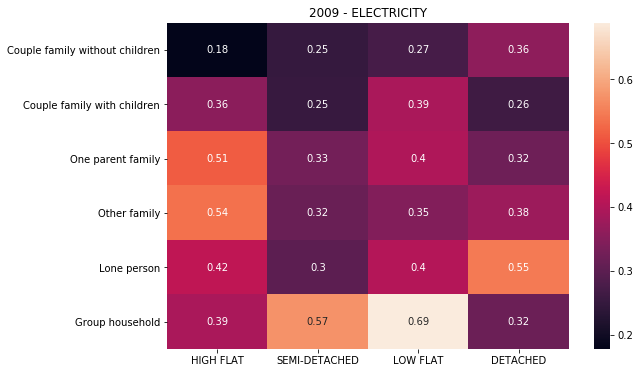

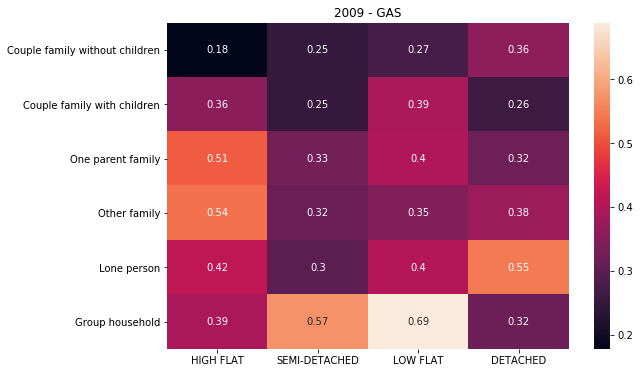

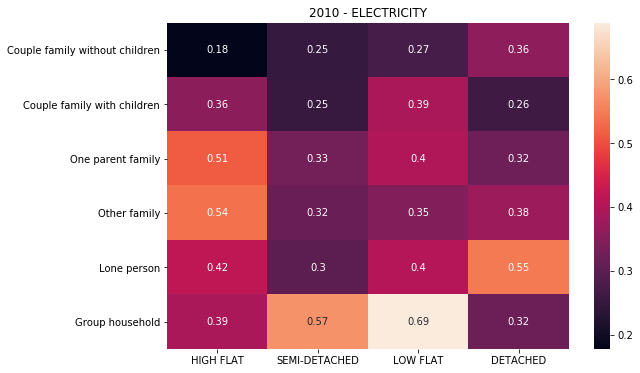

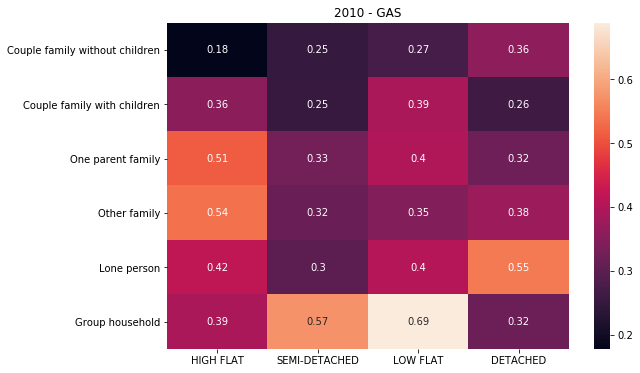

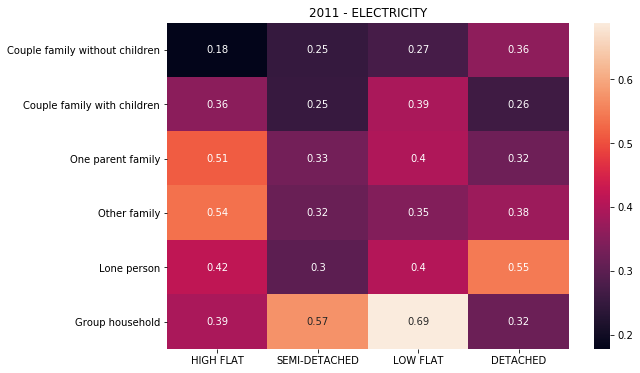

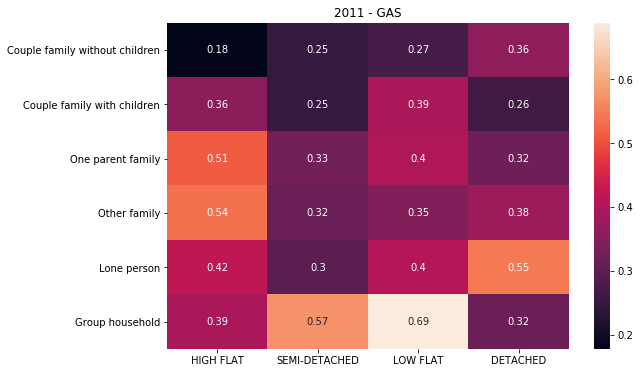

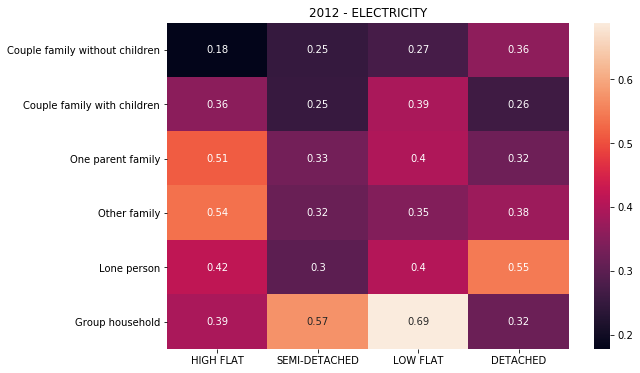

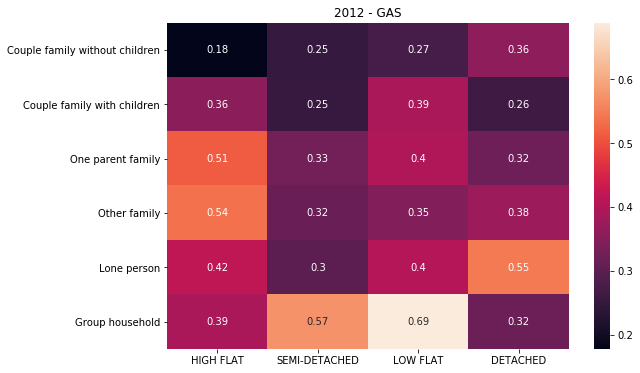

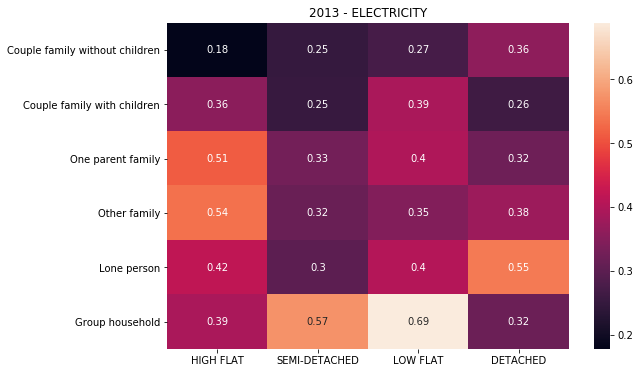

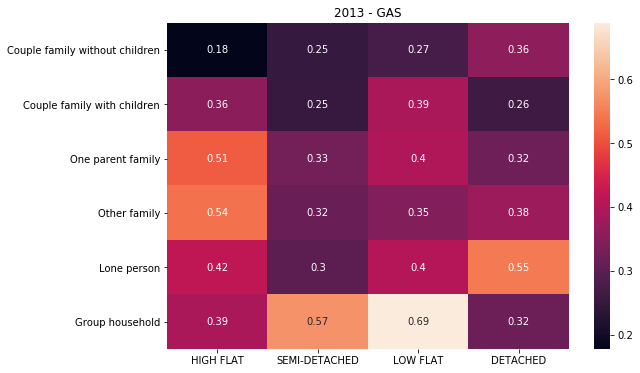

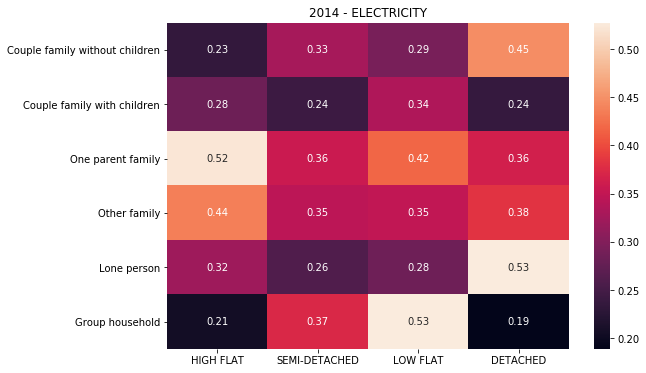

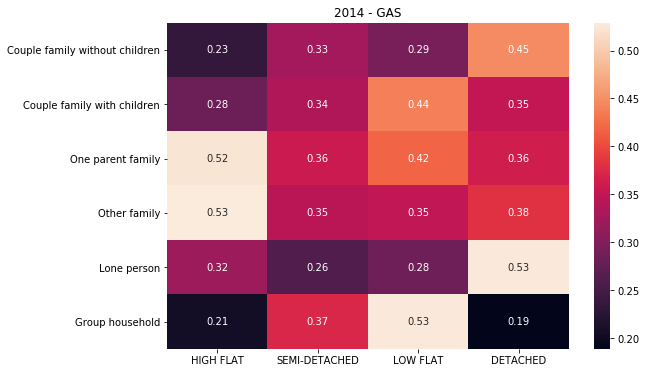

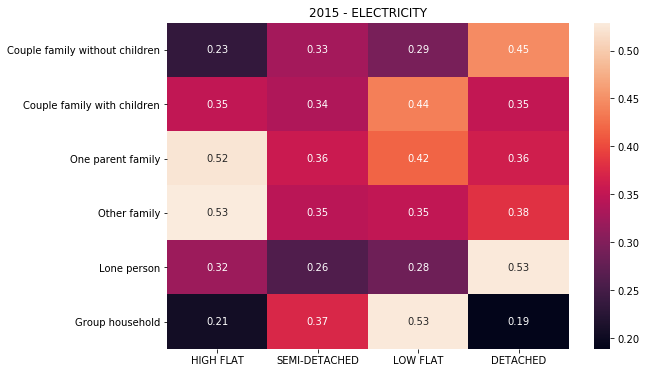

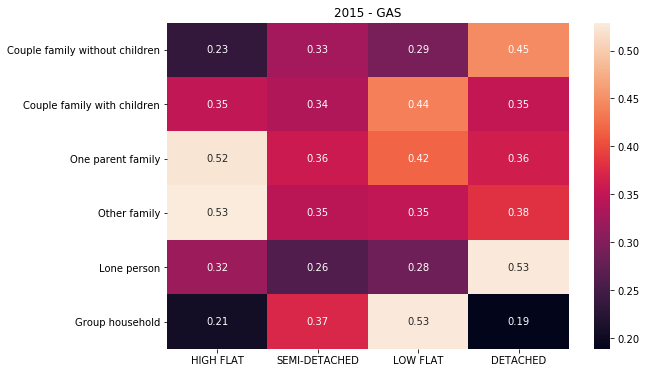

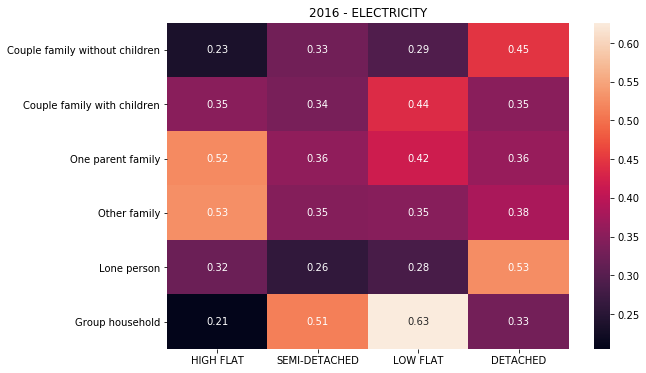

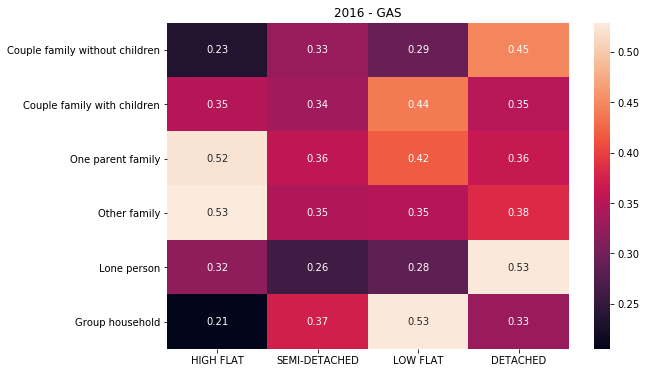

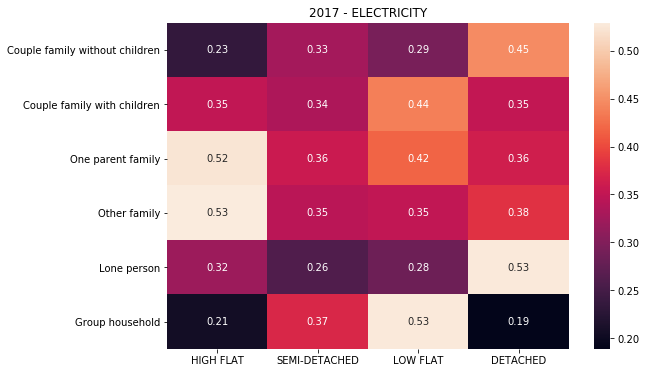

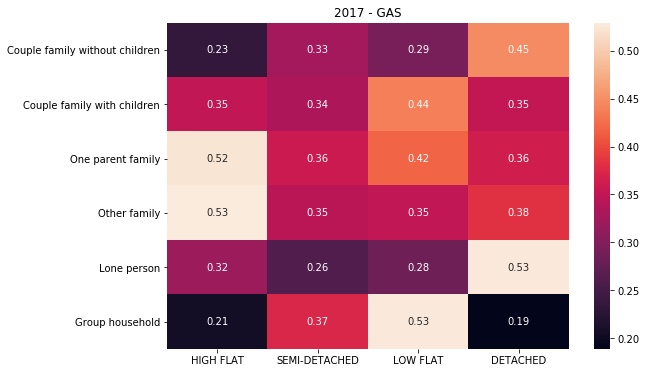

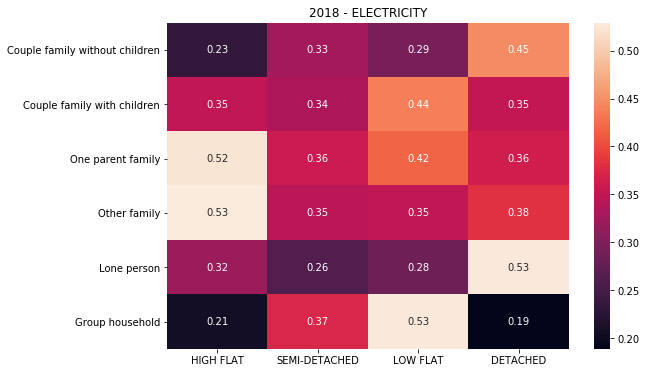

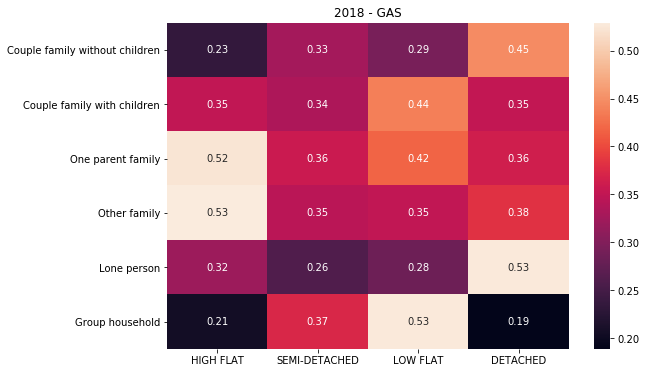

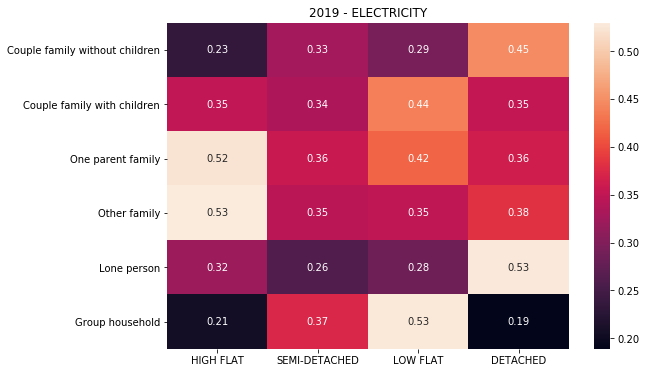

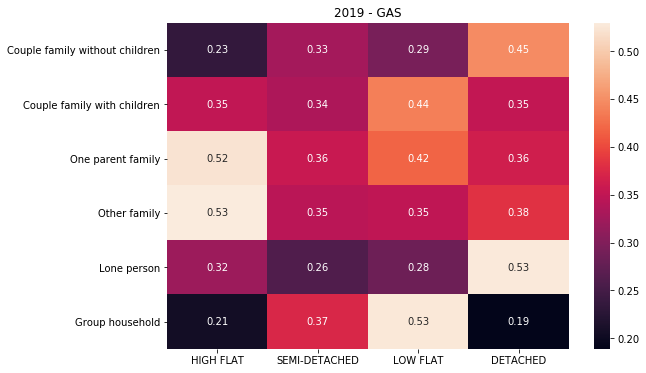

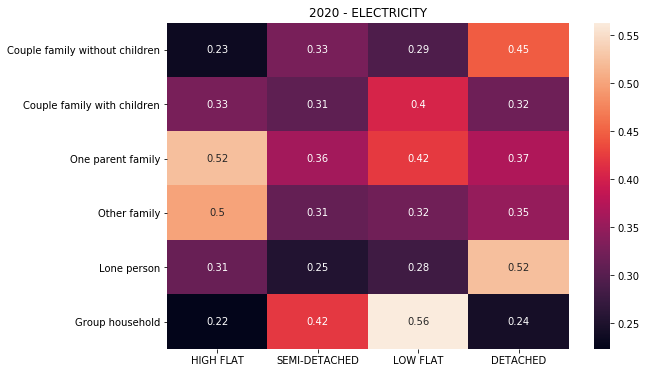

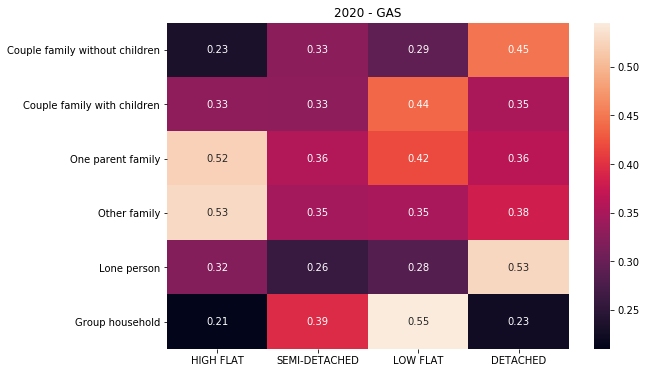

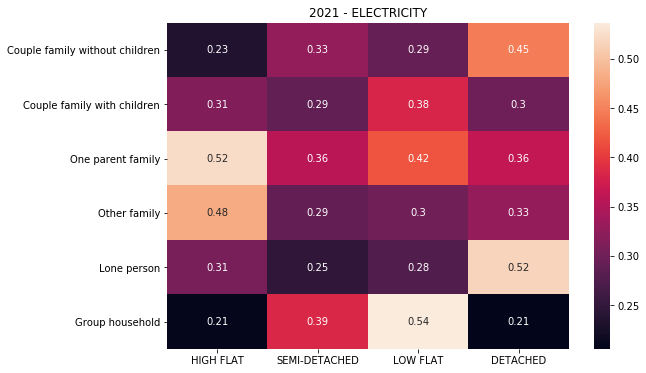

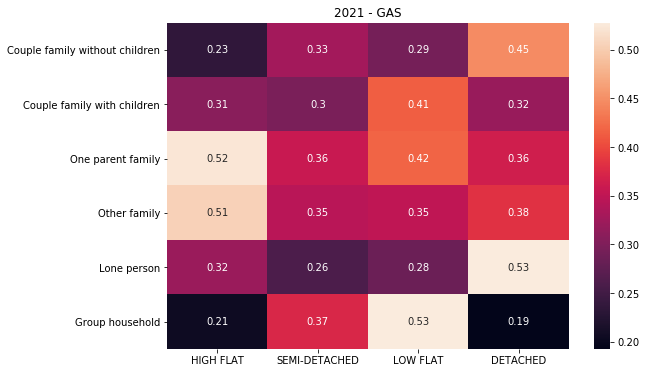

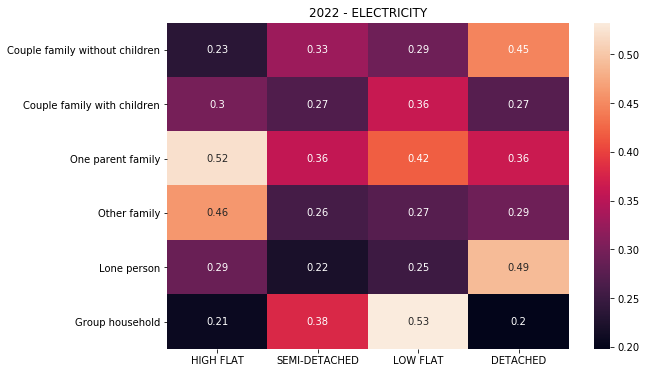

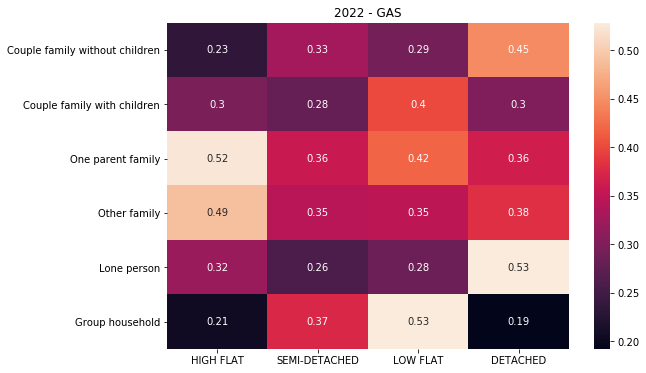

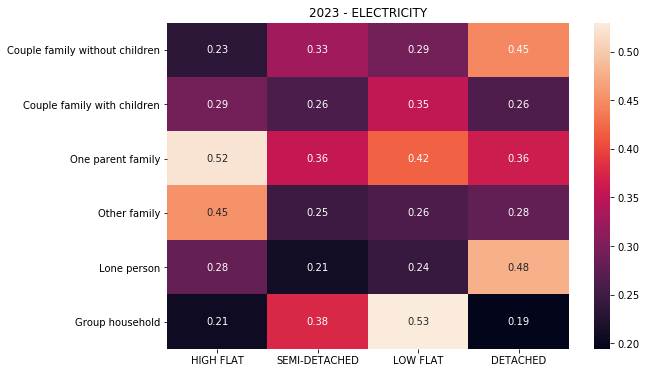

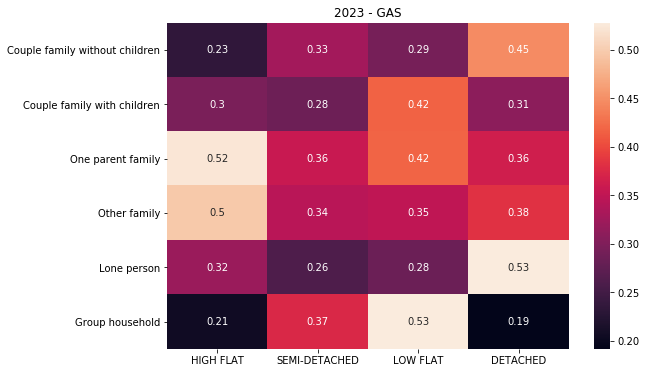

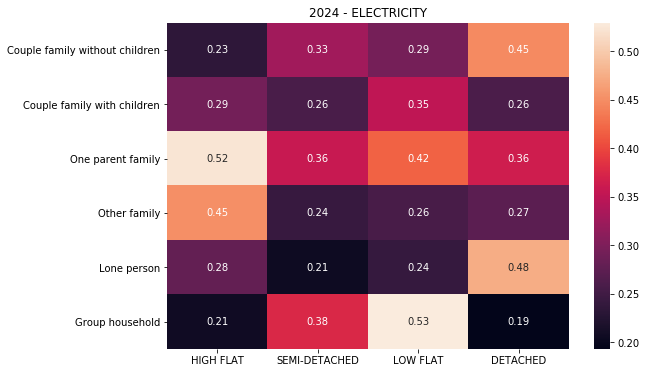

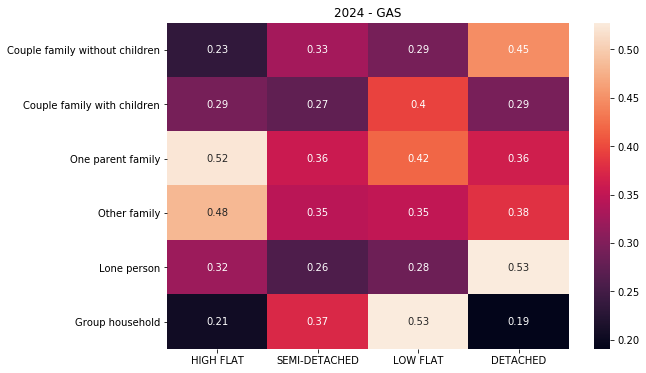

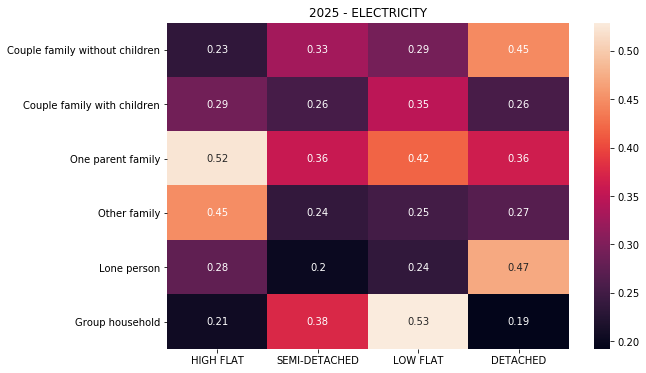

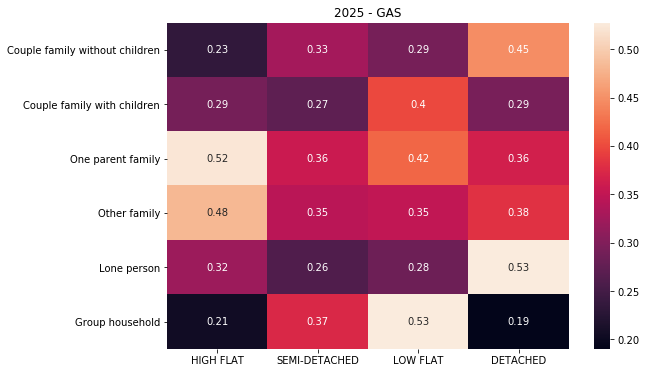

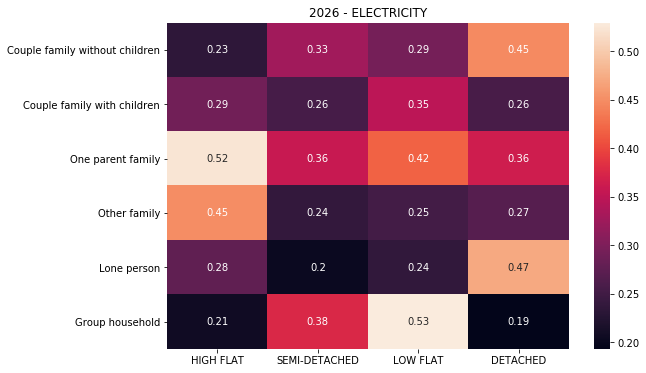

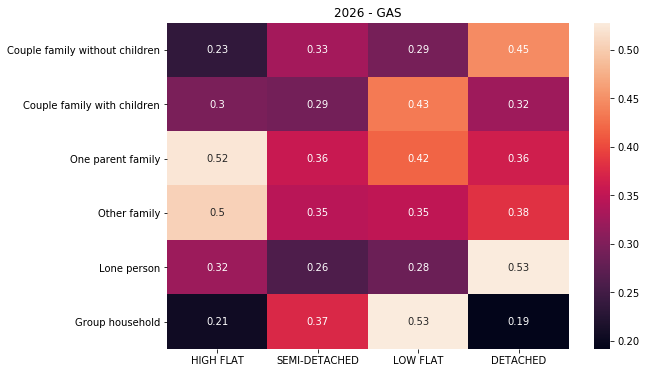

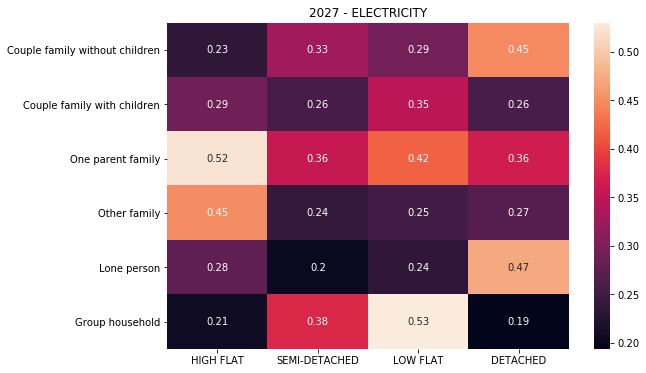

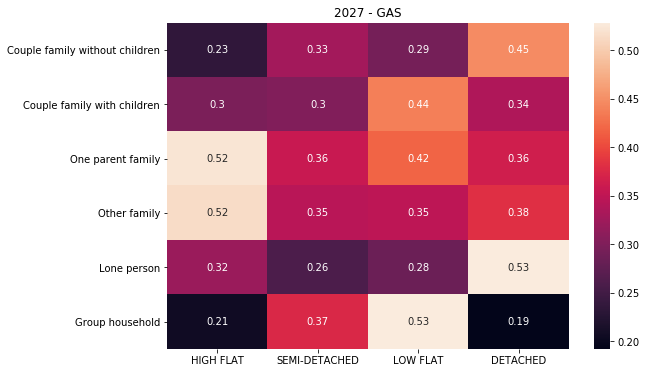

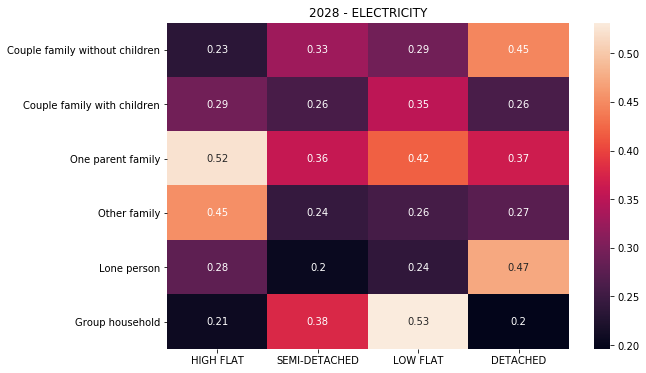

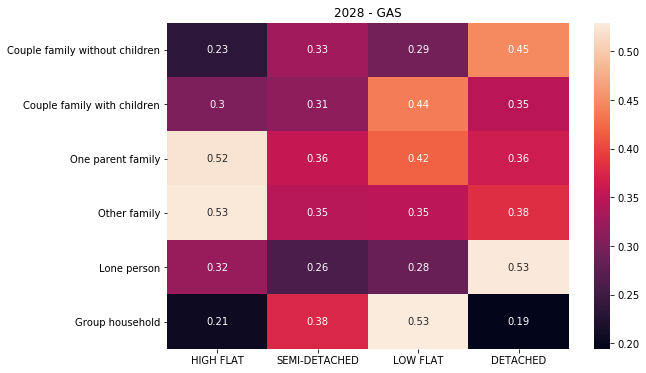

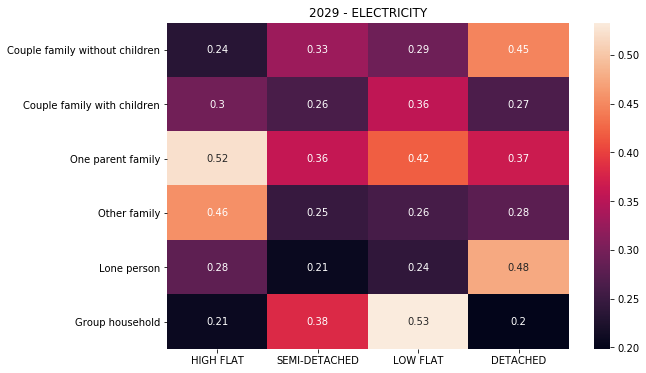

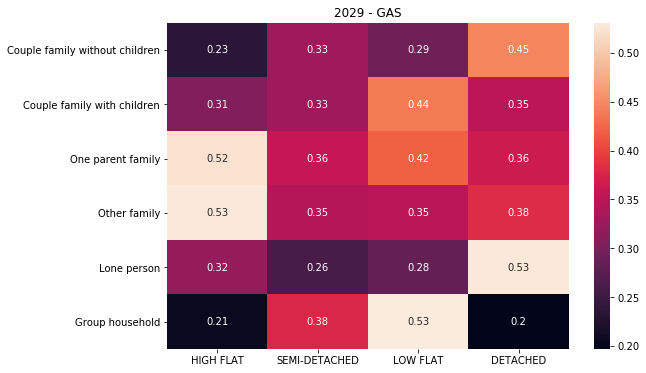

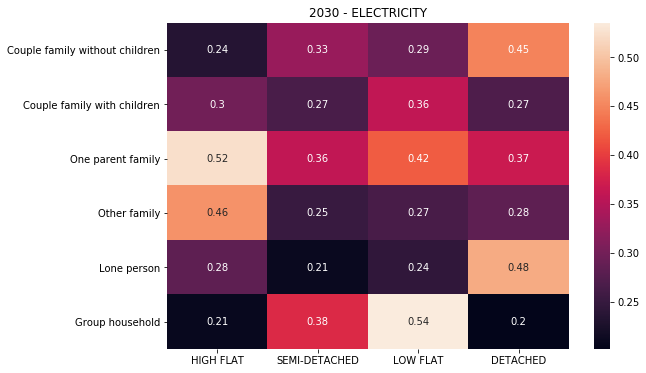

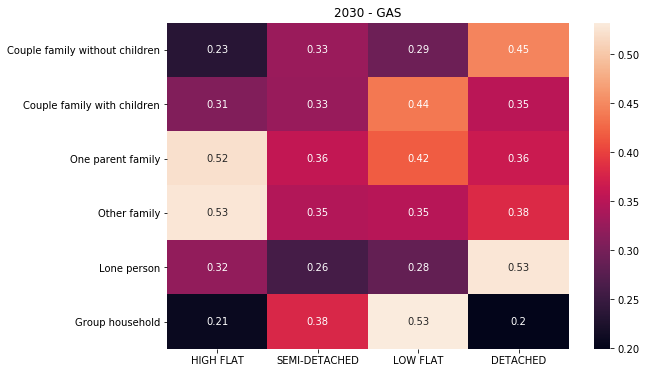

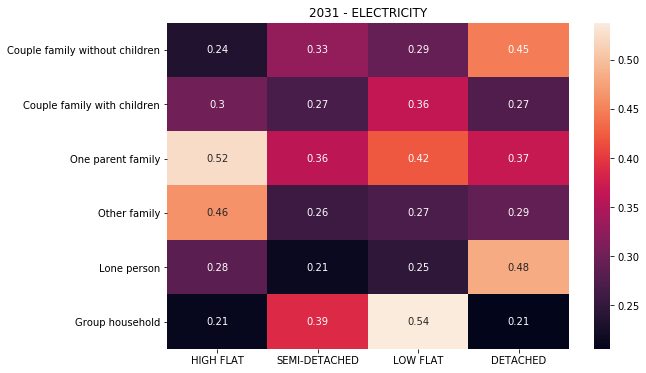

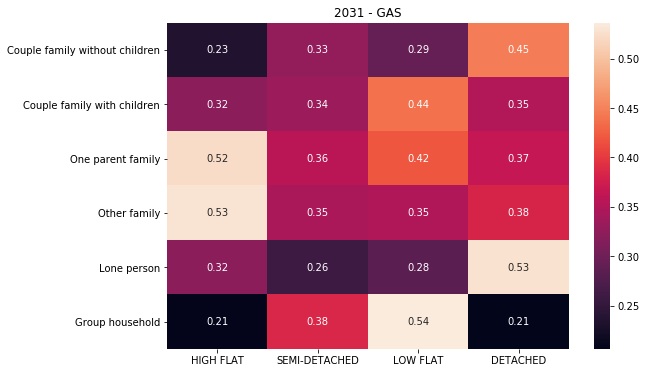

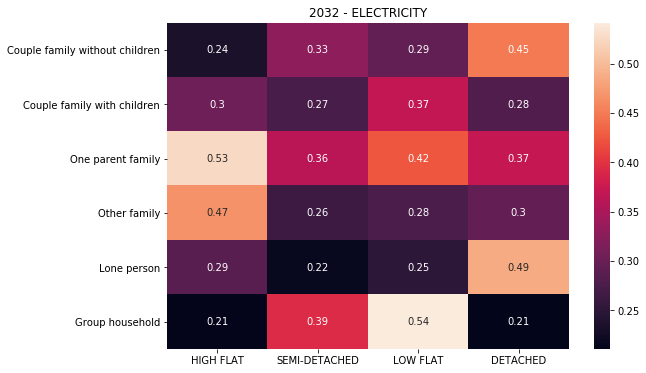

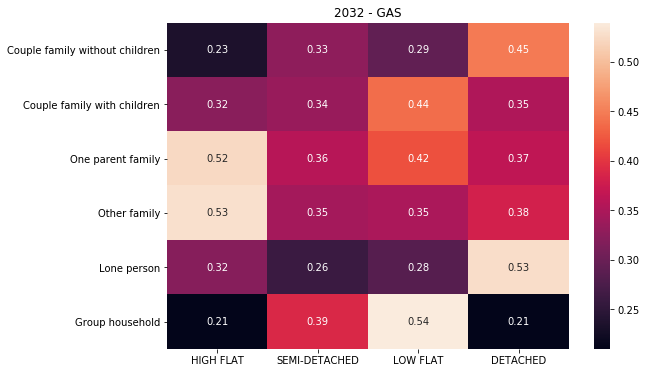

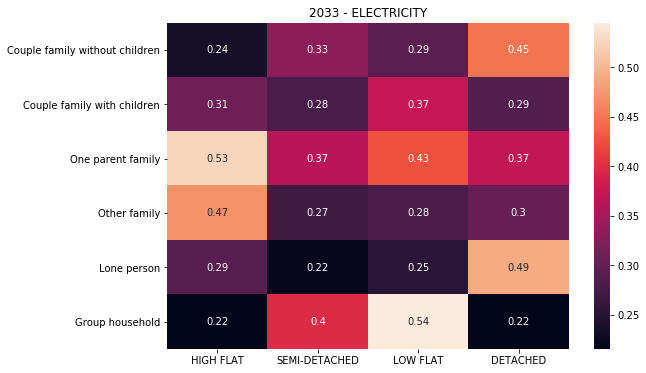

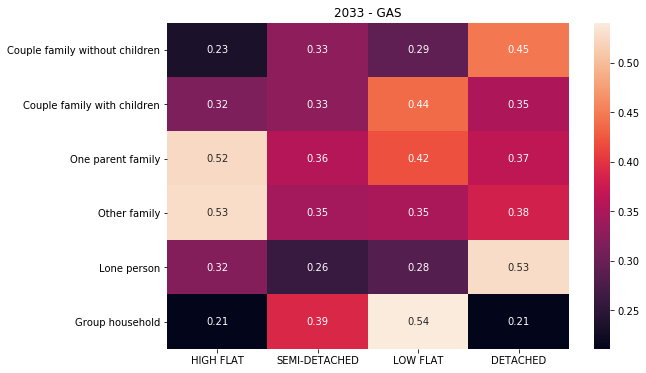

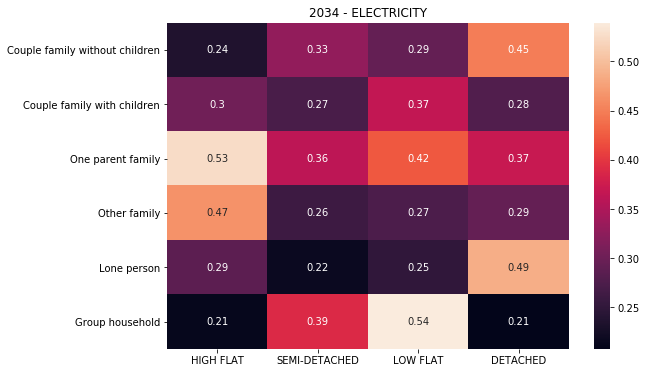

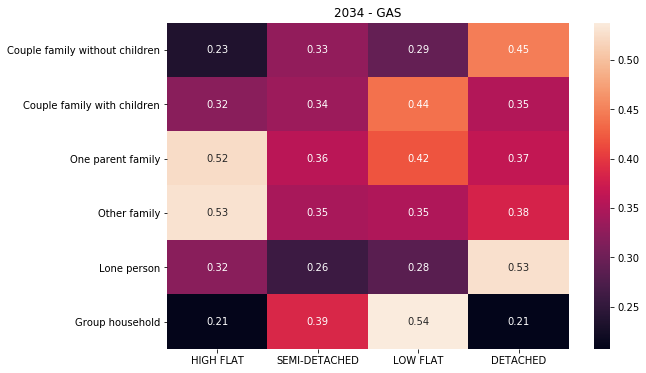

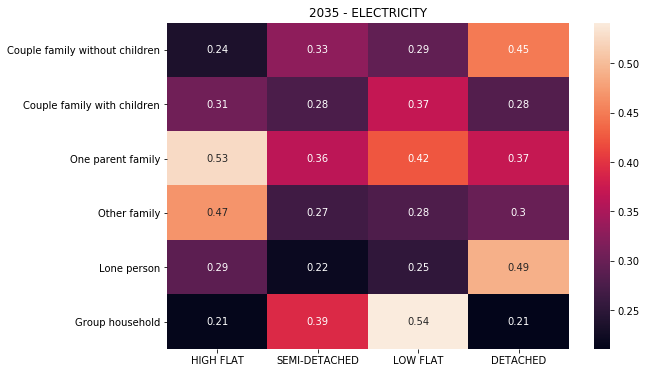

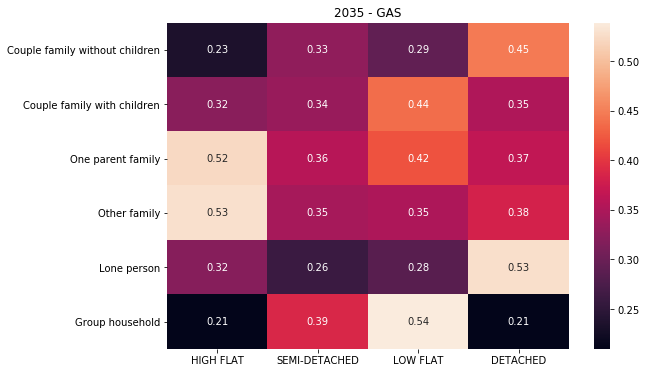

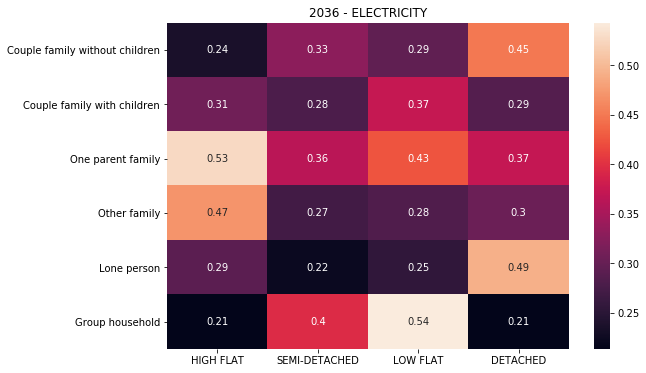

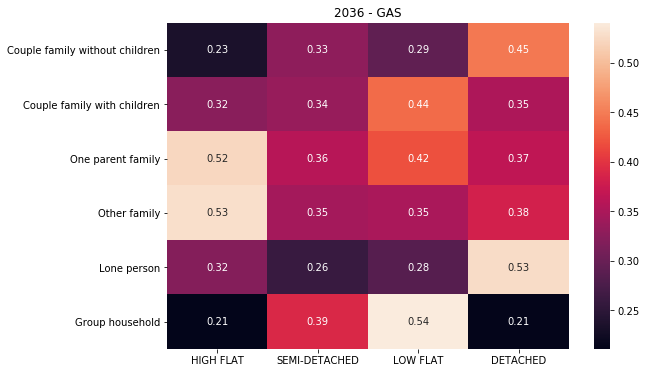

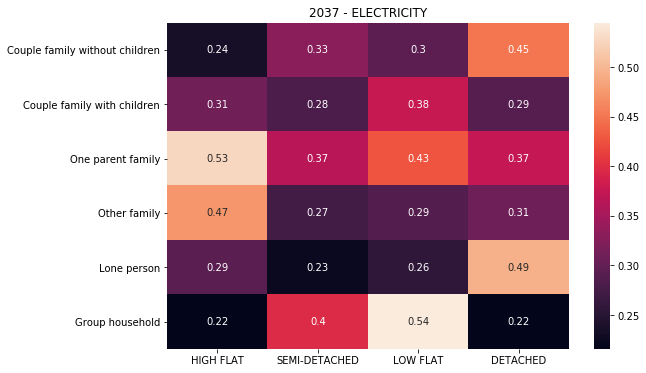

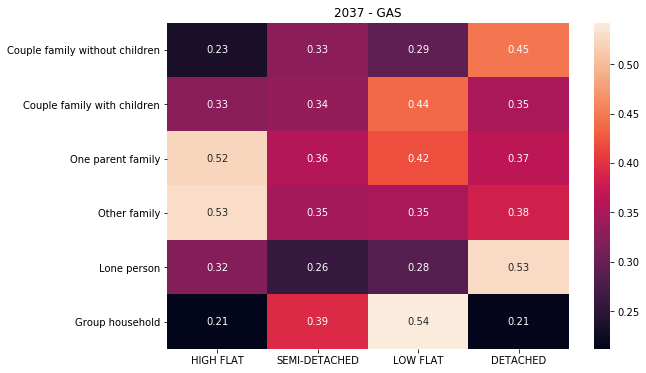

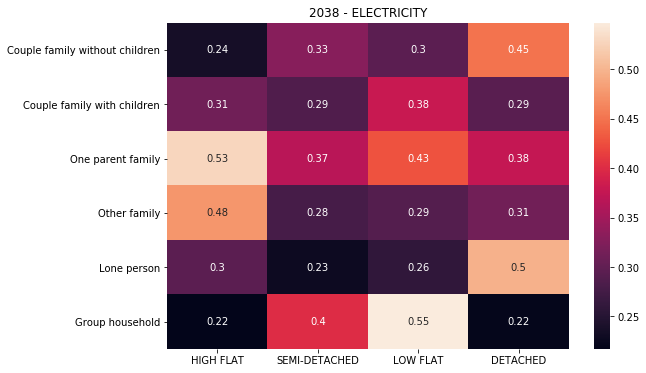

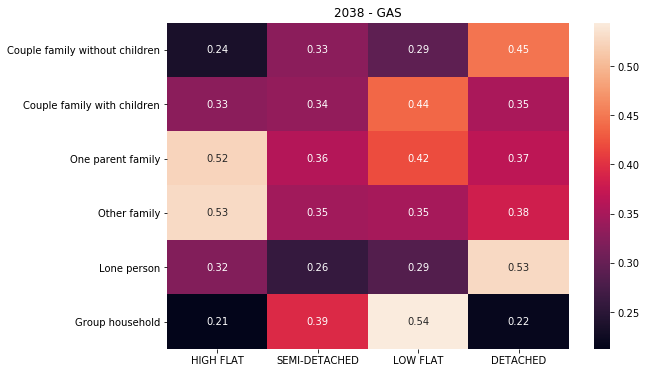

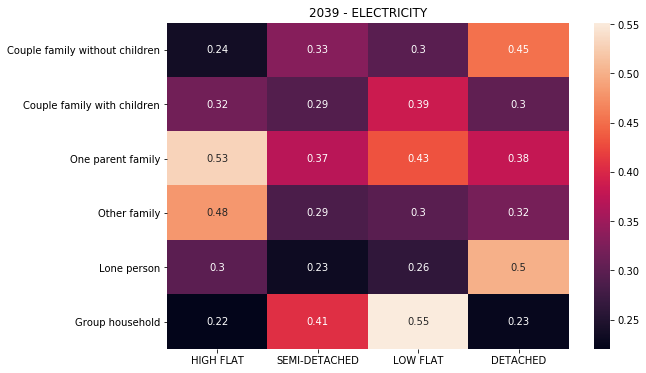

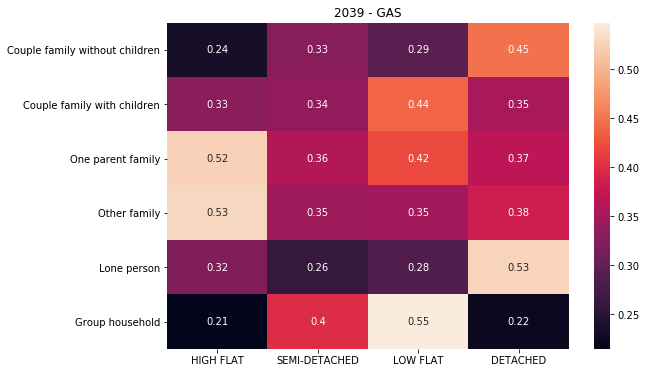

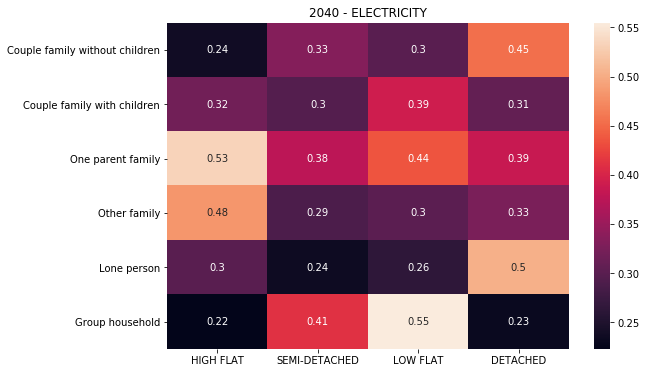

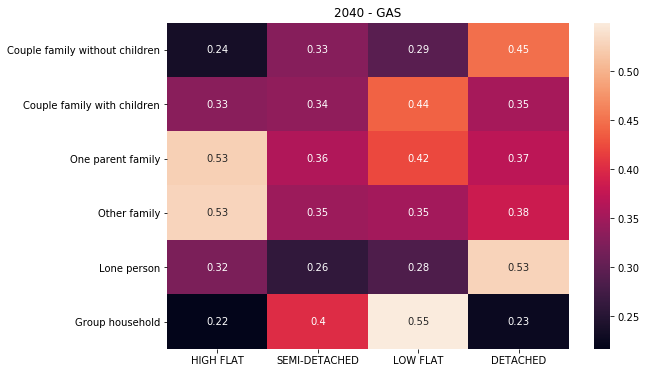

In [37]:
energy_vulnerable_df_mean = {}
for o,d,f in profiles:
    ooi = 'Energy Vulnerable Households ({}-{}-{})'.format(o,d,f)
    energy_vulnerable_df_mean[(o,d,f)] = energy_vulnerable_df[(o,d,f)].mean()
    
for year in simulationYears:
    for f in fuel_mix:
        data = []
        for o in occupancy_types:
            col = []
            for d in dwelling_types:
                col.append(energy_vulnerable_df_mean[(o,d,f)][year])        
            data.append(col)
        plot_heatmap(data, "{} - {}".format(year,f))



In [40]:
#save significant factors (max and median) into EXCEL
name = 'mean'
if onlyOneScenario:
    name = 'oneScenario'
writer = pd.ExcelWriter('{}/EV_{}.xlsx'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\data', name), engine='xlsxwriter')
energy_vulnerable_df_mean_excel = pd.DataFrame.from_dict(energy_vulnerable_df_mean,orient='index')
energy_vulnerable_df_mean_excel.to_excel(writer, sheet_name=f'EV_{name}')
writer.save()

writer = pd.ExcelWriter('{}/EV_all.xlsx'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\data'), engine='xlsxwriter')
energy_vulnerable_df_total.to_excel(writer, sheet_name=f'EV_all')
writer.save()
